In [1]:
# imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# me defined 
from dataload import dataloader
from models import modeling


In [8]:
# check if running on gpu
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
mb = modeling.ModelBuilder()

In [6]:
y_true_sample = tf.constant([1.0, 2.0, 3.0], dtype=tf.float32)  # True labels
z_pred_sample = tf.constant([[0.1, 0.2], [0.2, 0.3], [0.3, 0.4]], dtype=tf.float32)  # Predicted Z values
loss = mb.repr_loss(y_true_sample, z_pred_sample)
print(loss)

tf.Tensor(2.8812, shape=(), dtype=float32)


In [7]:
loss_fast = mb.repr_loss_fast(y_true_sample, z_pred_sample)
print(loss_fast)

tf.Tensor(2.8812, shape=(), dtype=float32)


In [7]:
print(3*9.283866)

27.851598


Synthetic Data

In [3]:
# 4 input values, each Gaussian distributed with 0 mean and 1 stdev
# 1 output value, distance from the origin, AKA L2-norm
# 1000 instances for training, 1000 for testing

In [5]:
# finding alpha
def trial_run(alpha):
    """
    Run a training and validation with the alpha value passed
    
    
    :param alpha: dense weighting factor alpha
    :return: validation loss
    """

    # Generate synthetic data
    n_train = 1000
    n_test = 1000
    loader = dg(n_train, n_test, alpha=alpha)

    mb = mbuilder()
    
    eva = ev()

    # Create and train the model
    hiddens = [64, 32, 8]
    model = mb.create_model_feat(4, 2, hiddens)
    # summarize and plot the model
    # model.summary()
    # plot_feature_space(model, X_train, y_train)
    # Plot the 2D feature space
    # eva.plot_feature_space(model, loader.X_train, loader.y_train)
    # eva.plot_feature_space(model, loader.X_test, loader.y_test)
    # add regression head
    extended_model = mb.add_regression_head(model)
    # train now with the regression stage with balanced loss
    history = mb.train_regression(
        extended_model, 
        loader.X_train, 
        loader.y_train, 
        loader.X_val,
        loader.y_val,
        learning_rate=1e-4,
        epochs=400, batch_size=16)
    # get the val mse
    val_mse = eva.evaluate(extended_model, loader.X_val, loader.y_val)
    # plots the feature space 
    # reset regression head
    base_model = mb.reset_regression_head(extended_model)
    # add new regression head
    extended_model2 = mb.add_regression_head(base_model)
    # freeze the features
    mb.freeze_features(extended_model2)
    # train the new head with balanced loss
    history = mb.train_regression(
        extended_model2, 
        loader.X_train, 
        loader.y_train, 
        loader.X_val,
        loader.y_val,
        loader.reweights, 
        loader.val_reweights,
        learning_rate=1e-4,
        epochs=400, batch_size=16)
    # get the val mse
    val_mse = eva.evaluate(extended_model2, loader.X_val, loader.y_val)

    return val_mse

alpha value 0.0
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 1s 14ms/step - loss: 0.4510 - regression_head_loss: 0.4510 - val_loss: 0.2771 - val_regression_head_loss: 0.2771
Epoch 2/400
47/47 [==============================] - 0s 10ms/step - loss: 0.2191 - regression_head_loss: 0.2191 - val_loss: 0.1660 - val_regression_head_loss: 0.1660
Epoch 3/400
47/47 [==============================] - 0s 9ms/step - loss: 0.1388 - regression_head_loss: 0.1388 - val_loss: 0.1116 - val_regression_head_loss: 0.1116
Epoch 4/400
47/47 [==============================] - 1s 11ms/step - loss: 0.1033 - regression_head_loss: 0.1033 - val_loss: 0.0948 - val_regression_head_loss: 0.0948
Epoch 5/400
47/47 [==============================] - 1s 13ms/step - loss: 0.0883 - regression_head_loss: 0.0883 - val_loss: 0.0860 - val_regression_head_loss: 0.0860
Epoch 6/400
47/47 [==============================] - 0s 10ms/step - loss: 0.0788 - regression_head_los

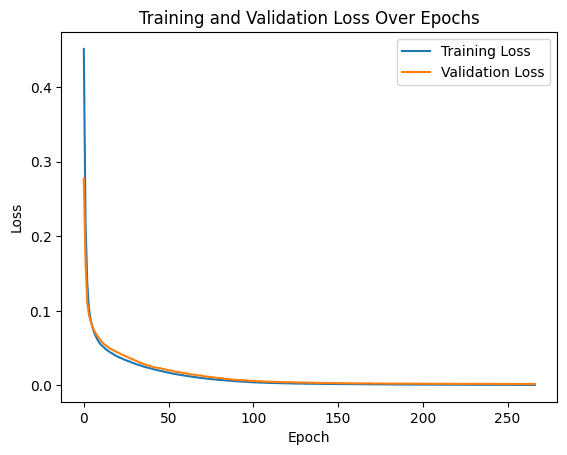

Epoch 1/258
63/63 [==============================] - 0s 6ms/step - loss: 0.0010 - regression_head_loss: 0.0010
Epoch 2/258
63/63 [==============================] - 0s 6ms/step - loss: 0.0010 - regression_head_loss: 0.0010
Epoch 3/258
63/63 [==============================] - 0s 6ms/step - loss: 9.7401e-04 - regression_head_loss: 9.7401e-04
Epoch 4/258
63/63 [==============================] - 0s 7ms/step - loss: 9.9972e-04 - regression_head_loss: 9.9972e-04
Epoch 5/258
63/63 [==============================] - 0s 6ms/step - loss: 9.5499e-04 - regression_head_loss: 9.5499e-04
Epoch 6/258
63/63 [==============================] - 0s 6ms/step - loss: 9.0441e-04 - regression_head_loss: 9.0441e-04
Epoch 7/258
63/63 [==============================] - 0s 6ms/step - loss: 8.5044e-04 - regression_head_loss: 8.5044e-04
Epoch 8/258
63/63 [==============================] - 0s 6ms/step - loss: 8.6584e-04 - regression_head_loss: 8.6584e-04
Epoch 9/258
63/63 [==============================] - 0s 6ms/step

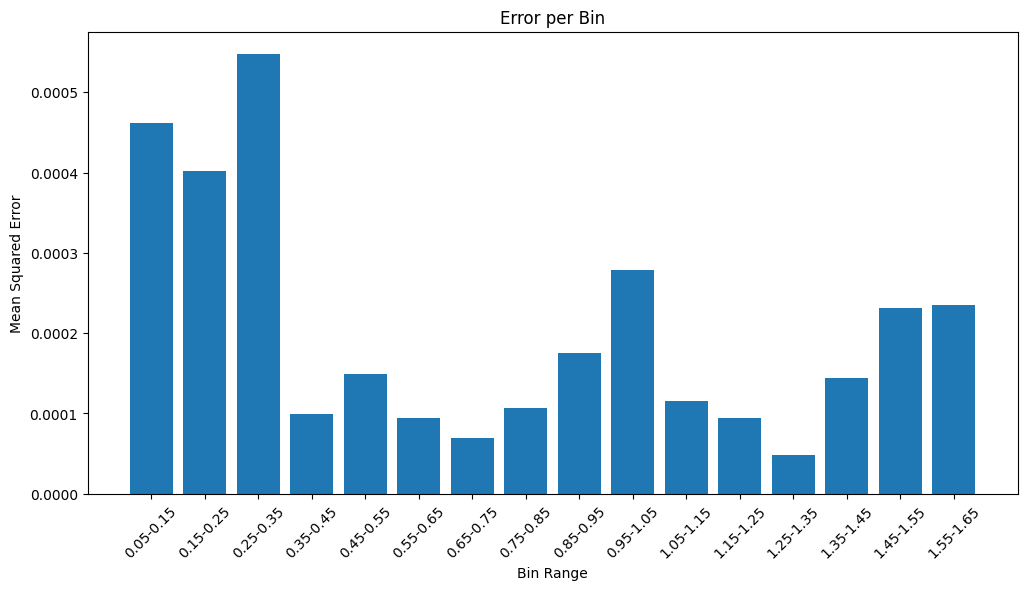

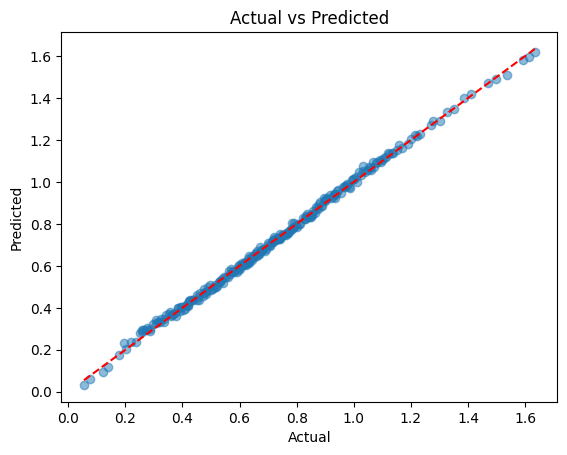

Sample with y = 0.26175955719214267 belongs to bin 3 and has an error of 0.033275179202739535
Sample with y = 0.30773926799432083 belongs to bin 3 and has an error of 0.03585090215071396
Sample with y = 0.19636694326360757 belongs to bin 2 and has an error of 0.03712629542390769
Sample with y = 0.25741983164071636 belongs to bin 3 and has an error of 0.03919111978292866
Sample with y = 1.0330780631814926 belongs to bin 10 and has an error of 0.04342425996914212
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 2s 17ms/step - loss: 0.2216 - regression_head_loss: 0.2216 - val_loss: 0.2173 - val_regression_head_loss: 0.2173
Epoch 2/400
47/47 [==============================] - 0s 8ms/step - loss: 0.2196 - regression_head_loss: 0.2196 - val_loss: 0.2152 - val_regression_head_loss: 0.2152
Epoch 3/400
47/47 [==============================] - 0s 8ms/step - loss: 0.2175 - regression_head_loss: 0.2175 - val_loss: 0.2133 - val_regression_hea

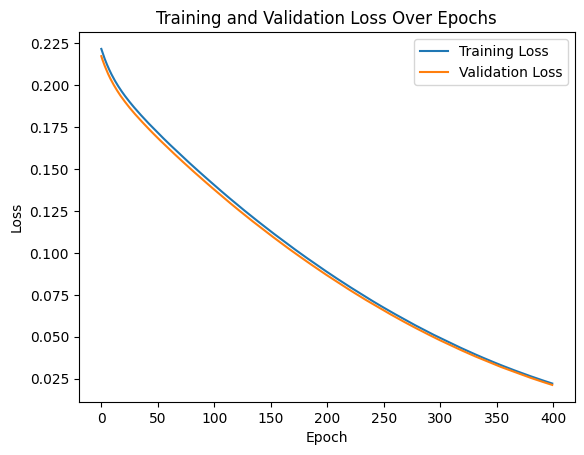

Epoch 1/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0217 - regression_head_loss: 0.0217
Epoch 2/400
63/63 [==============================] - 0s 4ms/step - loss: 0.0214 - regression_head_loss: 0.0214
Epoch 3/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0211 - regression_head_loss: 0.0211
Epoch 4/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0209 - regression_head_loss: 0.0209
Epoch 5/400
63/63 [==============================] - 0s 4ms/step - loss: 0.0206 - regression_head_loss: 0.0206
Epoch 6/400
63/63 [==============================] - 0s 4ms/step - loss: 0.0203 - regression_head_loss: 0.0203
Epoch 7/400
63/63 [==============================] - 0s 4ms/step - loss: 0.0200 - regression_head_loss: 0.0200
Epoch 8/400
63/63 [==============================] - 0s 4ms/step - loss: 0.0197 - regression_head_loss: 0.0197
Epoch 9/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0195 - regression_head_loss: 0.0195
E

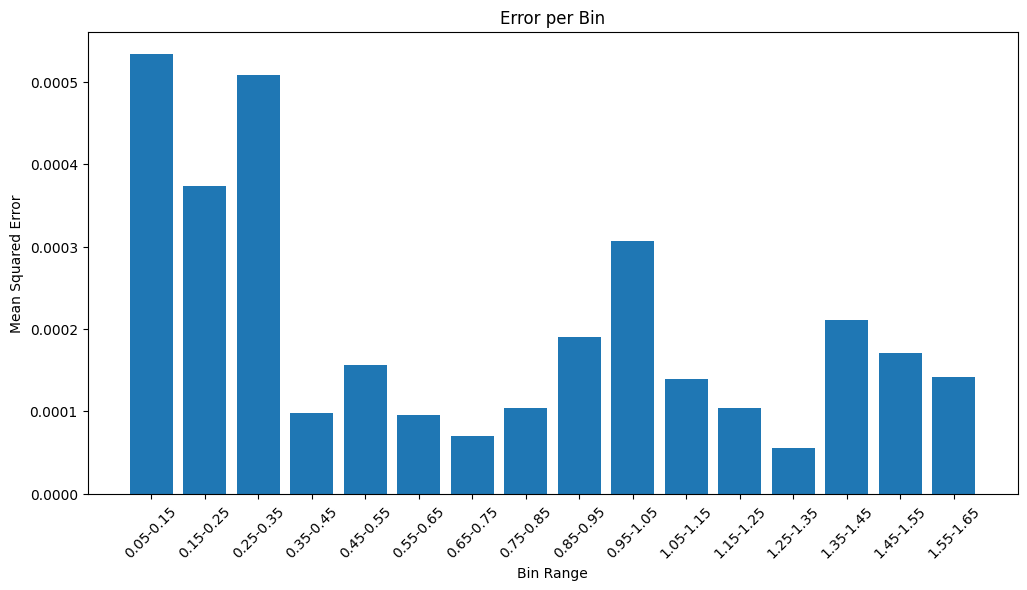

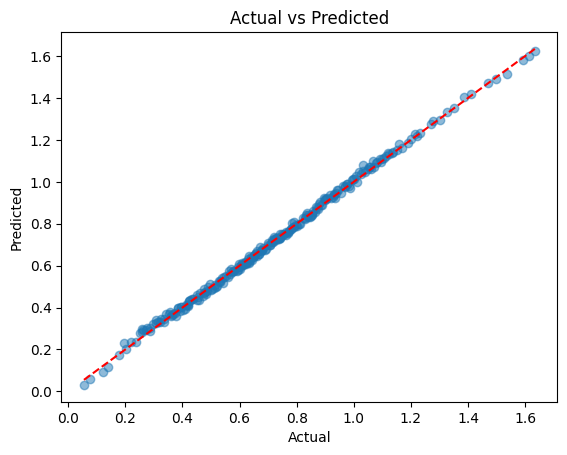

Sample with y = 0.26175955719214267 belongs to bin 3 and has an error of 0.032238624627773105
Sample with y = 0.30773926799432083 belongs to bin 3 and has an error of 0.034951348851763764
Sample with y = 0.19636694326360757 belongs to bin 2 and has an error of 0.03591828808824485
Sample with y = 0.25741983164071636 belongs to bin 3 and has an error of 0.03815897595167561
Sample with y = 1.0330780631814926 belongs to bin 10 and has an error of 0.04480386907711331
alpha value 0.1
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 1s 10ms/step - loss: 0.7789 - regression_head_loss: 0.7789 - val_loss: 0.6547 - val_regression_head_loss: 0.6547
Epoch 2/400
47/47 [==============================] - 0s 7ms/step - loss: 0.4458 - regression_head_loss: 0.4458 - val_loss: 0.3708 - val_regression_head_loss: 0.3708
Epoch 3/400
47/47 [==============================] - 0s 7ms/step - loss: 0.2412 - regression_head_loss: 0.2412 - val_loss: 0.1924 - v

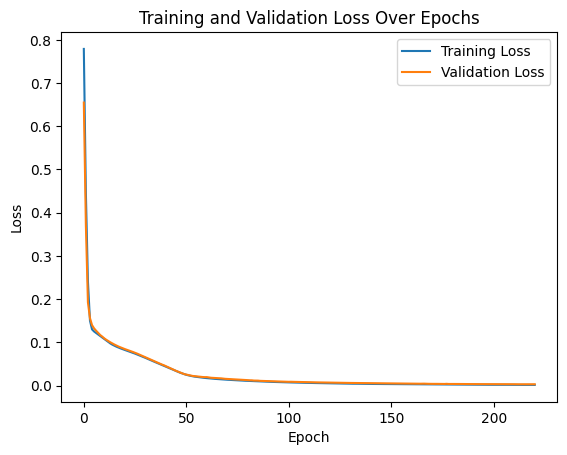

Epoch 1/212
63/63 [==============================] - 1s 15ms/step - loss: 0.0019 - regression_head_loss: 0.0019
Epoch 2/212
63/63 [==============================] - 1s 18ms/step - loss: 0.0019 - regression_head_loss: 0.0019
Epoch 3/212
63/63 [==============================] - 3s 53ms/step - loss: 0.0018 - regression_head_loss: 0.0018
Epoch 4/212
63/63 [==============================] - 5s 74ms/step - loss: 0.0017 - regression_head_loss: 0.0017
Epoch 5/212
63/63 [==============================] - 4s 68ms/step - loss: 0.0017 - regression_head_loss: 0.0017
Epoch 6/212
63/63 [==============================] - 7s 108ms/step - loss: 0.0016 - regression_head_loss: 0.0016
Epoch 7/212
63/63 [==============================] - 4s 59ms/step - loss: 0.0017 - regression_head_loss: 0.0017
Epoch 8/212
63/63 [==============================] - 5s 75ms/step - loss: 0.0016 - regression_head_loss: 0.0016
Epoch 9/212
63/63 [==============================] - 5s 81ms/step - loss: 0.0016 - regression_head_loss

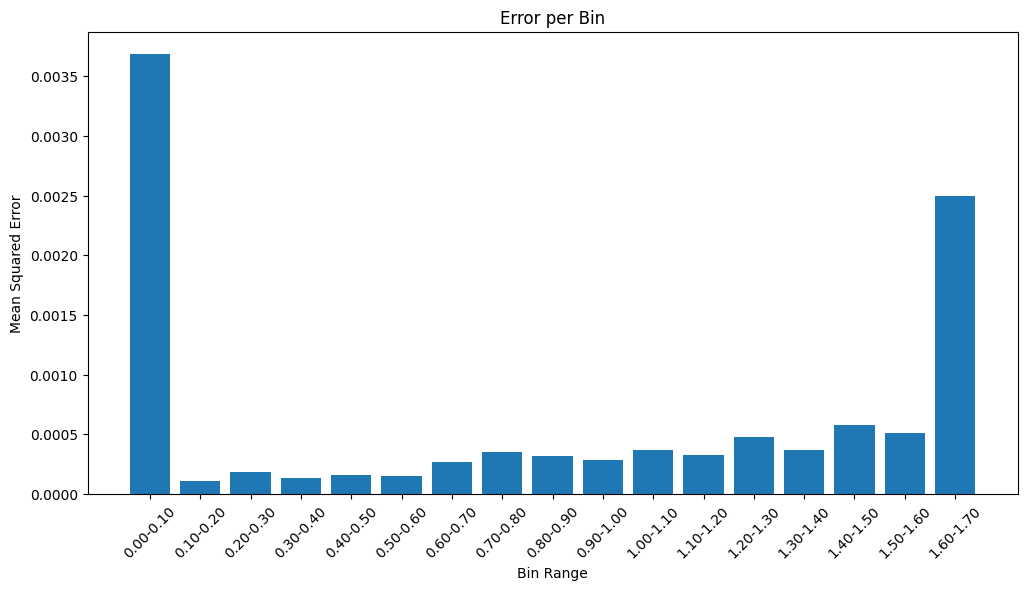

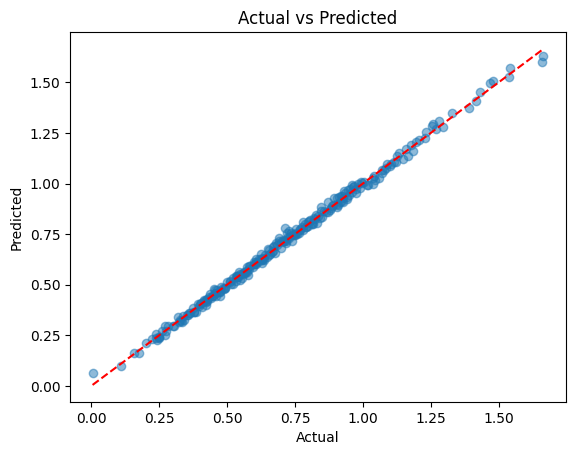

Sample with y = 1.037275025594257 belongs to bin 11 and has an error of 0.03845782016517996
Sample with y = 0.6892993302909953 belongs to bin 7 and has an error of 0.041215434494771275
Sample with y = 0.004298363723027306 belongs to bin 1 and has an error of 0.060740943156016275
Sample with y = 1.661143223728216 belongs to bin 17 and has an error of 0.062106649364507494
Sample with y = 0.7121724236999318 belongs to bin 8 and has an error of 0.06816717495576885
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 2s 15ms/step - loss: 4.0977 - regression_head_loss: 4.0977 - val_loss: 4.0789 - val_regression_head_loss: 4.0789
Epoch 2/400
47/47 [==============================] - 1s 20ms/step - loss: 4.0562 - regression_head_loss: 4.0562 - val_loss: 4.0375 - val_regression_head_loss: 4.0375
Epoch 3/400
47/47 [==============================] - 0s 10ms/step - loss: 4.0151 - regression_head_loss: 4.0151 - val_loss: 3.9966 - val_regression_he

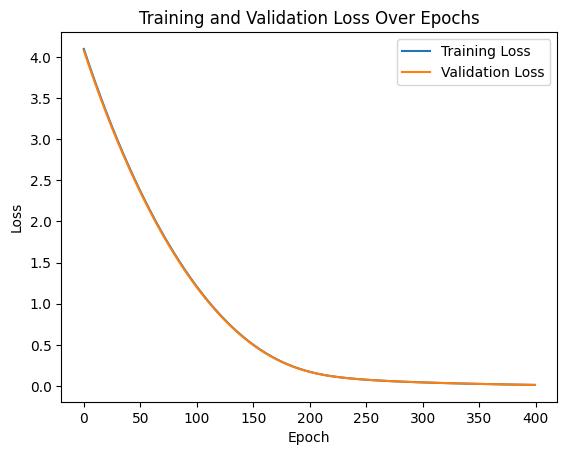

Epoch 1/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0130 - regression_head_loss: 0.0130
Epoch 2/400
63/63 [==============================] - 0s 6ms/step - loss: 0.0127 - regression_head_loss: 0.0127
Epoch 3/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0124 - regression_head_loss: 0.0124
Epoch 4/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0122 - regression_head_loss: 0.0122
Epoch 5/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0119 - regression_head_loss: 0.0119
Epoch 6/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0117 - regression_head_loss: 0.0117
Epoch 7/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0115 - regression_head_loss: 0.0115
Epoch 8/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0112 - regression_head_loss: 0.0112
Epoch 9/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0110 - regression_head_loss: 0.0110
E

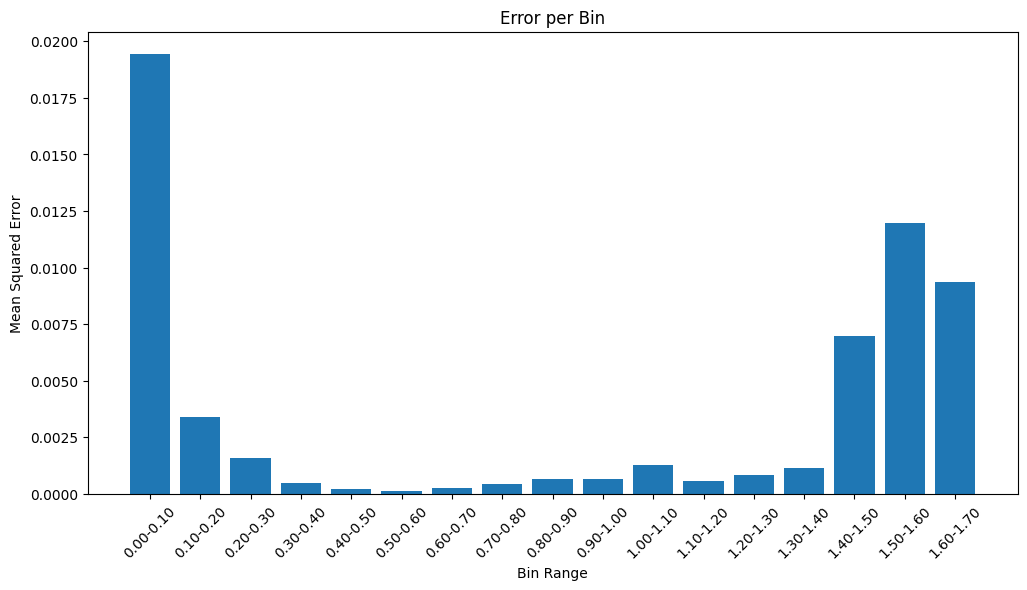

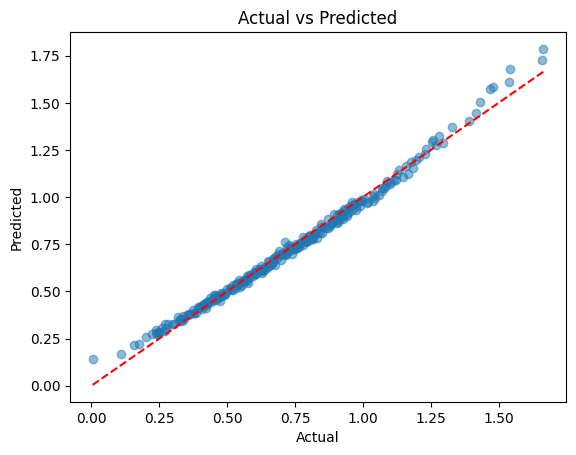

Sample with y = 1.4669734473345148 belongs to bin 15 and has an error of 0.10415825890327812
Sample with y = 1.4793094593405691 belongs to bin 15 and has an error of 0.10450492321253146
Sample with y = 1.6653373478695828 belongs to bin 17 and has an error of 0.12036845695524634
Sample with y = 1.5421580769335128 belongs to bin 16 and has an error of 0.13756733162056434
Sample with y = 0.004298363723027306 belongs to bin 1 and has an error of 0.13946422477794926
alpha value 0.2
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 2s 23ms/step - loss: 1.5310 - regression_head_loss: 1.5310 - val_loss: 1.3755 - val_regression_head_loss: 1.3755
Epoch 2/400
47/47 [==============================] - 0s 10ms/step - loss: 1.0970 - regression_head_loss: 1.0970 - val_loss: 0.8639 - val_regression_head_loss: 0.8639
Epoch 3/400
47/47 [==============================] - 0s 11ms/step - loss: 0.6476 - regression_head_loss: 0.6476 - val_loss: 0.4121 - 

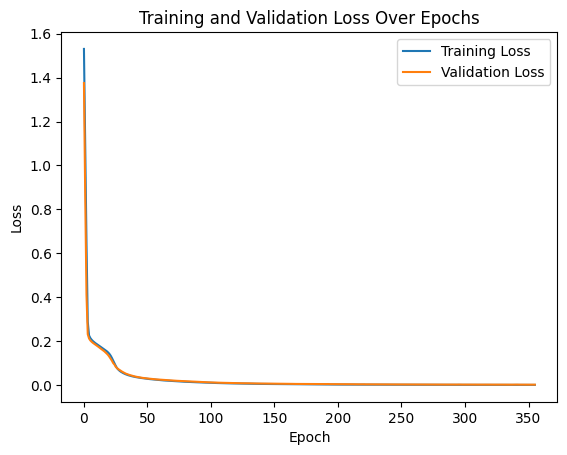

Epoch 1/347
63/63 [==============================] - 0s 6ms/step - loss: 9.1770e-04 - regression_head_loss: 9.1770e-04
Epoch 2/347
63/63 [==============================] - 0s 6ms/step - loss: 8.7656e-04 - regression_head_loss: 8.7656e-04
Epoch 3/347
63/63 [==============================] - 0s 7ms/step - loss: 8.0584e-04 - regression_head_loss: 8.0584e-04
Epoch 4/347
63/63 [==============================] - 0s 6ms/step - loss: 7.8998e-04 - regression_head_loss: 7.8998e-04
Epoch 5/347
63/63 [==============================] - 0s 6ms/step - loss: 8.6388e-04 - regression_head_loss: 8.6388e-04
Epoch 6/347
63/63 [==============================] - 0s 6ms/step - loss: 7.3535e-04 - regression_head_loss: 7.3535e-04
Epoch 7/347
63/63 [==============================] - 0s 6ms/step - loss: 7.4192e-04 - regression_head_loss: 7.4192e-04
Epoch 8/347
63/63 [==============================] - 0s 6ms/step - loss: 7.2497e-04 - regression_head_loss: 7.2497e-04
Epoch 9/347
63/63 [=============================

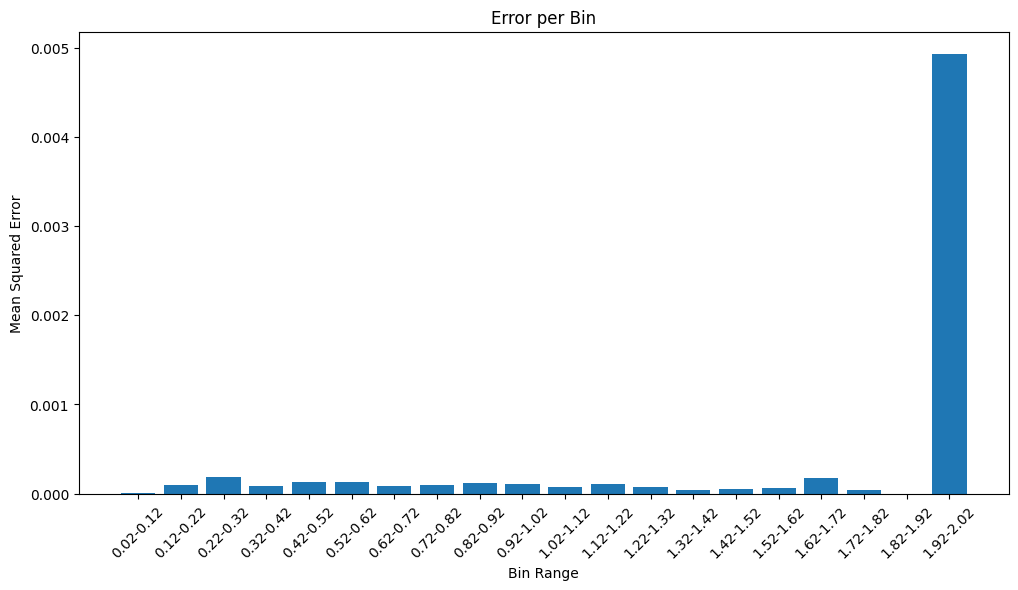

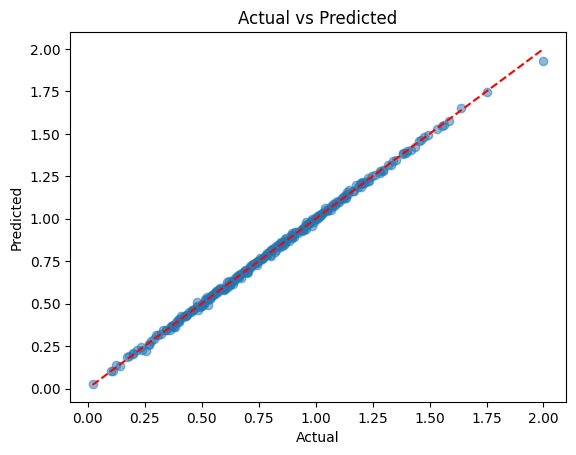

Sample with y = 0.9856889852362638 belongs to bin 10 and has an error of 0.028993905432797007
Sample with y = 0.25400043233634106 belongs to bin 3 and has an error of 0.03128091200591199
Sample with y = 0.5258804401847527 belongs to bin 6 and has an error of 0.03270073146549912
Sample with y = 0.47886210231037213 belongs to bin 5 and has an error of 0.033232395370291934
Sample with y = 2.0 belongs to bin 20 and has an error of 0.0702277421951294
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 1s 14ms/step - loss: 1.4872 - regression_head_loss: 1.4872 - val_loss: 1.4761 - val_regression_head_loss: 1.4761
Epoch 2/400
47/47 [==============================] - 0s 7ms/step - loss: 1.4624 - regression_head_loss: 1.4624 - val_loss: 1.4514 - val_regression_head_loss: 1.4514
Epoch 3/400
47/47 [==============================] - 0s 7ms/step - loss: 1.4380 - regression_head_loss: 1.4380 - val_loss: 1.4272 - val_regression_head_loss: 1.4272
E

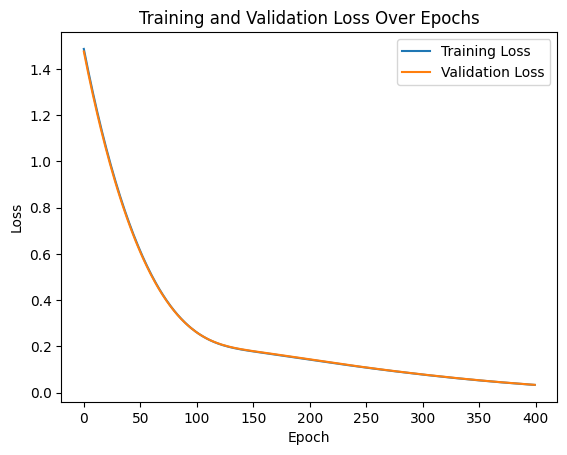

Epoch 1/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0327 - regression_head_loss: 0.0327
Epoch 2/400
63/63 [==============================] - 0s 6ms/step - loss: 0.0322 - regression_head_loss: 0.0322
Epoch 3/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0318 - regression_head_loss: 0.0318
Epoch 4/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0313 - regression_head_loss: 0.0313
Epoch 5/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0308 - regression_head_loss: 0.0308
Epoch 6/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0304 - regression_head_loss: 0.0304
Epoch 7/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0300 - regression_head_loss: 0.0300
Epoch 8/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0295 - regression_head_loss: 0.0295
Epoch 9/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0291 - regression_head_loss: 0.0291
E

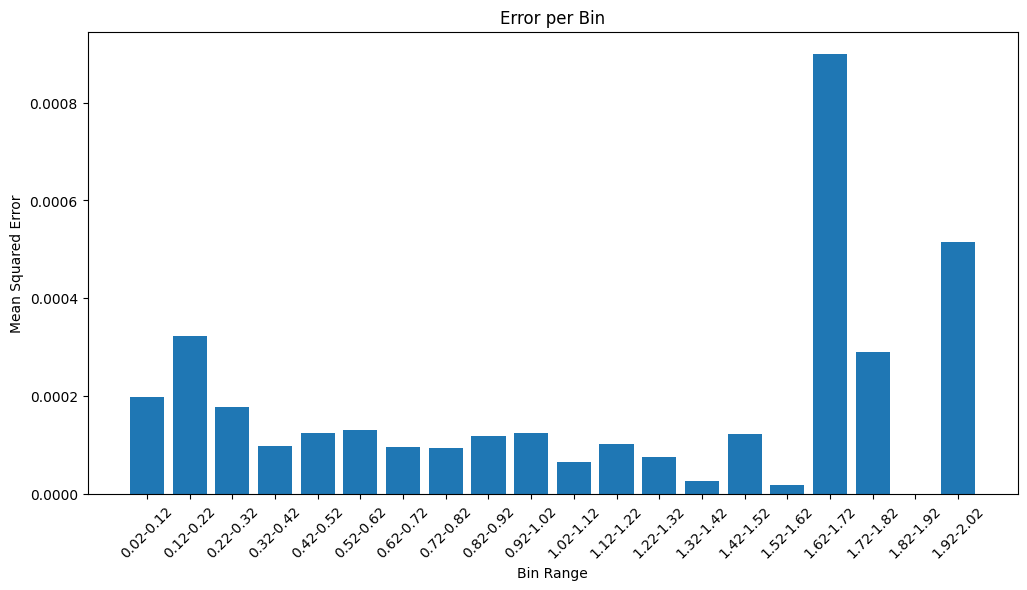

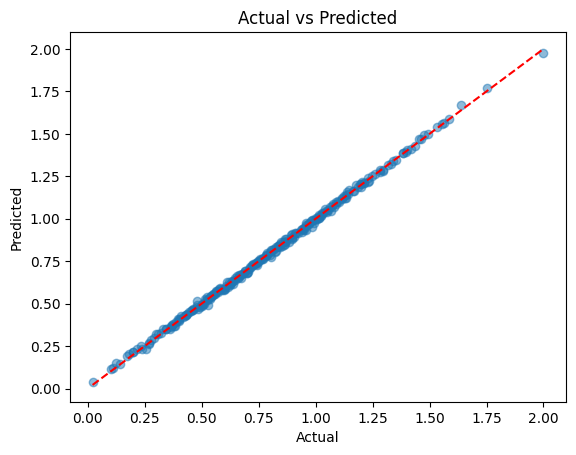

Sample with y = 0.8055322745101916 belongs to bin 8 and has an error of 0.028585074211882278
Sample with y = 1.6385398479248792 belongs to bin 17 and has an error of 0.03000527899009886
Sample with y = 0.5258804401847527 belongs to bin 6 and has an error of 0.03160475105969163
Sample with y = 0.9856889852362638 belongs to bin 10 and has an error of 0.03224617327032142
Sample with y = 0.47886210231037213 belongs to bin 5 and has an error of 0.033944611270713076
alpha value 0.30000000000000004
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 2s 16ms/step - loss: 0.8443 - regression_head_loss: 0.8443 - val_loss: 0.7637 - val_regression_head_loss: 0.7637
Epoch 2/400
47/47 [==============================] - 0s 10ms/step - loss: 0.6276 - regression_head_loss: 0.6276 - val_loss: 0.6054 - val_regression_head_loss: 0.6054
Epoch 3/400
47/47 [==============================] - 0s 9ms/step - loss: 0.5217 - regression_head_loss: 0.5217 - val_l

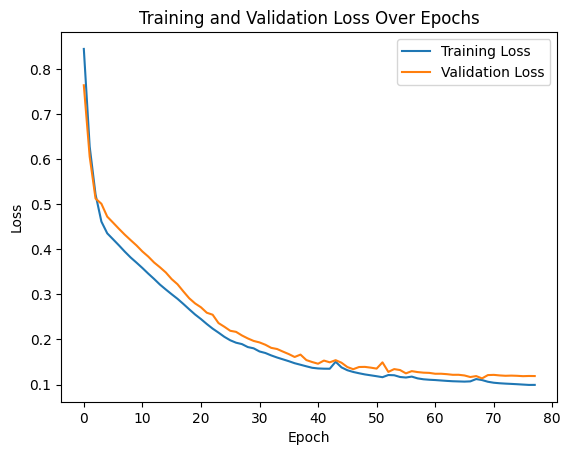

Epoch 1/69
63/63 [==============================] - 0s 7ms/step - loss: 0.1079 - regression_head_loss: 0.1079
Epoch 2/69
63/63 [==============================] - 0s 7ms/step - loss: 0.1071 - regression_head_loss: 0.1071
Epoch 3/69
63/63 [==============================] - 0s 7ms/step - loss: 0.1068 - regression_head_loss: 0.1068
Epoch 4/69
63/63 [==============================] - 0s 7ms/step - loss: 0.1051 - regression_head_loss: 0.1051
Epoch 5/69
63/63 [==============================] - 1s 8ms/step - loss: 0.1056 - regression_head_loss: 0.1056
Epoch 6/69
63/63 [==============================] - 0s 6ms/step - loss: 0.1026 - regression_head_loss: 0.1026
Epoch 7/69
63/63 [==============================] - 0s 8ms/step - loss: 0.1022 - regression_head_loss: 0.1022
Epoch 8/69
63/63 [==============================] - 0s 7ms/step - loss: 0.1004 - regression_head_loss: 0.1004
Epoch 9/69
63/63 [==============================] - 0s 7ms/step - loss: 0.0990 - regression_head_loss: 0.0990
Epoch 10/6

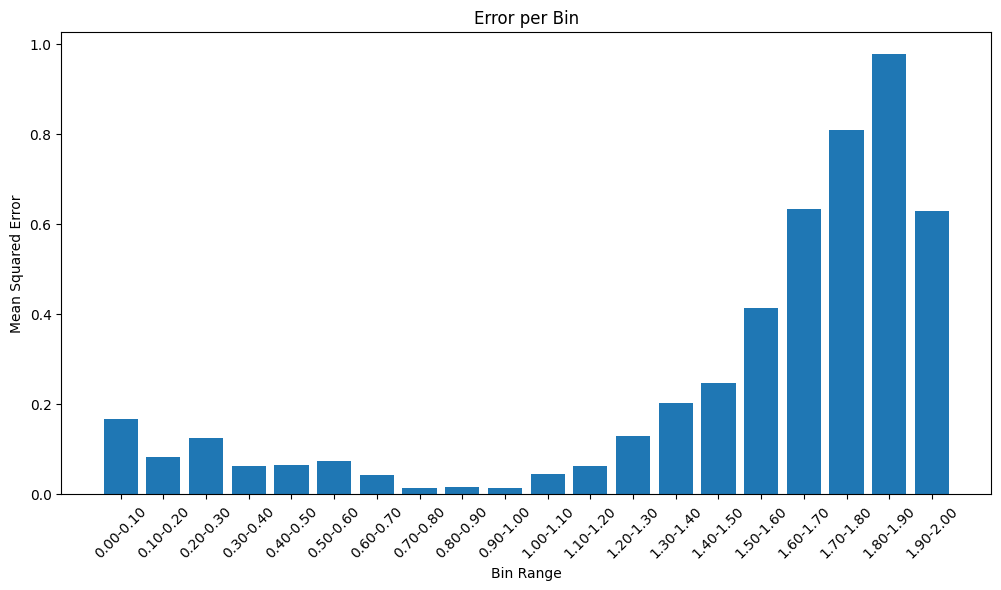

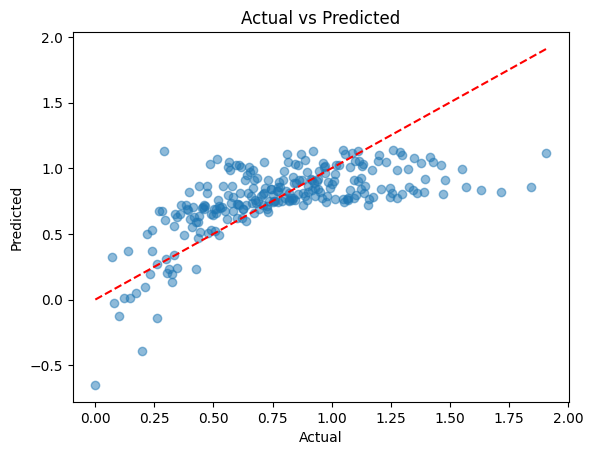

Sample with y = 1.9083253903757822 belongs to bin 20 and has an error of 0.7934640212427866
Sample with y = 1.6301412370981978 belongs to bin 17 and has an error of 0.7958144334139632
Sample with y = 0.2889580710986258 belongs to bin 3 and has an error of 0.8412026182553171
Sample with y = 1.7169019888973738 belongs to bin 18 and has an error of 0.8996440481281782
Sample with y = 1.844843429615537 belongs to bin 19 and has an error of 0.9893309298062718
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 1s 13ms/step - loss: 0.5624 - regression_head_loss: 0.5624 - val_loss: 0.5617 - val_regression_head_loss: 0.5617
Epoch 2/400
47/47 [==============================] - 0s 8ms/step - loss: 0.5512 - regression_head_loss: 0.5512 - val_loss: 0.5507 - val_regression_head_loss: 0.5507
Epoch 3/400
47/47 [==============================] - 0s 7ms/step - loss: 0.5404 - regression_head_loss: 0.5404 - val_loss: 0.5400 - val_regression_head_loss: 

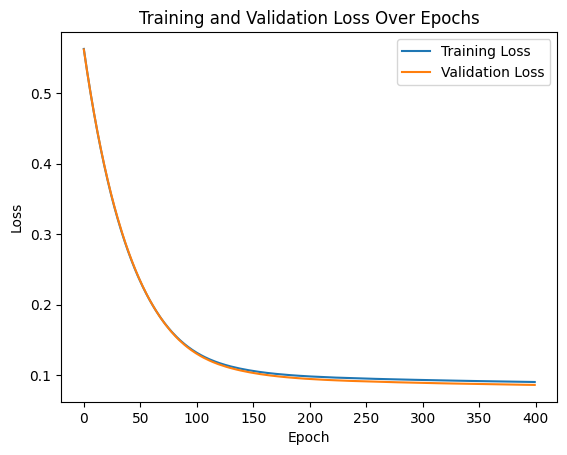

Epoch 1/400
63/63 [==============================] - 0s 6ms/step - loss: 0.0895 - regression_head_loss: 0.0895
Epoch 2/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0895 - regression_head_loss: 0.0895
Epoch 3/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0895 - regression_head_loss: 0.0895
Epoch 4/400
63/63 [==============================] - 0s 6ms/step - loss: 0.0894 - regression_head_loss: 0.0894
Epoch 5/400
63/63 [==============================] - 0s 6ms/step - loss: 0.0894 - regression_head_loss: 0.0894
Epoch 6/400
63/63 [==============================] - 0s 6ms/step - loss: 0.0894 - regression_head_loss: 0.0894
Epoch 7/400
63/63 [==============================] - 0s 6ms/step - loss: 0.0893 - regression_head_loss: 0.0893
Epoch 8/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0893 - regression_head_loss: 0.0893
Epoch 9/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0893 - regression_head_loss: 0.0893
E

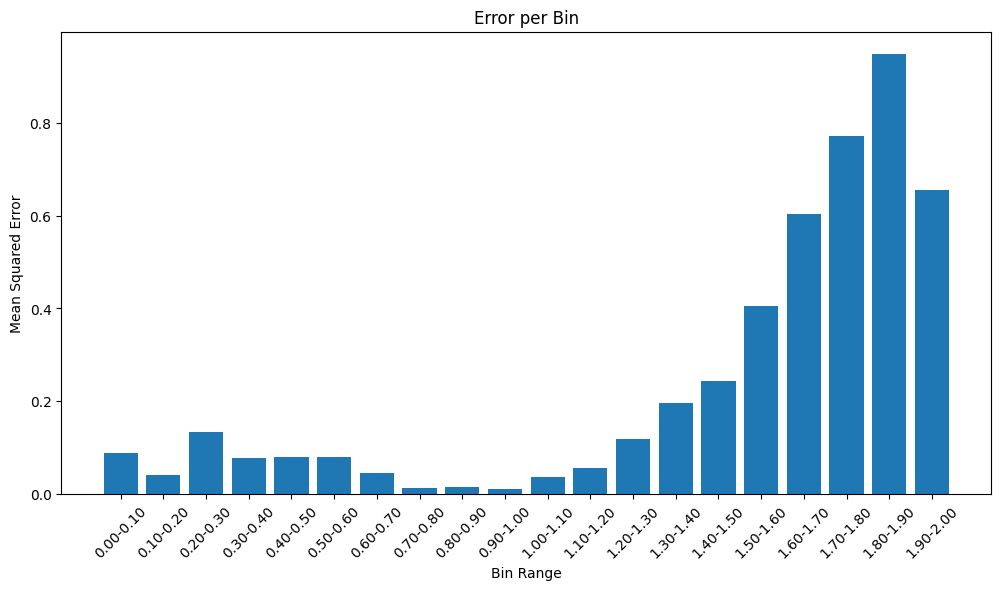

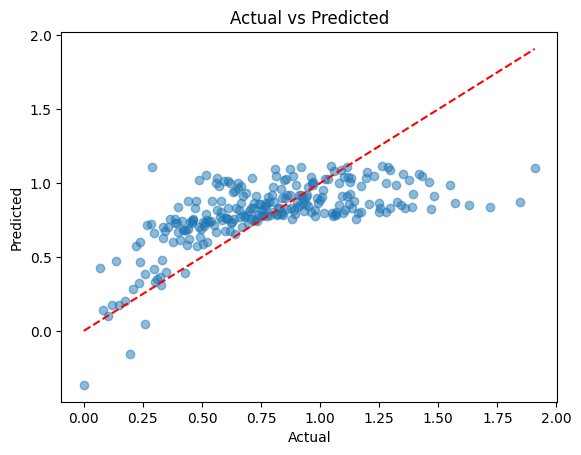

Sample with y = 1.6301412370981978 belongs to bin 17 and has an error of 0.7777873066248702
Sample with y = 1.9083253903757822 belongs to bin 20 and has an error of 0.8093400760065805
Sample with y = 0.2889580710986258 belongs to bin 3 and has an error of 0.8209636227032541
Sample with y = 1.7169019888973738 belongs to bin 18 and has an error of 0.8788177680111433
Sample with y = 1.844843429615537 belongs to bin 19 and has an error of 0.9747590842748082
alpha value 0.4
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 1s 12ms/step - loss: 0.2261 - regression_head_loss: 0.2261 - val_loss: 0.1751 - val_regression_head_loss: 0.1751
Epoch 2/400
47/47 [==============================] - 0s 8ms/step - loss: 0.1543 - regression_head_loss: 0.1543 - val_loss: 0.1455 - val_regression_head_loss: 0.1455
Epoch 3/400
47/47 [==============================] - 0s 8ms/step - loss: 0.1410 - regression_head_loss: 0.1410 - val_loss: 0.1423 - val_regres

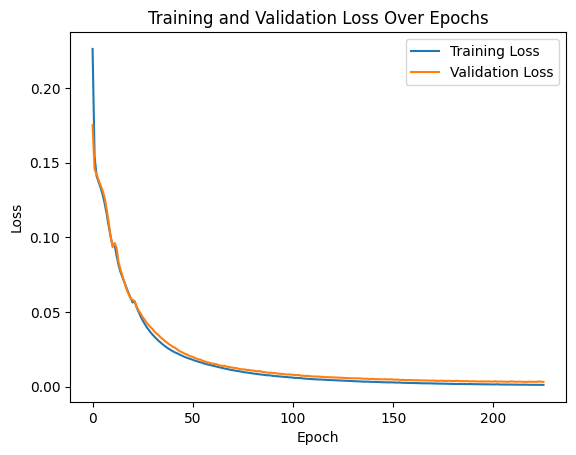

Epoch 1/217
63/63 [==============================] - 0s 6ms/step - loss: 0.0019 - regression_head_loss: 0.0019
Epoch 2/217
63/63 [==============================] - 0s 6ms/step - loss: 0.0019 - regression_head_loss: 0.0019
Epoch 3/217
63/63 [==============================] - 0s 6ms/step - loss: 0.0019 - regression_head_loss: 0.0019
Epoch 4/217
63/63 [==============================] - 0s 7ms/step - loss: 0.0018 - regression_head_loss: 0.0018
Epoch 5/217
63/63 [==============================] - 0s 6ms/step - loss: 0.0018 - regression_head_loss: 0.0018
Epoch 6/217
63/63 [==============================] - 0s 6ms/step - loss: 0.0018 - regression_head_loss: 0.0018
Epoch 7/217
63/63 [==============================] - 0s 7ms/step - loss: 0.0018 - regression_head_loss: 0.0018
Epoch 8/217
63/63 [==============================] - 0s 6ms/step - loss: 0.0017 - regression_head_loss: 0.0017
Epoch 9/217
63/63 [==============================] - 0s 6ms/step - loss: 0.0016 - regression_head_loss: 0.0016
E

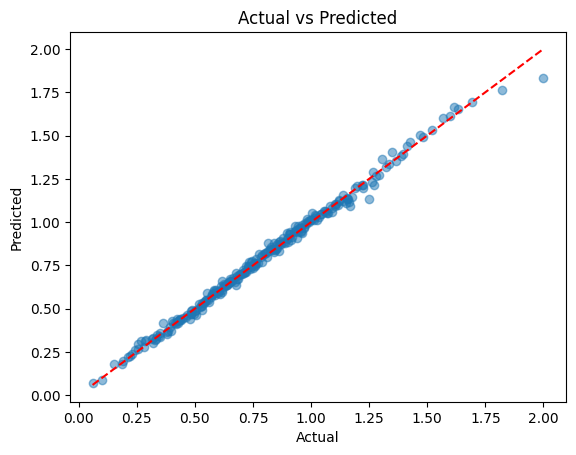

Sample with y = 1.2725791671490387 belongs to bin 13 and has an error of 0.06003591801878971
Sample with y = 0.8152982624079447 belongs to bin 8 and has an error of 0.06323378963215542
Sample with y = 1.1654474677406426 belongs to bin 12 and has an error of 0.06981670277939989
Sample with y = 1.2478274701865966 belongs to bin 12 and has an error of 0.11315387475812977
Sample with y = 2.0 belongs to bin 20 and has an error of 0.1679236888885498
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 2s 19ms/step - loss: 1.9491 - regression_head_loss: 1.9491 - val_loss: 1.9437 - val_regression_head_loss: 1.9437
Epoch 2/400
47/47 [==============================] - 1s 11ms/step - loss: 1.9255 - regression_head_loss: 1.9255 - val_loss: 1.9202 - val_regression_head_loss: 1.9202
Epoch 3/400
47/47 [==============================] - 0s 9ms/step - loss: 1.9021 - regression_head_loss: 1.9021 - val_loss: 1.8968 - val_regression_head_loss: 1.8968
Ep

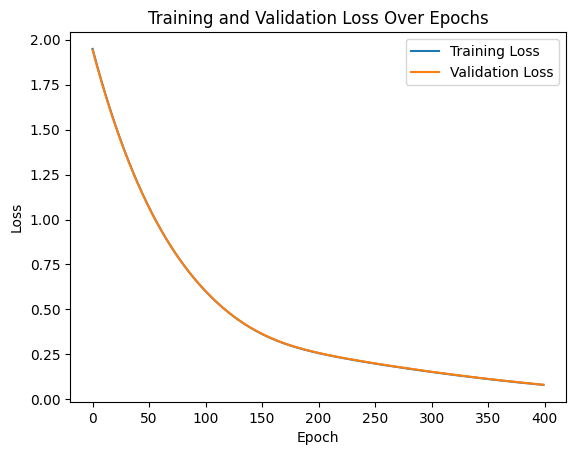

Epoch 1/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0797 - regression_head_loss: 0.0797
Epoch 2/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0789 - regression_head_loss: 0.0789
Epoch 3/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0781 - regression_head_loss: 0.0781
Epoch 4/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0773 - regression_head_loss: 0.0773
Epoch 5/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0765 - regression_head_loss: 0.0765
Epoch 6/400
63/63 [==============================] - 0s 6ms/step - loss: 0.0757 - regression_head_loss: 0.0757
Epoch 7/400
63/63 [==============================] - 0s 6ms/step - loss: 0.0749 - regression_head_loss: 0.0749
Epoch 8/400
63/63 [==============================] - 0s 6ms/step - loss: 0.0741 - regression_head_loss: 0.0741
Epoch 9/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0734 - regression_head_loss: 0.0734
E

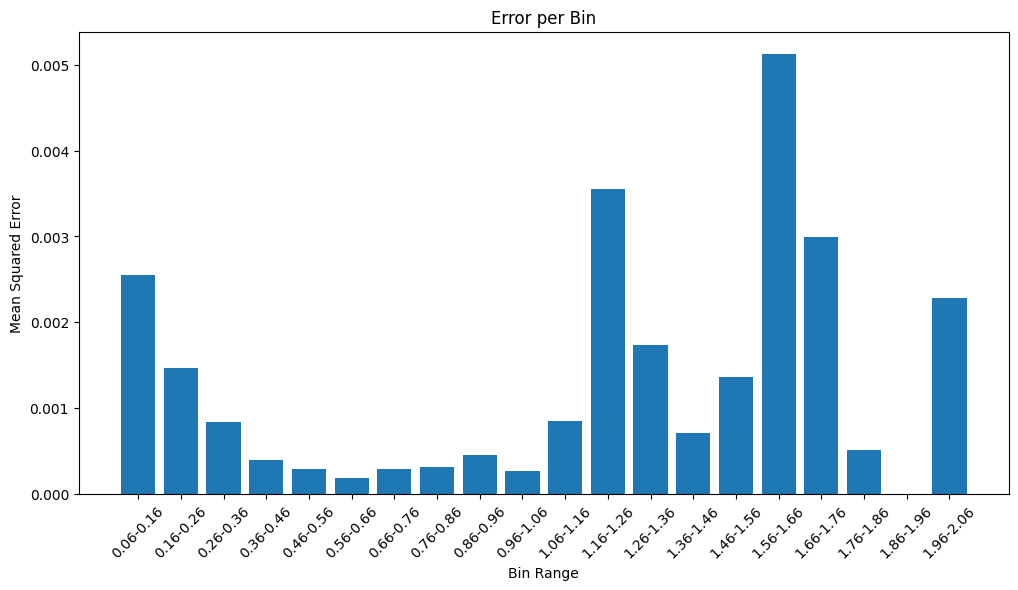

Sample with y = 1.5663541600905788 belongs to bin 16 and has an error of 0.07096540472875712
Sample with y = 1.2725791671490387 belongs to bin 13 and has an error of 0.07100198056456608
Sample with y = 1.1654474677406426 belongs to bin 12 and has an error of 0.08493136781083299
Sample with y = 1.6164164239930596 belongs to bin 16 and has an error of 0.0955479448271308
Sample with y = 1.2478274701865966 belongs to bin 12 and has an error of 0.1272209285529906
alpha value 0.5
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 1s 13ms/step - loss: 1.0209 - regression_head_loss: 1.0209 - val_loss: 0.6560 - val_regression_head_loss: 0.6560
Epoch 2/400
47/47 [==============================] - 0s 8ms/step - loss: 0.5956 - regression_head_loss: 0.5956 - val_loss: 0.3874 - val_regression_head_loss: 0.3874
Epoch 3/400
47/47 [==============================] - 0s 8ms/step - loss: 0.3165 - regression_head_loss: 0.3165 - val_loss: 0.3043 - val_r

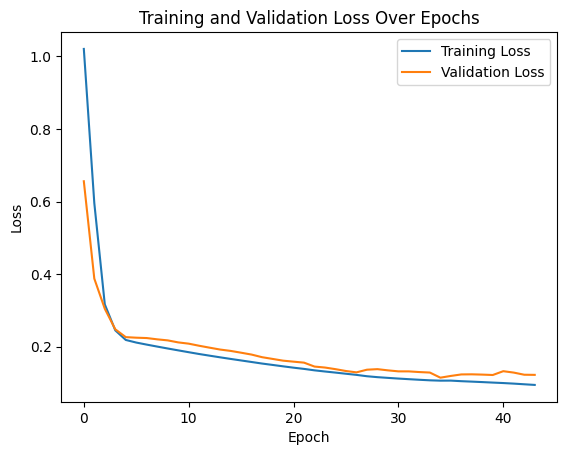

Epoch 1/35
63/63 [==============================] - 0s 5ms/step - loss: 0.1070 - regression_head_loss: 0.1070
Epoch 2/35
63/63 [==============================] - 0s 5ms/step - loss: 0.1052 - regression_head_loss: 0.1052
Epoch 3/35
63/63 [==============================] - 0s 5ms/step - loss: 0.1033 - regression_head_loss: 0.1033
Epoch 4/35
63/63 [==============================] - 0s 5ms/step - loss: 0.1009 - regression_head_loss: 0.1009
Epoch 5/35
63/63 [==============================] - 0s 5ms/step - loss: 0.0985 - regression_head_loss: 0.0985
Epoch 6/35
63/63 [==============================] - 0s 5ms/step - loss: 0.0953 - regression_head_loss: 0.0953
Epoch 7/35
63/63 [==============================] - 0s 5ms/step - loss: 0.0917 - regression_head_loss: 0.0917
Epoch 8/35
63/63 [==============================] - 0s 5ms/step - loss: 0.0894 - regression_head_loss: 0.0894
Epoch 9/35
63/63 [==============================] - 0s 5ms/step - loss: 0.0874 - regression_head_loss: 0.0874
Epoch 10/3

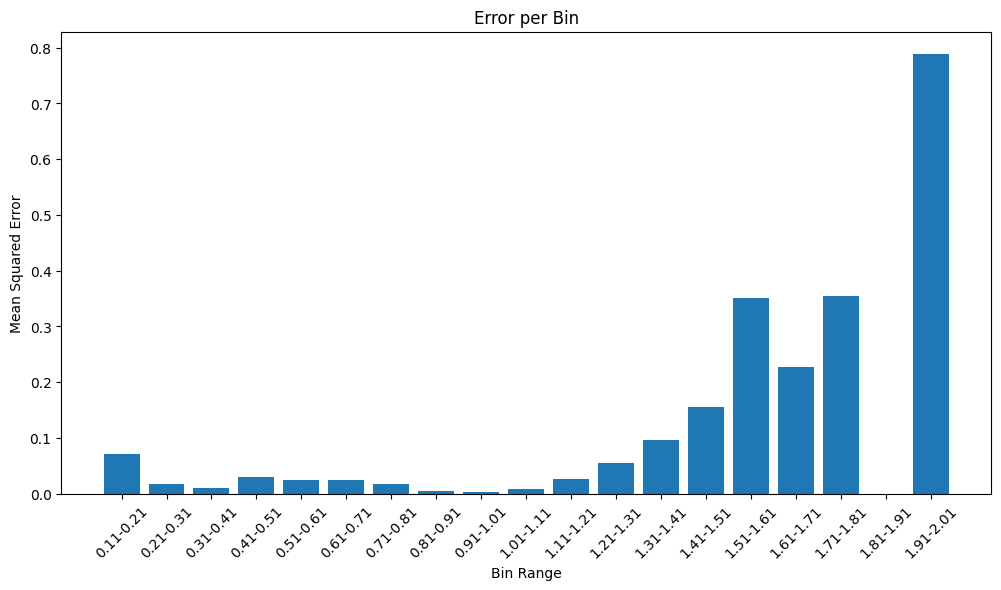

Sample with y = 1.5207347406675367 belongs to bin 15 and has an error of 0.5780598058034925
Sample with y = 1.5959348056388594 belongs to bin 15 and has an error of 0.5927397582603193
Sample with y = 1.574350352372495 belongs to bin 15 and has an error of 0.6065017534154333
Sample with y = 1.7310411187396233 belongs to bin 17 and has an error of 0.651911780475158
Sample with y = 2.0 belongs to bin 19 and has an error of 0.8884456157684326
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 1s 12ms/step - loss: 3.5772 - regression_head_loss: 3.5772 - val_loss: 3.5413 - val_regression_head_loss: 3.5413
Epoch 2/400
47/47 [==============================] - 0s 6ms/step - loss: 3.5383 - regression_head_loss: 3.5383 - val_loss: 3.5027 - val_regression_head_loss: 3.5027
Epoch 3/400
47/47 [==============================] - 0s 7ms/step - loss: 3.4998 - regression_head_loss: 3.4998 - val_loss: 3.4644 - val_regression_head_loss: 3.4644
Epoch 4/

Epoch 1/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0438 - regression_head_loss: 0.0438
Epoch 2/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0436 - regression_head_loss: 0.0436
Epoch 3/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0434 - regression_head_loss: 0.0434
Epoch 4/400
63/63 [==============================] - 0s 4ms/step - loss: 0.0433 - regression_head_loss: 0.0433
Epoch 5/400
63/63 [==============================] - 0s 4ms/step - loss: 0.0431 - regression_head_loss: 0.0431
Epoch 6/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0429 - regression_head_loss: 0.0429
Epoch 7/400
63/63 [==============================] - 0s 4ms/step - loss: 0.0428 - regression_head_loss: 0.0428
Epoch 8/400
63/63 [==============================] - 0s 4ms/step - loss: 0.0426 - regression_head_loss: 0.0426
Epoch 9/400
63/63 [==============================] - 0s 4ms/step - loss: 0.0425 - regression_head_loss: 0.0425
E

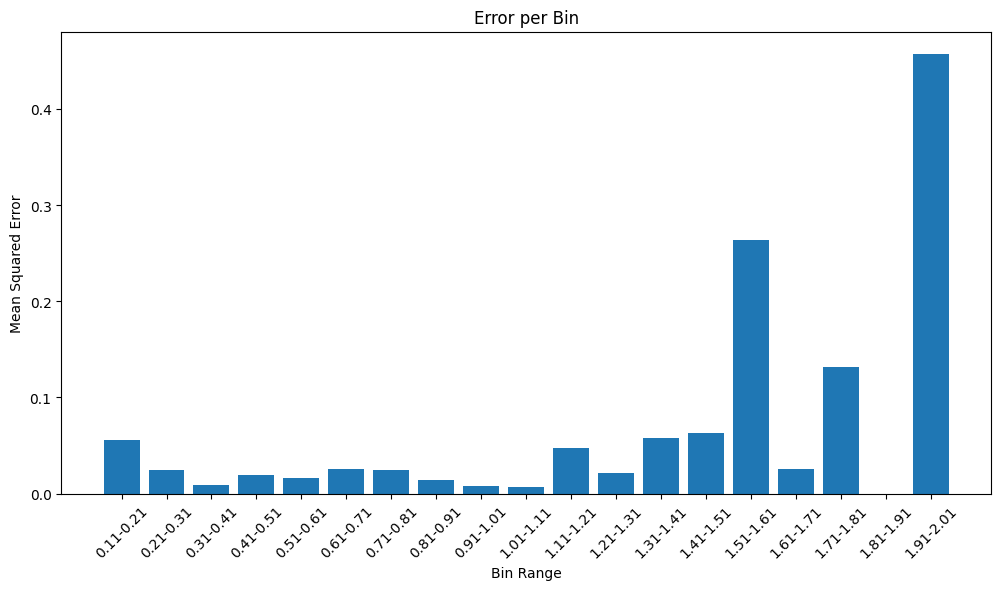

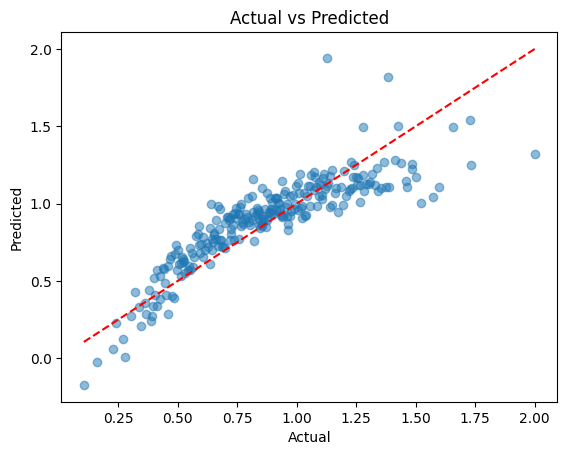

Sample with y = 1.5959348056388594 belongs to bin 15 and has an error of 0.4906122062278486
Sample with y = 1.5207347406675367 belongs to bin 15 and has an error of 0.5194395317365674
Sample with y = 1.574350352372495 belongs to bin 15 and has an error of 0.5309433890241064
Sample with y = 2.0 belongs to bin 19 and has an error of 0.6766221523284912
Sample with y = 1.1274550312136504 belongs to bin 11 and has an error of 0.8158025390530732
alpha value 0.6000000000000001
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 2s 18ms/step - loss: 0.5988 - regression_head_loss: 0.5988 - val_loss: 0.4177 - val_regression_head_loss: 0.4177
Epoch 2/400
47/47 [==============================] - 0s 8ms/step - loss: 0.3449 - regression_head_loss: 0.3449 - val_loss: 0.2969 - val_regression_head_loss: 0.2969
Epoch 3/400
47/47 [==============================] - 0s 9ms/step - loss: 0.2685 - regression_head_loss: 0.2685 - val_loss: 0.2392 - val_regre

Epoch 1/341
63/63 [==============================] - 0s 6ms/step - loss: 0.0013 - regression_head_loss: 0.0013
Epoch 2/341
63/63 [==============================] - 0s 6ms/step - loss: 0.0012 - regression_head_loss: 0.0012
Epoch 3/341
63/63 [==============================] - 0s 6ms/step - loss: 0.0012 - regression_head_loss: 0.0012
Epoch 4/341
63/63 [==============================] - 0s 7ms/step - loss: 0.0011 - regression_head_loss: 0.0011
Epoch 5/341
63/63 [==============================] - 0s 7ms/step - loss: 0.0011 - regression_head_loss: 0.0011
Epoch 6/341
63/63 [==============================] - 0s 7ms/step - loss: 0.0011 - regression_head_loss: 0.0011
Epoch 7/341
63/63 [==============================] - 0s 6ms/step - loss: 9.6149e-04 - regression_head_loss: 9.6149e-04
Epoch 8/341
63/63 [==============================] - 0s 6ms/step - loss: 9.4713e-04 - regression_head_loss: 9.4713e-04
Epoch 9/341
63/63 [==============================] - 0s 6ms/step - loss: 9.7067e-04 - regression

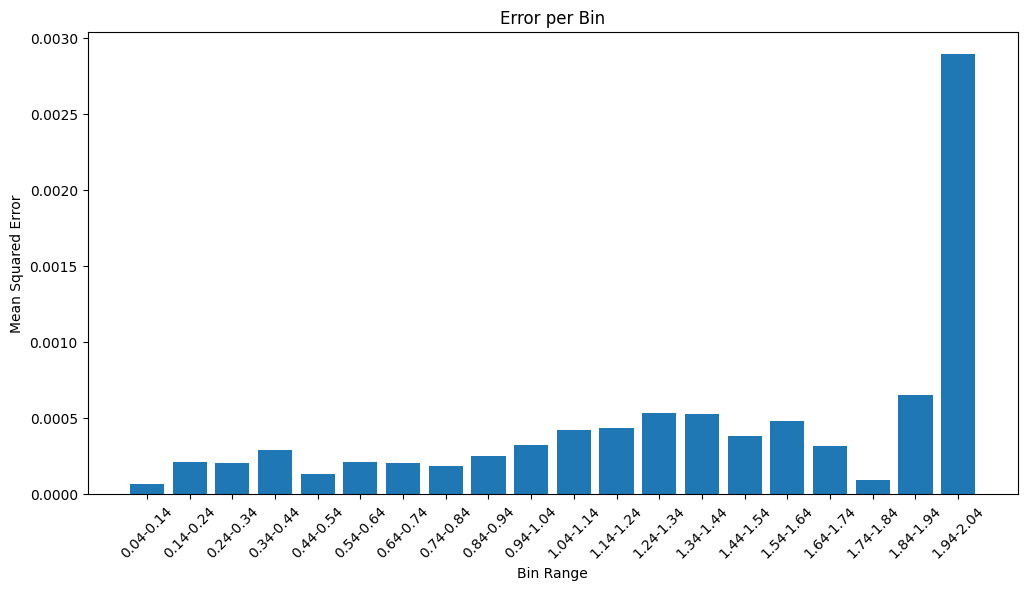

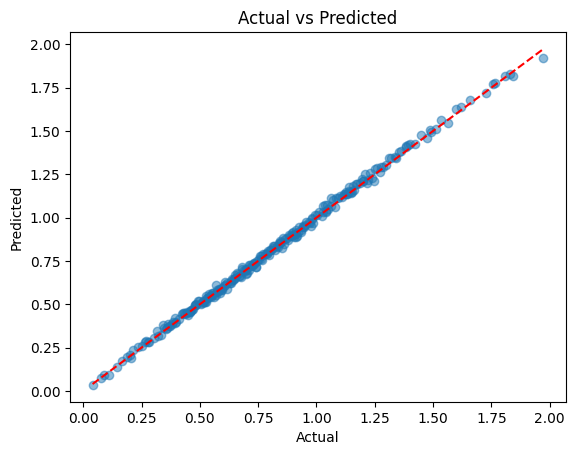

Sample with y = 0.5704181138296879 belongs to bin 6 and has an error of 0.03839397990505333
Sample with y = 0.34199398555824867 belongs to bin 4 and has an error of 0.03898021778991112
Sample with y = 1.2077992622744063 belongs to bin 12 and has an error of 0.04343252731452196
Sample with y = 1.0621439516602211 belongs to bin 11 and has an error of 0.04900547861474225
Sample with y = 1.973420353952791 belongs to bin 20 and has an error of 0.05380341631546193
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 1s 13ms/step - loss: 2.8759 - regression_head_loss: 2.8759 - val_loss: 2.8567 - val_regression_head_loss: 2.8567
Epoch 2/400
47/47 [==============================] - 0s 7ms/step - loss: 2.8403 - regression_head_loss: 2.8403 - val_loss: 2.8211 - val_regression_head_loss: 2.8211
Epoch 3/400
47/47 [==============================] - 0s 8ms/step - loss: 2.8050 - regression_head_loss: 2.8050 - val_loss: 2.7862 - val_regression_head_l

Epoch 1/400
63/63 [==============================] - 0s 6ms/step - loss: 0.0613 - regression_head_loss: 0.0613
Epoch 2/400
63/63 [==============================] - 0s 6ms/step - loss: 0.0607 - regression_head_loss: 0.0607
Epoch 3/400
63/63 [==============================] - 0s 6ms/step - loss: 0.0602 - regression_head_loss: 0.0602
Epoch 4/400
63/63 [==============================] - 0s 7ms/step - loss: 0.0596 - regression_head_loss: 0.0596
Epoch 5/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0590 - regression_head_loss: 0.0590
Epoch 6/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0584 - regression_head_loss: 0.0584
Epoch 7/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0578 - regression_head_loss: 0.0578
Epoch 8/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0572 - regression_head_loss: 0.0572
Epoch 9/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0567 - regression_head_loss: 0.0567
E

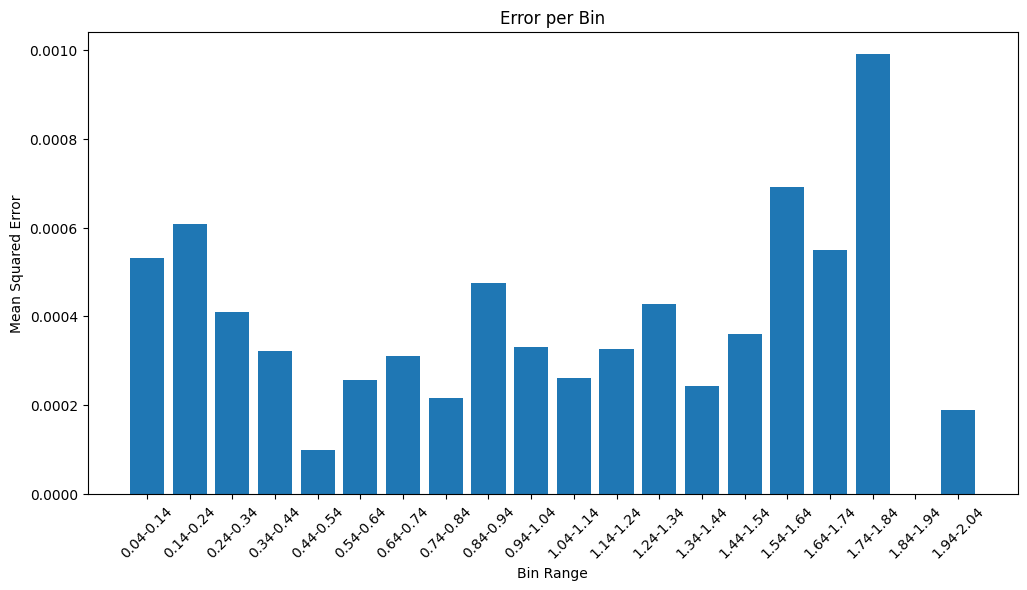

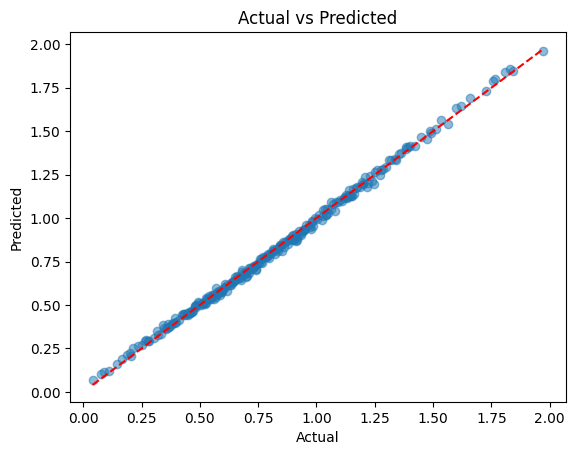

Sample with y = 0.9104268144794182 belongs to bin 9 and has an error of 0.041090090198107165
Sample with y = 0.34199398555824867 belongs to bin 4 and has an error of 0.041775347804330676
Sample with y = 0.8528906454825373 belongs to bin 9 and has an error of 0.04228231809377392
Sample with y = 0.9185406165146159 belongs to bin 9 and has an error of 0.04393835830920212
Sample with y = 1.247015876997671 belongs to bin 13 and has an error of 0.05151514552947023
alpha value 0.7000000000000001
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 1s 12ms/step - loss: 0.6200 - regression_head_loss: 0.6200 - val_loss: 0.5559 - val_regression_head_loss: 0.5559
Epoch 2/400
47/47 [==============================] - 0s 7ms/step - loss: 0.4608 - regression_head_loss: 0.4608 - val_loss: 0.3860 - val_regression_head_loss: 0.3860
Epoch 3/400
47/47 [==============================] - 0s 8ms/step - loss: 0.3581 - regression_head_loss: 0.3581 - val_loss:

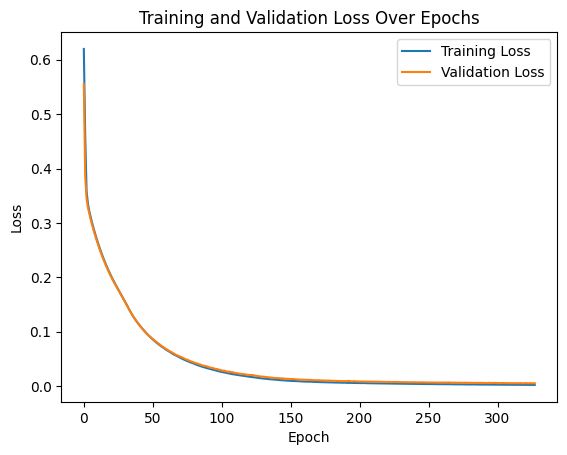

Epoch 1/319
63/63 [==============================] - 0s 6ms/step - loss: 0.0031 - regression_head_loss: 0.0031
Epoch 2/319
63/63 [==============================] - 0s 6ms/step - loss: 0.0032 - regression_head_loss: 0.0032
Epoch 3/319
63/63 [==============================] - 0s 6ms/step - loss: 0.0029 - regression_head_loss: 0.0029
Epoch 4/319
63/63 [==============================] - 0s 5ms/step - loss: 0.0029 - regression_head_loss: 0.0029
Epoch 5/319
63/63 [==============================] - 0s 6ms/step - loss: 0.0028 - regression_head_loss: 0.0028
Epoch 6/319
63/63 [==============================] - 0s 6ms/step - loss: 0.0028 - regression_head_loss: 0.0028
Epoch 7/319
63/63 [==============================] - 0s 6ms/step - loss: 0.0029 - regression_head_loss: 0.0029
Epoch 8/319
63/63 [==============================] - 0s 6ms/step - loss: 0.0028 - regression_head_loss: 0.0028
Epoch 9/319
63/63 [==============================] - 0s 5ms/step - loss: 0.0027 - regression_head_loss: 0.0027
E

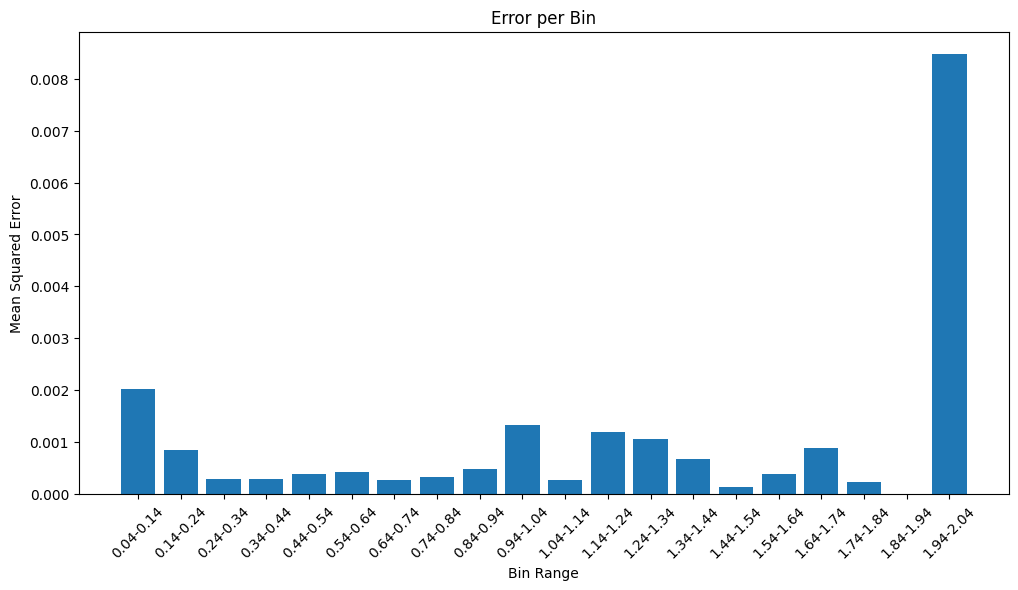

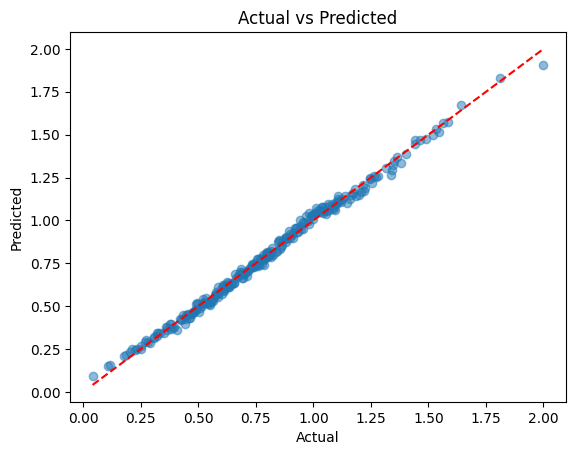

Sample with y = 0.9666357860631579 belongs to bin 10 and has an error of 0.06039968871406376
Sample with y = 0.9434743186901059 belongs to bin 10 and has an error of 0.06079635410805084
Sample with y = 0.9806944439466214 belongs to bin 10 and has an error of 0.061245053047397136
Sample with y = 1.33713175257026 belongs to bin 13 and has an error of 0.07123304804145136
Sample with y = 2.0 belongs to bin 20 and has an error of 0.09210705757141113
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 2s 19ms/step - loss: 0.5489 - regression_head_loss: 0.5489 - val_loss: 0.5484 - val_regression_head_loss: 0.5484
Epoch 2/400
47/47 [==============================] - 0s 9ms/step - loss: 0.5392 - regression_head_loss: 0.5392 - val_loss: 0.5388 - val_regression_head_loss: 0.5388
Epoch 3/400
47/47 [==============================] - 0s 8ms/step - loss: 0.5298 - regression_head_loss: 0.5298 - val_loss: 0.5297 - val_regression_head_loss: 0.5297
Ep

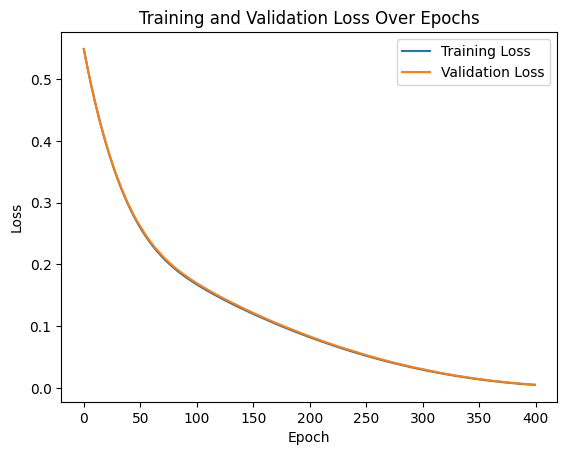

Epoch 1/400
63/63 [==============================] - 0s 6ms/step - loss: 0.0051 - regression_head_loss: 0.0051
Epoch 2/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0049 - regression_head_loss: 0.0049
Epoch 3/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0047 - regression_head_loss: 0.0047
Epoch 4/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0046 - regression_head_loss: 0.0046
Epoch 5/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0044 - regression_head_loss: 0.0044
Epoch 6/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0043 - regression_head_loss: 0.0043
Epoch 7/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0041 - regression_head_loss: 0.0041
Epoch 8/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0040 - regression_head_loss: 0.0040
Epoch 9/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0039 - regression_head_loss: 0.0039
E

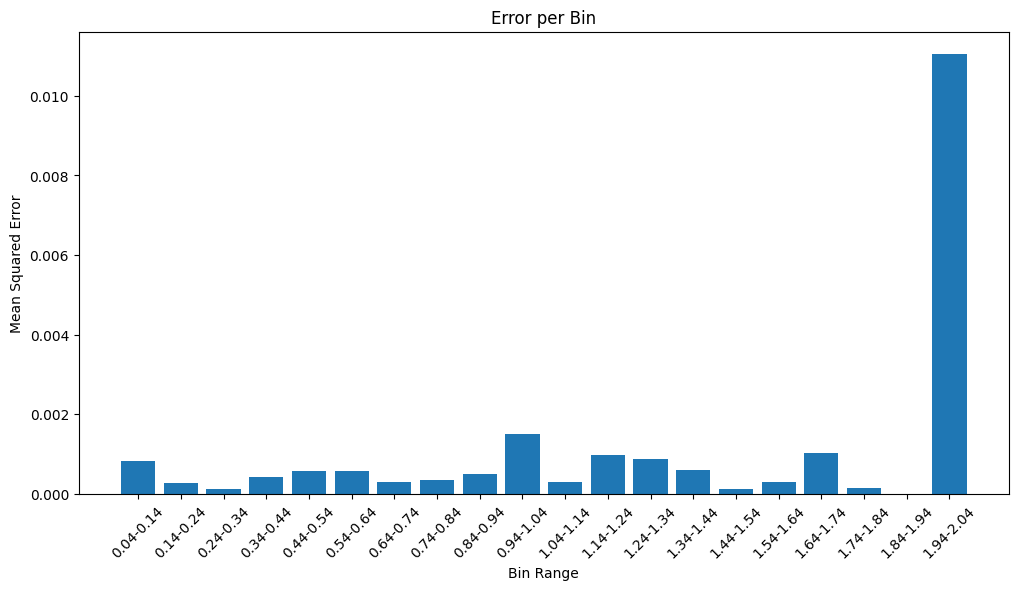

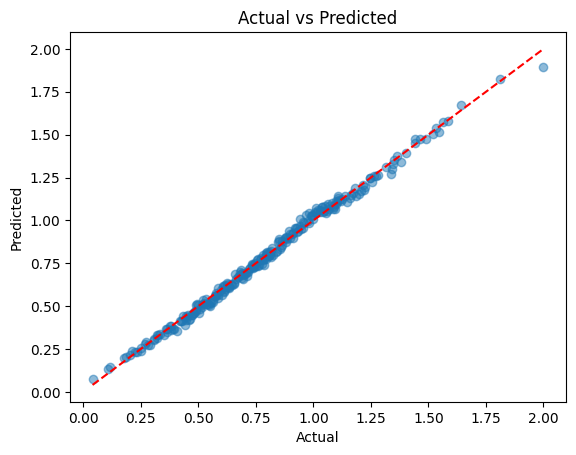

Sample with y = 0.9666357860631579 belongs to bin 10 and has an error of 0.06275967501930058
Sample with y = 0.9434743186901059 belongs to bin 10 and has an error of 0.06289658337135651
Sample with y = 0.9806944439466214 belongs to bin 10 and has an error of 0.06376799845144987
Sample with y = 1.33713175257026 belongs to bin 13 and has an error of 0.06699837644873896
Sample with y = 2.0 belongs to bin 20 and has an error of 0.10516798496246338
alpha value 0.8
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 1s 14ms/step - loss: 1.5391 - regression_head_loss: 1.5391 - val_loss: 1.1332 - val_regression_head_loss: 1.1332
Epoch 2/400
47/47 [==============================] - 1s 11ms/step - loss: 0.9029 - regression_head_loss: 0.9029 - val_loss: 0.7634 - val_regression_head_loss: 0.7634
Epoch 3/400
47/47 [==============================] - 0s 9ms/step - loss: 0.5744 - regression_head_loss: 0.5744 - val_loss: 0.5327 - val_regression_head

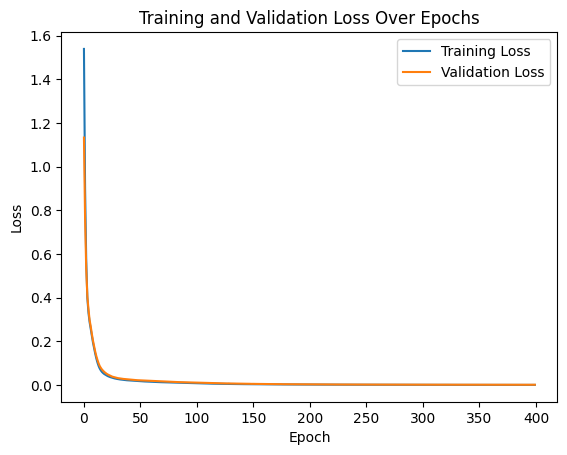

Epoch 1/399
63/63 [==============================] - 0s 6ms/step - loss: 6.1988e-04 - regression_head_loss: 6.1988e-04
Epoch 2/399
63/63 [==============================] - 0s 6ms/step - loss: 6.7535e-04 - regression_head_loss: 6.7535e-04
Epoch 3/399
63/63 [==============================] - 0s 6ms/step - loss: 6.3309e-04 - regression_head_loss: 6.3309e-04
Epoch 4/399
63/63 [==============================] - 0s 6ms/step - loss: 6.1546e-04 - regression_head_loss: 6.1546e-04
Epoch 5/399
63/63 [==============================] - 0s 7ms/step - loss: 6.0991e-04 - regression_head_loss: 6.0991e-04
Epoch 6/399
63/63 [==============================] - 0s 7ms/step - loss: 6.0273e-04 - regression_head_loss: 6.0273e-04
Epoch 7/399
63/63 [==============================] - 0s 7ms/step - loss: 5.7910e-04 - regression_head_loss: 5.7910e-04
Epoch 8/399
63/63 [==============================] - 0s 7ms/step - loss: 5.6142e-04 - regression_head_loss: 5.6142e-04
Epoch 9/399
63/63 [=============================

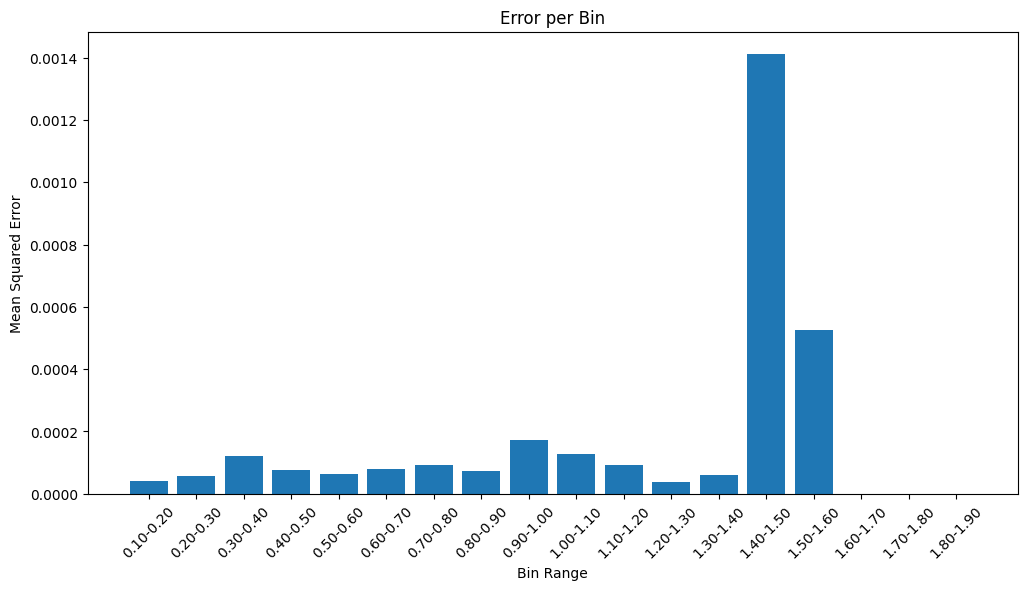

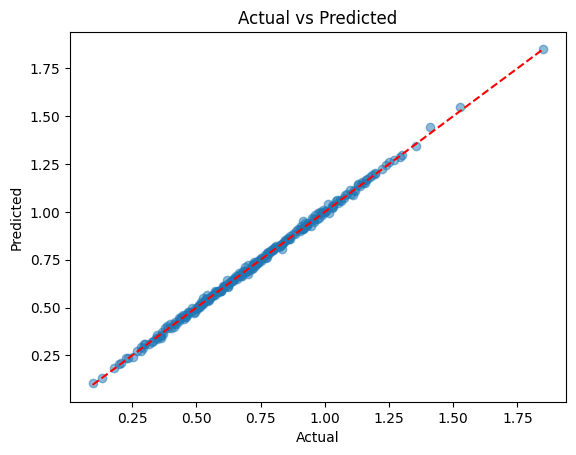

Sample with y = 0.6172872978431226 belongs to bin 6 and has an error of 0.02431855619130119
Sample with y = 0.8347227359159344 belongs to bin 8 and has an error of 0.028995730911051565
Sample with y = 1.011254189571554 belongs to bin 10 and has an error of 0.029219629207437592
Sample with y = 0.915737373182879 belongs to bin 9 and has an error of 0.03413589542139961
Sample with y = 1.4078890391228525 belongs to bin 14 and has an error of 0.037589042580333576
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 1s 17ms/step - loss: 3.3474 - regression_head_loss: 3.3474 - val_loss: 3.3392 - val_regression_head_loss: 3.3392
Epoch 2/400
47/47 [==============================] - 0s 7ms/step - loss: 3.3090 - regression_head_loss: 3.3090 - val_loss: 3.3011 - val_regression_head_loss: 3.3011
Epoch 3/400
47/47 [==============================] - 0s 8ms/step - loss: 3.2712 - regression_head_loss: 3.2712 - val_loss: 3.2636 - val_regression_head_l

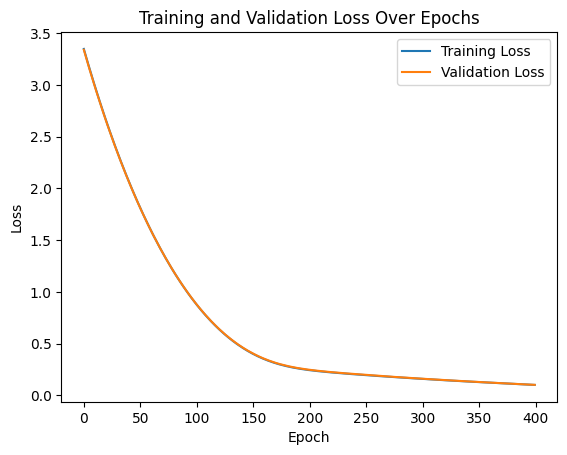

Epoch 1/400
63/63 [==============================] - 0s 5ms/step - loss: 0.1016 - regression_head_loss: 0.1016
Epoch 2/400
63/63 [==============================] - 0s 5ms/step - loss: 0.1009 - regression_head_loss: 0.1009
Epoch 3/400
63/63 [==============================] - 0s 5ms/step - loss: 0.1003 - regression_head_loss: 0.1003
Epoch 4/400
63/63 [==============================] - 0s 4ms/step - loss: 0.0996 - regression_head_loss: 0.0996
Epoch 5/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0989 - regression_head_loss: 0.0989
Epoch 6/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0982 - regression_head_loss: 0.0982
Epoch 7/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0975 - regression_head_loss: 0.0975
Epoch 8/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0969 - regression_head_loss: 0.0969
Epoch 9/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0962 - regression_head_loss: 0.0962
E

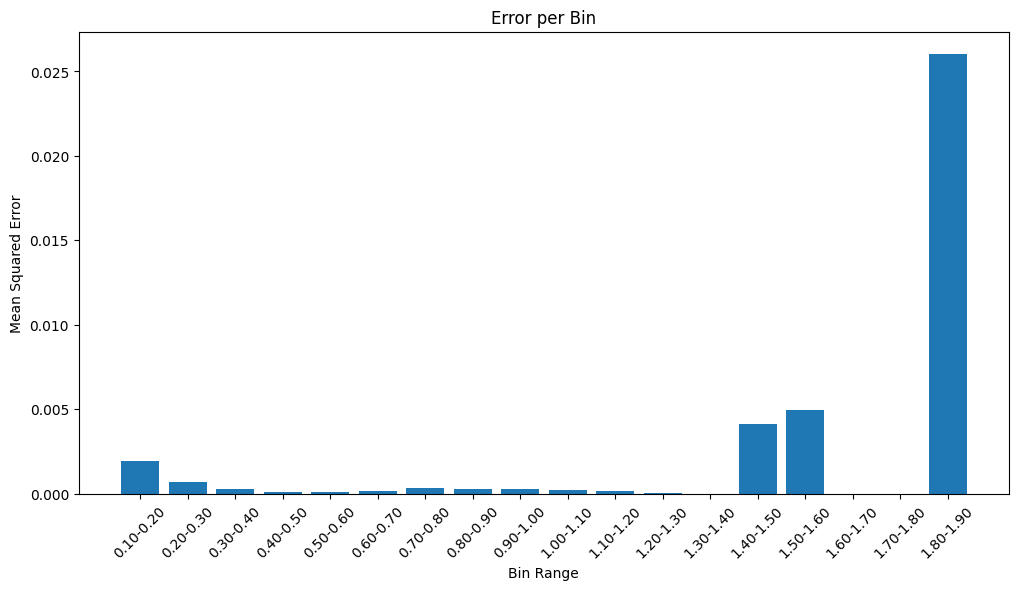

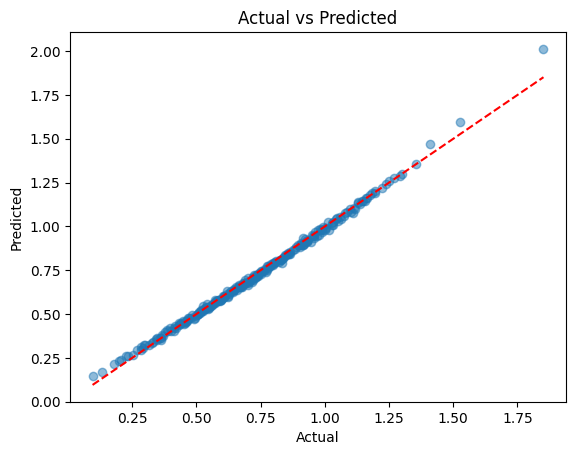

Sample with y = 0.8347227359159344 belongs to bin 8 and has an error of 0.04521630052164727
Sample with y = 0.09557706906673828 belongs to bin 1 and has an error of 0.05370896265628418
Sample with y = 1.4078890391228525 belongs to bin 14 and has an error of 0.06445059100410067
Sample with y = 1.5253342009465027 belongs to bin 15 and has an error of 0.07059899798233027
Sample with y = 1.8512661165210076 belongs to bin 18 and has an error of 0.16139915523802562
alpha value 0.9
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 1s 15ms/step - loss: 1.6267 - regression_head_loss: 1.6267 - val_loss: 1.1919 - val_regression_head_loss: 1.1919
Epoch 2/400
47/47 [==============================] - 0s 9ms/step - loss: 0.7668 - regression_head_loss: 0.7668 - val_loss: 0.4876 - val_regression_head_loss: 0.4876
Epoch 3/400
47/47 [==============================] - 0s 9ms/step - loss: 0.4055 - regression_head_loss: 0.4055 - val_loss: 0.3814 - val_

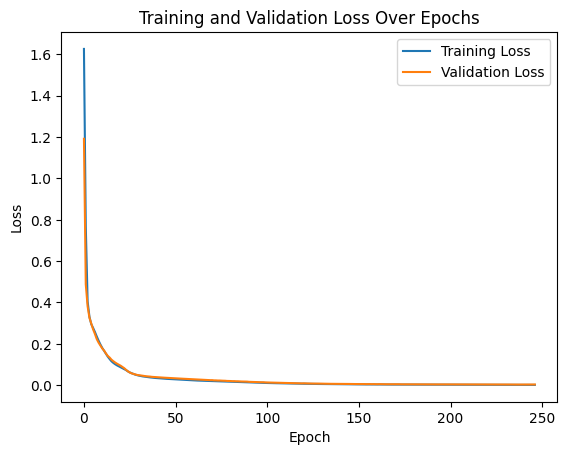

Epoch 1/238
63/63 [==============================] - 0s 6ms/step - loss: 0.0017 - regression_head_loss: 0.0017
Epoch 2/238
63/63 [==============================] - 0s 7ms/step - loss: 0.0016 - regression_head_loss: 0.0016
Epoch 3/238
63/63 [==============================] - 0s 6ms/step - loss: 0.0016 - regression_head_loss: 0.0016
Epoch 4/238
63/63 [==============================] - 0s 7ms/step - loss: 0.0015 - regression_head_loss: 0.0015
Epoch 5/238
63/63 [==============================] - 0s 7ms/step - loss: 0.0015 - regression_head_loss: 0.0015
Epoch 6/238
63/63 [==============================] - 0s 7ms/step - loss: 0.0016 - regression_head_loss: 0.0016
Epoch 7/238
63/63 [==============================] - 0s 6ms/step - loss: 0.0015 - regression_head_loss: 0.0015
Epoch 8/238
63/63 [==============================] - 0s 7ms/step - loss: 0.0015 - regression_head_loss: 0.0015
Epoch 9/238
63/63 [==============================] - 0s 6ms/step - loss: 0.0014 - regression_head_loss: 0.0014
E

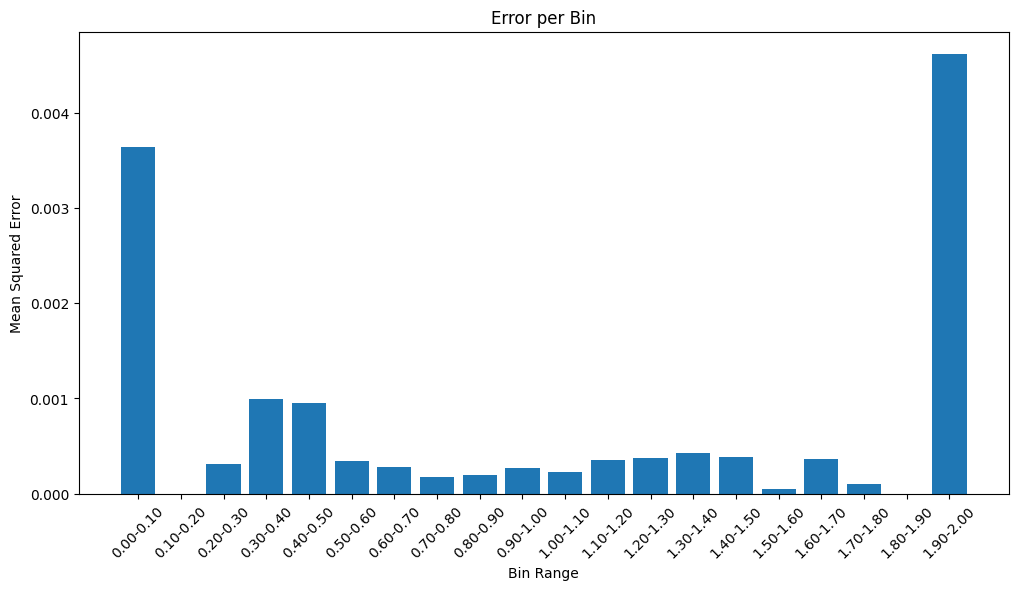

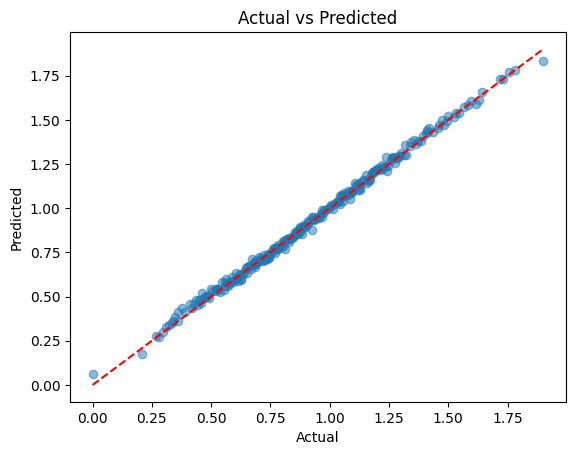

Sample with y = 0.37857231637796845 belongs to bin 4 and has an error of 0.05419429996648345
Sample with y = 0.360207425666959 belongs to bin 4 and has an error of 0.054225040363161836
Sample with y = 0.46013896636139223 belongs to bin 5 and has an error of 0.05736417599548033
Sample with y = 0.0 belongs to bin 1 and has an error of 0.060335539281368256
Sample with y = 1.9015098422973473 belongs to bin 20 and has an error of 0.06795938911131216
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 1s 14ms/step - loss: 3.1673 - regression_head_loss: 3.1673 - val_loss: 3.1425 - val_regression_head_loss: 3.1425
Epoch 2/400
47/47 [==============================] - 0s 9ms/step - loss: 3.1325 - regression_head_loss: 3.1325 - val_loss: 3.1083 - val_regression_head_loss: 3.1083
Epoch 3/400
47/47 [==============================] - 1s 11ms/step - loss: 3.0985 - regression_head_loss: 3.0985 - val_loss: 3.0741 - val_regression_head_loss: 3.0741
E

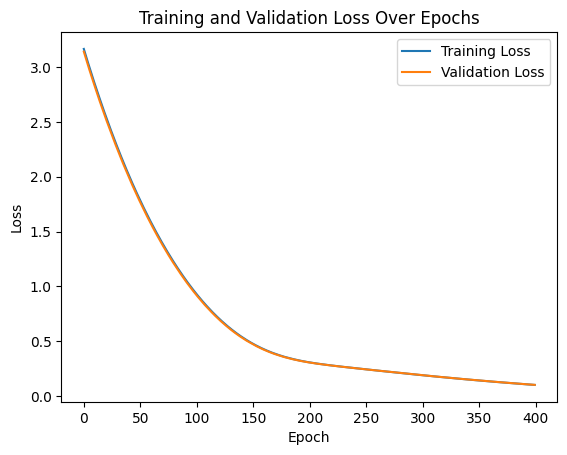

Epoch 1/400
63/63 [==============================] - 0s 6ms/step - loss: 0.0991 - regression_head_loss: 0.0991
Epoch 2/400
63/63 [==============================] - 0s 7ms/step - loss: 0.0981 - regression_head_loss: 0.0981
Epoch 3/400
63/63 [==============================] - 0s 6ms/step - loss: 0.0971 - regression_head_loss: 0.0971
Epoch 4/400
63/63 [==============================] - 0s 6ms/step - loss: 0.0961 - regression_head_loss: 0.0961
Epoch 5/400
63/63 [==============================] - 0s 7ms/step - loss: 0.0951 - regression_head_loss: 0.0951
Epoch 6/400
63/63 [==============================] - 1s 8ms/step - loss: 0.0941 - regression_head_loss: 0.0941
Epoch 7/400
63/63 [==============================] - 0s 7ms/step - loss: 0.0932 - regression_head_loss: 0.0932
Epoch 8/400
63/63 [==============================] - 1s 8ms/step - loss: 0.0922 - regression_head_loss: 0.0922
Epoch 9/400
63/63 [==============================] - 0s 8ms/step - loss: 0.0913 - regression_head_loss: 0.0913
E

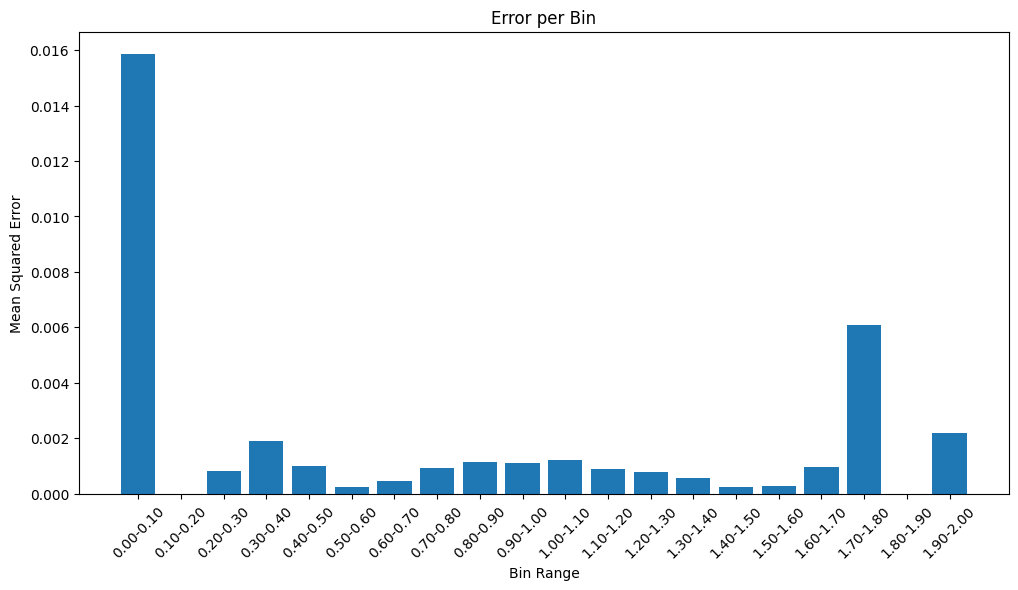

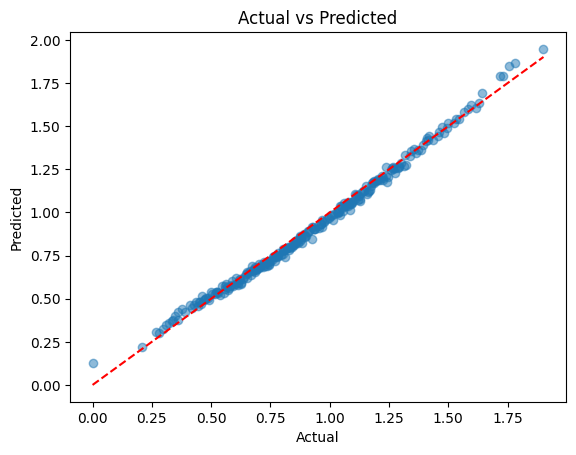

Sample with y = 1.7201641699369579 belongs to bin 18 and has an error of 0.07200134787004897
Sample with y = 0.9255300741065732 belongs to bin 10 and has an error of 0.08004969166409881
Sample with y = 1.7795538491470901 belongs to bin 18 and has an error of 0.08430961902307588
Sample with y = 1.7559225491188788 belongs to bin 18 and has an error of 0.09181738580238585
Sample with y = 0.0 belongs to bin 1 and has an error of 0.12597233057022095
alpha value 1.0
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 1s 12ms/step - loss: 0.7198 - regression_head_loss: 0.7198 - val_loss: 0.5131 - val_regression_head_loss: 0.5131
Epoch 2/400
47/47 [==============================] - 0s 8ms/step - loss: 0.3062 - regression_head_loss: 0.3062 - val_loss: 0.2222 - val_regression_head_loss: 0.2222
Epoch 3/400
47/47 [==============================] - 1s 12ms/step - loss: 0.1974 - regression_head_loss: 0.1974 - val_loss: 0.1860 - val_regression_hea

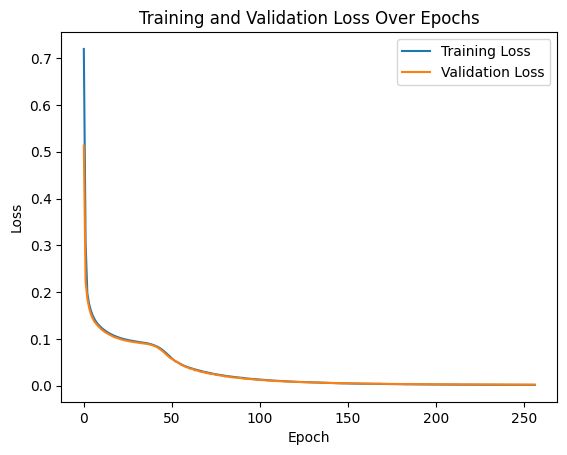

Epoch 1/248
63/63 [==============================] - 0s 6ms/step - loss: 0.0017 - regression_head_loss: 0.0017
Epoch 2/248
63/63 [==============================] - 0s 6ms/step - loss: 0.0017 - regression_head_loss: 0.0017
Epoch 3/248
63/63 [==============================] - 0s 6ms/step - loss: 0.0016 - regression_head_loss: 0.0016
Epoch 4/248
63/63 [==============================] - 0s 6ms/step - loss: 0.0016 - regression_head_loss: 0.0016
Epoch 5/248
63/63 [==============================] - 0s 7ms/step - loss: 0.0016 - regression_head_loss: 0.0016
Epoch 6/248
63/63 [==============================] - 0s 6ms/step - loss: 0.0016 - regression_head_loss: 0.0016
Epoch 7/248
63/63 [==============================] - 0s 6ms/step - loss: 0.0015 - regression_head_loss: 0.0015
Epoch 8/248
63/63 [==============================] - 0s 7ms/step - loss: 0.0015 - regression_head_loss: 0.0015
Epoch 9/248
63/63 [==============================] - 0s 7ms/step - loss: 0.0015 - regression_head_loss: 0.0015
E

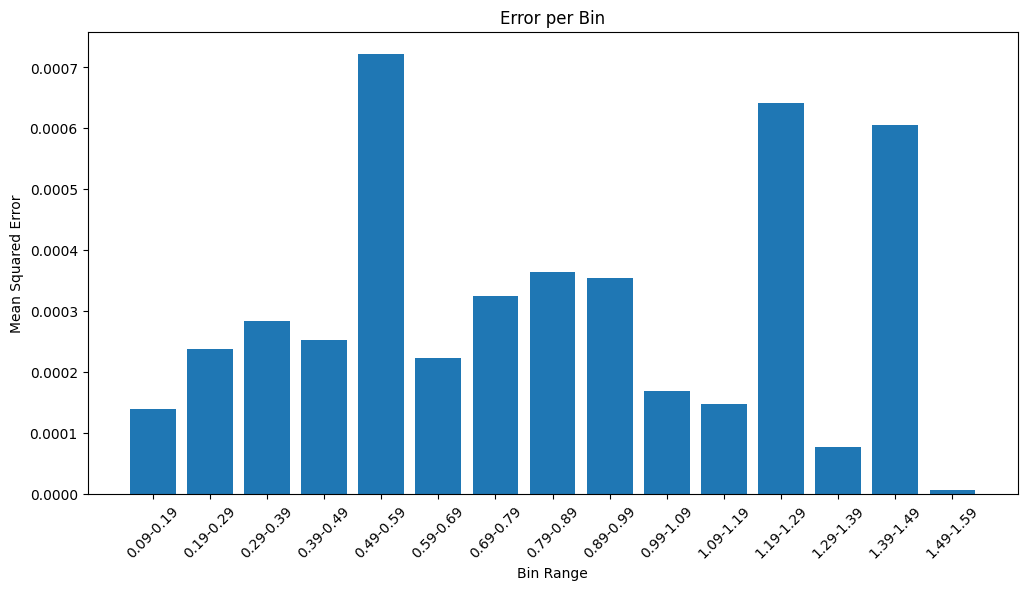

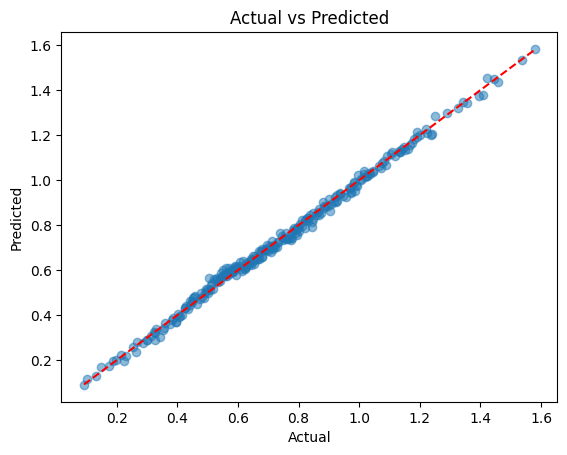

Sample with y = 0.5428968464093786 belongs to bin 5 and has an error of 0.044101854686202424
Sample with y = 0.5600308562338695 belongs to bin 5 and has an error of 0.047757944959367804
Sample with y = 0.5516859118876641 belongs to bin 5 and has an error of 0.048338907486420335
Sample with y = 0.8442273987384571 belongs to bin 8 and has an error of 0.05415185819585455
Sample with y = 0.5060357402688694 belongs to bin 5 and has an error of 0.06040841828520771
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 2s 19ms/step - loss: 0.6991 - regression_head_loss: 0.6991 - val_loss: 0.6731 - val_regression_head_loss: 0.6731
Epoch 2/400
47/47 [==============================] - 0s 10ms/step - loss: 0.6863 - regression_head_loss: 0.6863 - val_loss: 0.6607 - val_regression_head_loss: 0.6607
Epoch 3/400
47/47 [==============================] - 0s 7ms/step - loss: 0.6734 - regression_head_loss: 0.6734 - val_loss: 0.6486 - val_regression_head_

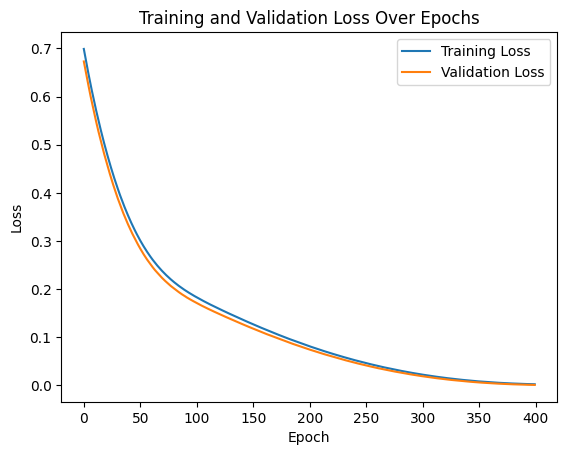

Epoch 1/400
63/63 [==============================] - 0s 6ms/step - loss: 0.0022 - regression_head_loss: 0.0022
Epoch 2/400
63/63 [==============================] - 0s 6ms/step - loss: 0.0021 - regression_head_loss: 0.0021
Epoch 3/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0020 - regression_head_loss: 0.0020
Epoch 4/400
63/63 [==============================] - 0s 6ms/step - loss: 0.0020 - regression_head_loss: 0.0020
Epoch 5/400
63/63 [==============================] - 1s 9ms/step - loss: 0.0019 - regression_head_loss: 0.0019
Epoch 6/400
63/63 [==============================] - 0s 7ms/step - loss: 0.0018 - regression_head_loss: 0.0018
Epoch 7/400
63/63 [==============================] - 0s 6ms/step - loss: 0.0018 - regression_head_loss: 0.0018
Epoch 8/400
63/63 [==============================] - 0s 7ms/step - loss: 0.0017 - regression_head_loss: 0.0017
Epoch 9/400
63/63 [==============================] - 0s 6ms/step - loss: 0.0017 - regression_head_loss: 0.0017
E

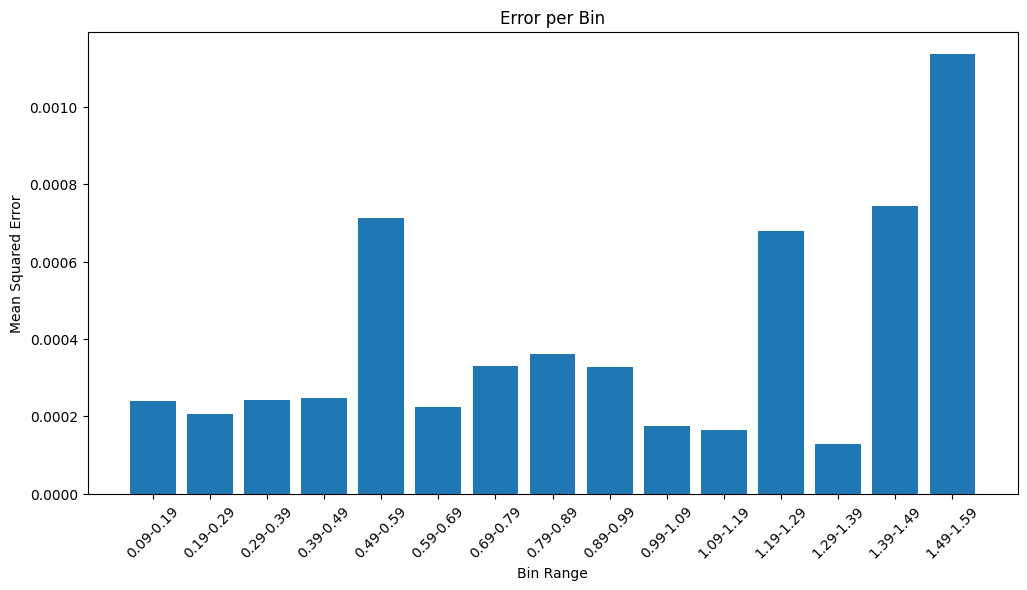

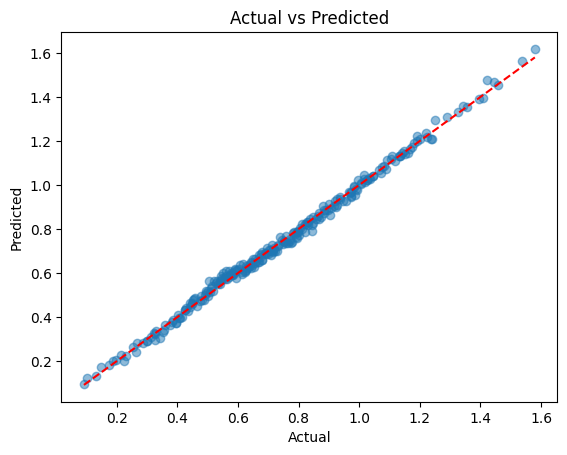

Sample with y = 0.5600308562338695 belongs to bin 5 and has an error of 0.04742356290217786
Sample with y = 0.5516859118876641 belongs to bin 5 and has an error of 0.04802240682266301
Sample with y = 1.4228981737576232 belongs to bin 14 and has an error of 0.053691863588263056
Sample with y = 0.8442273987384571 belongs to bin 8 and has an error of 0.05409523378331793
Sample with y = 0.5060357402688694 belongs to bin 5 and has an error of 0.060200696098165474
alpha value 1.1
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 1s 11ms/step - loss: 0.7732 - regression_head_loss: 0.7732 - val_loss: 0.5189 - val_regression_head_loss: 0.5189
Epoch 2/400
47/47 [==============================] - 0s 7ms/step - loss: 0.2762 - regression_head_loss: 0.2762 - val_loss: 0.1868 - val_regression_head_loss: 0.1868
Epoch 3/400
47/47 [==============================] - 0s 7ms/step - loss: 0.1666 - regression_head_loss: 0.1666 - val_loss: 0.1570 - val_r

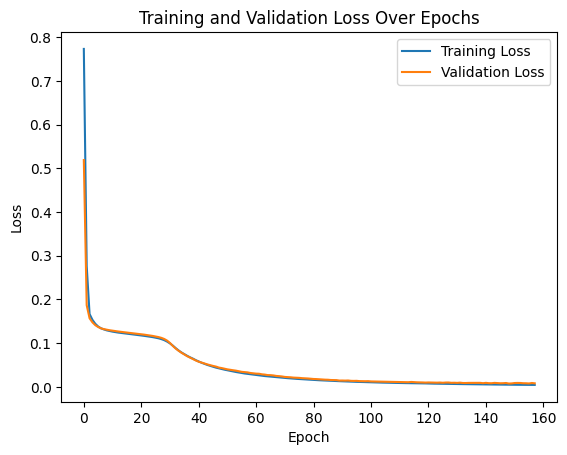

Epoch 1/149
63/63 [==============================] - 0s 6ms/step - loss: 0.0062 - regression_head_loss: 0.0062
Epoch 2/149
63/63 [==============================] - 0s 6ms/step - loss: 0.0055 - regression_head_loss: 0.0055
Epoch 3/149
63/63 [==============================] - 0s 6ms/step - loss: 0.0053 - regression_head_loss: 0.0053
Epoch 4/149
63/63 [==============================] - 0s 6ms/step - loss: 0.0051 - regression_head_loss: 0.0051
Epoch 5/149
63/63 [==============================] - 0s 5ms/step - loss: 0.0052 - regression_head_loss: 0.0052
Epoch 6/149
63/63 [==============================] - 0s 6ms/step - loss: 0.0050 - regression_head_loss: 0.0050
Epoch 7/149
63/63 [==============================] - 0s 6ms/step - loss: 0.0049 - regression_head_loss: 0.0049
Epoch 8/149
63/63 [==============================] - 0s 6ms/step - loss: 0.0048 - regression_head_loss: 0.0048
Epoch 9/149
63/63 [==============================] - 0s 5ms/step - loss: 0.0047 - regression_head_loss: 0.0047
E

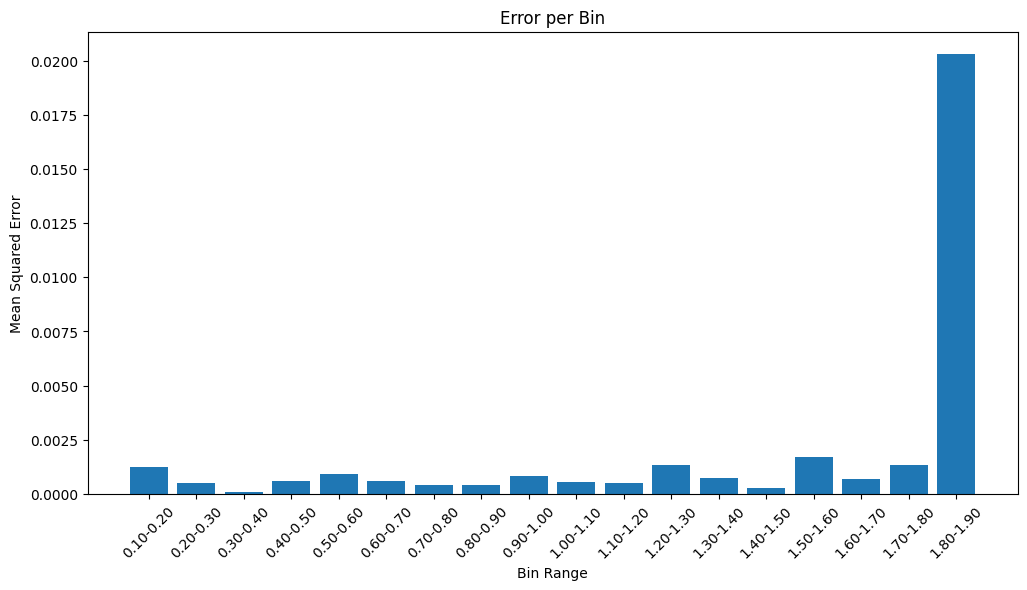

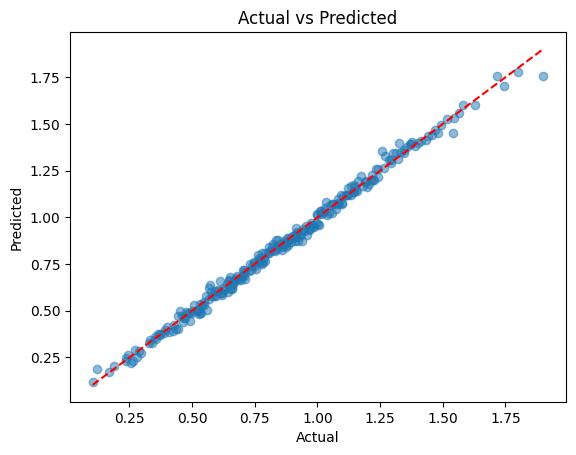

Sample with y = 0.12158776508353475 belongs to bin 1 and has an error of 0.06731416596390483
Sample with y = 1.3247263047549813 belongs to bin 13 and has an error of 0.0708238270428092
Sample with y = 1.5403690149800706 belongs to bin 15 and has an error of 0.08814666772054913
Sample with y = 1.2568999884376957 belongs to bin 12 and has an error of 0.09734579346080285
Sample with y = 1.9016255472658206 belongs to bin 18 and has an error of 0.14260784134846216
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 1s 12ms/step - loss: 4.5961 - regression_head_loss: 4.5961 - val_loss: 4.5454 - val_regression_head_loss: 4.5454
Epoch 2/400
47/47 [==============================] - 0s 7ms/step - loss: 4.5627 - regression_head_loss: 4.5627 - val_loss: 4.5129 - val_regression_head_loss: 4.5129
Epoch 3/400
47/47 [==============================] - 0s 7ms/step - loss: 4.5300 - regression_head_loss: 4.5300 - val_loss: 4.4795 - val_regression_head_

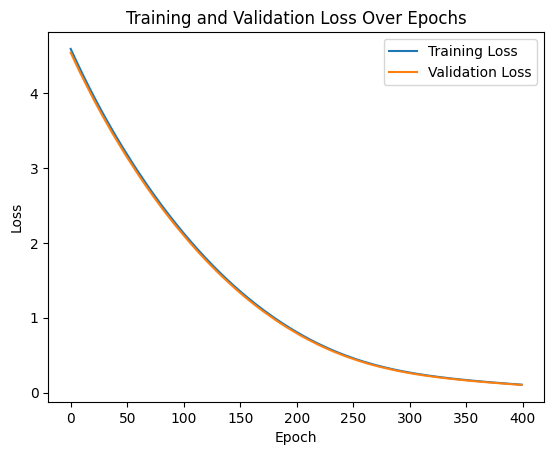

Epoch 1/400
63/63 [==============================] - 0s 6ms/step - loss: 0.1036 - regression_head_loss: 0.1036
Epoch 2/400
63/63 [==============================] - 0s 6ms/step - loss: 0.1022 - regression_head_loss: 0.1022
Epoch 3/400
63/63 [==============================] - 0s 6ms/step - loss: 0.1008 - regression_head_loss: 0.1008
Epoch 4/400
63/63 [==============================] - 0s 6ms/step - loss: 0.0995 - regression_head_loss: 0.0995
Epoch 5/400
63/63 [==============================] - 0s 7ms/step - loss: 0.0981 - regression_head_loss: 0.0981
Epoch 6/400
63/63 [==============================] - 0s 7ms/step - loss: 0.0968 - regression_head_loss: 0.0968
Epoch 7/400
63/63 [==============================] - 0s 6ms/step - loss: 0.0955 - regression_head_loss: 0.0955
Epoch 8/400
63/63 [==============================] - 0s 6ms/step - loss: 0.0941 - regression_head_loss: 0.0941
Epoch 9/400
63/63 [==============================] - 0s 6ms/step - loss: 0.0928 - regression_head_loss: 0.0928
E

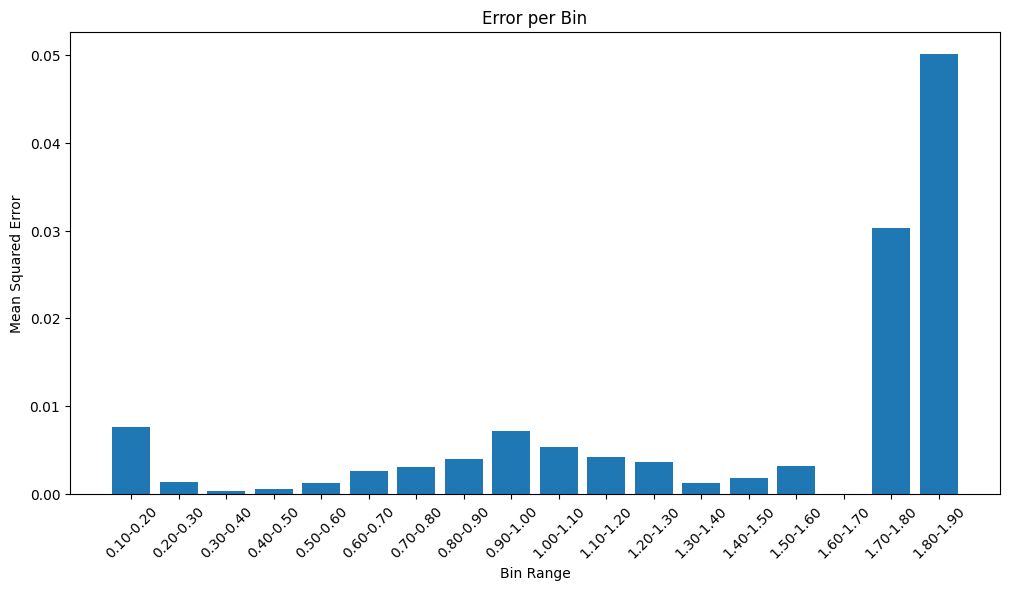

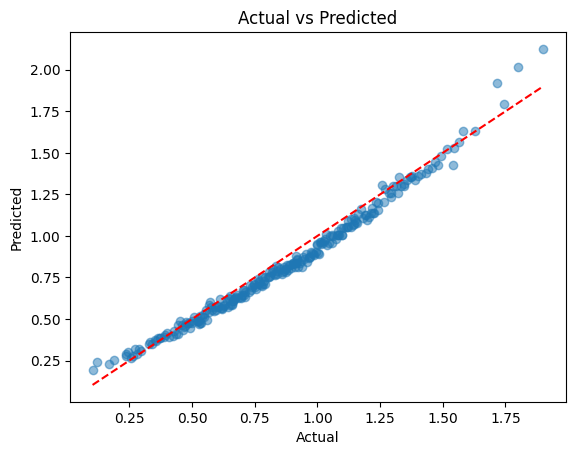

Sample with y = 0.12158776508353475 belongs to bin 1 and has an error of 0.12227164520241496
Sample with y = 0.9392750643367966 belongs to bin 9 and has an error of 0.12717107759668433
Sample with y = 1.7165478960259142 belongs to bin 17 and has an error of 0.20491213643715955
Sample with y = 1.7988475681938856 belongs to bin 17 and has an error of 0.21582375748970817
Sample with y = 1.9016255472658206 belongs to bin 18 and has an error of 0.22394141211528296
alpha value 1.2000000000000002
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 1s 12ms/step - loss: 0.9221 - regression_head_loss: 0.9221 - val_loss: 0.6717 - val_regression_head_loss: 0.6717
Epoch 2/400
47/47 [==============================] - 0s 8ms/step - loss: 0.5201 - regression_head_loss: 0.5201 - val_loss: 0.4397 - val_regression_head_loss: 0.4397
Epoch 3/400
47/47 [==============================] - 0s 8ms/step - loss: 0.3162 - regression_head_loss: 0.3162 - val_loss

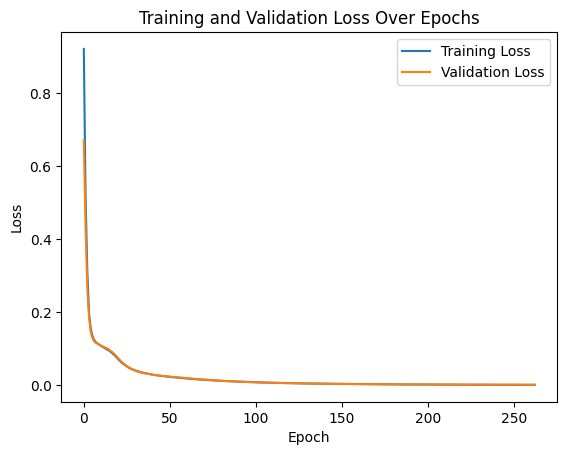

Epoch 1/254
63/63 [==============================] - 0s 7ms/step - loss: 0.0017 - regression_head_loss: 0.0017
Epoch 2/254
63/63 [==============================] - 0s 7ms/step - loss: 0.0015 - regression_head_loss: 0.0015
Epoch 3/254
63/63 [==============================] - 0s 7ms/step - loss: 0.0015 - regression_head_loss: 0.0015
Epoch 4/254
63/63 [==============================] - 0s 7ms/step - loss: 0.0016 - regression_head_loss: 0.0016
Epoch 5/254
63/63 [==============================] - 1s 9ms/step - loss: 0.0015 - regression_head_loss: 0.0015
Epoch 6/254
63/63 [==============================] - 1s 10ms/step - loss: 0.0015 - regression_head_loss: 0.0015
Epoch 7/254
63/63 [==============================] - 1s 9ms/step - loss: 0.0014 - regression_head_loss: 0.0014
Epoch 8/254
63/63 [==============================] - 0s 7ms/step - loss: 0.0014 - regression_head_loss: 0.0014
Epoch 9/254
63/63 [==============================] - 0s 7ms/step - loss: 0.0014 - regression_head_loss: 0.0014


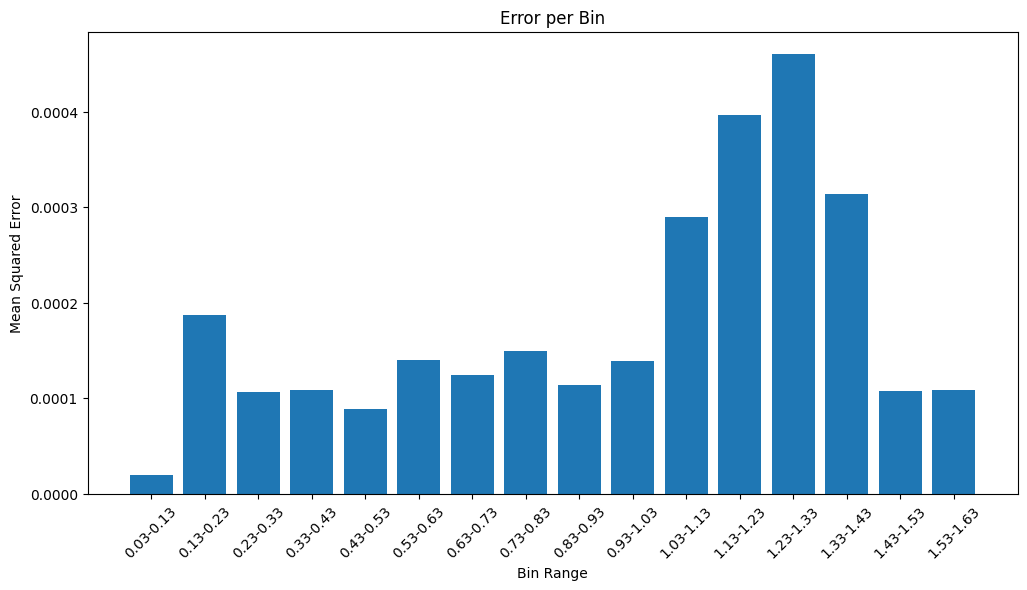

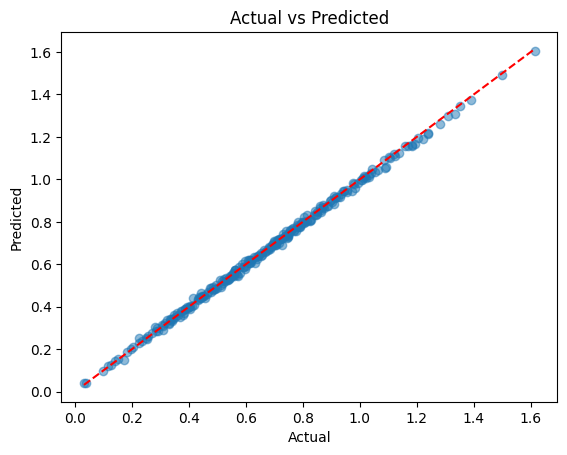

Sample with y = 0.5725218900327647 belongs to bin 6 and has an error of 0.02980294309901832
Sample with y = 1.2223086704708195 belongs to bin 12 and has an error of 0.029979740569696434
Sample with y = 1.0905069406665424 belongs to bin 11 and has an error of 0.03169503766666448
Sample with y = 1.0884988021543316 belongs to bin 11 and has an error of 0.034549207656650927
Sample with y = 0.7267500966747414 belongs to bin 7 and has an error of 0.03798403441506737
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 1s 14ms/step - loss: 0.1543 - regression_head_loss: 0.1543 - val_loss: 0.1385 - val_regression_head_loss: 0.1385
Epoch 2/400
47/47 [==============================] - 0s 7ms/step - loss: 0.1500 - regression_head_loss: 0.1500 - val_loss: 0.1345 - val_regression_head_loss: 0.1345
Epoch 3/400
47/47 [==============================] - 0s 8ms/step - loss: 0.1462 - regression_head_loss: 0.1462 - val_loss: 0.1308 - val_regression_head

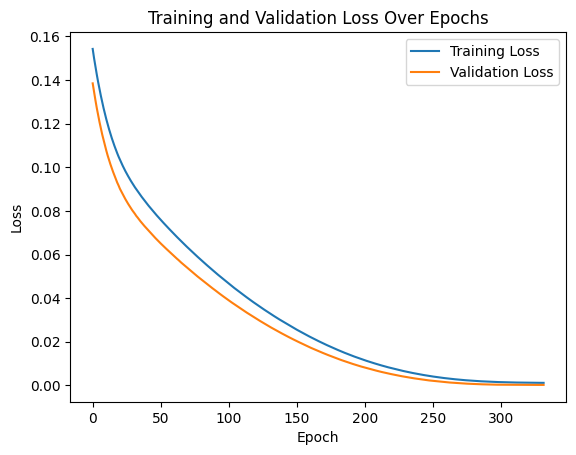

Epoch 1/323
63/63 [==============================] - 0s 6ms/step - loss: 9.6118e-04 - regression_head_loss: 9.6118e-04
Epoch 2/323
63/63 [==============================] - 0s 6ms/step - loss: 9.5644e-04 - regression_head_loss: 9.5644e-04
Epoch 3/323
63/63 [==============================] - 0s 6ms/step - loss: 9.5048e-04 - regression_head_loss: 9.5048e-04
Epoch 4/323
63/63 [==============================] - 0s 8ms/step - loss: 9.4679e-04 - regression_head_loss: 9.4679e-04
Epoch 5/323
63/63 [==============================] - 0s 7ms/step - loss: 9.4345e-04 - regression_head_loss: 9.4345e-04
Epoch 6/323
63/63 [==============================] - 0s 5ms/step - loss: 9.4007e-04 - regression_head_loss: 9.4007e-04
Epoch 7/323
63/63 [==============================] - 0s 7ms/step - loss: 9.3760e-04 - regression_head_loss: 9.3760e-04
Epoch 8/323
63/63 [==============================] - 0s 6ms/step - loss: 9.3302e-04 - regression_head_loss: 9.3302e-04
Epoch 9/323
63/63 [=============================

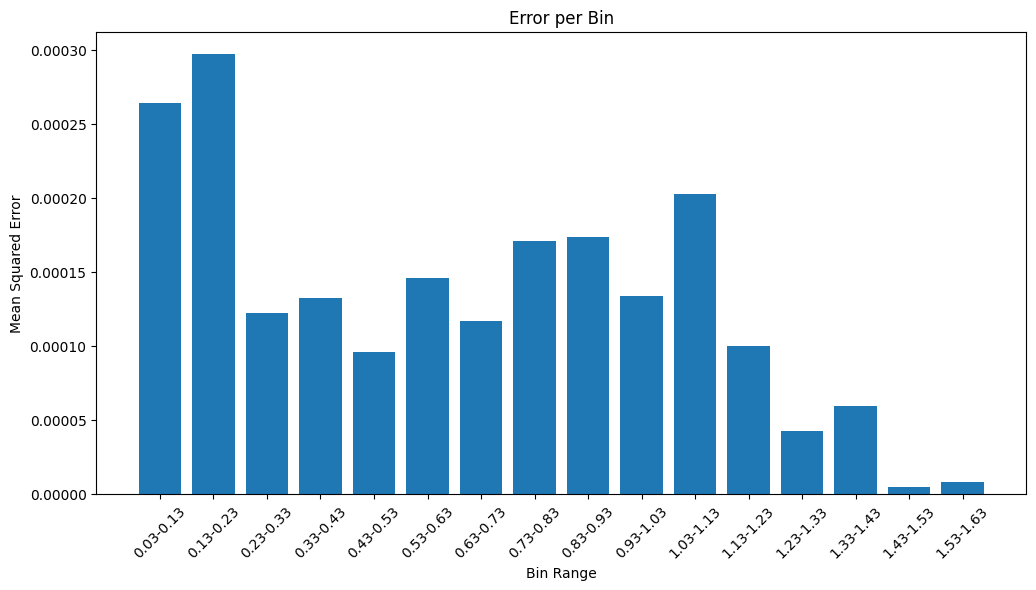

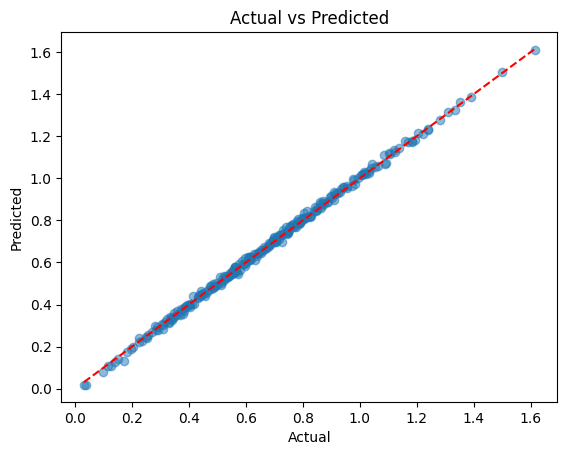

Sample with y = 0.85854257865816 belongs to bin 9 and has an error of 0.028989595929089784
Sample with y = 0.8055066327771186 belongs to bin 8 and has an error of 0.02902360155973438
Sample with y = 0.7267500966747414 belongs to bin 7 and has an error of 0.029170474406064684
Sample with y = 0.8137987476501906 belongs to bin 8 and has an error of 0.031764962085679804
Sample with y = 0.1717996834690074 belongs to bin 2 and has an error of 0.0393216549331645
alpha value 1.3
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 1s 11ms/step - loss: 0.2502 - regression_head_loss: 0.2502 - val_loss: 0.1527 - val_regression_head_loss: 0.1527
Epoch 2/400
47/47 [==============================] - 0s 7ms/step - loss: 0.1401 - regression_head_loss: 0.1401 - val_loss: 0.1318 - val_regression_head_loss: 0.1318
Epoch 3/400
47/47 [==============================] - 0s 7ms/step - loss: 0.1307 - regression_head_loss: 0.1307 - val_loss: 0.1255 - val_regr

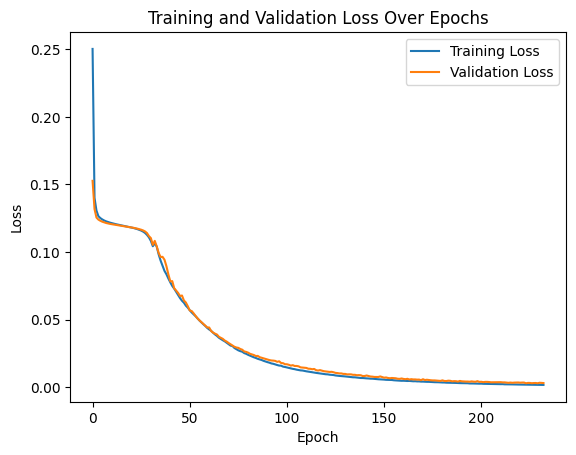

Epoch 1/224
63/63 [==============================] - 0s 6ms/step - loss: 0.0024 - regression_head_loss: 0.0024
Epoch 2/224
63/63 [==============================] - 0s 6ms/step - loss: 0.0023 - regression_head_loss: 0.0023
Epoch 3/224
63/63 [==============================] - 0s 5ms/step - loss: 0.0023 - regression_head_loss: 0.0023
Epoch 4/224
63/63 [==============================] - 0s 7ms/step - loss: 0.0022 - regression_head_loss: 0.0022
Epoch 5/224
63/63 [==============================] - 0s 8ms/step - loss: 0.0021 - regression_head_loss: 0.0021
Epoch 6/224
63/63 [==============================] - 1s 8ms/step - loss: 0.0021 - regression_head_loss: 0.0021
Epoch 7/224
63/63 [==============================] - 1s 9ms/step - loss: 0.0022 - regression_head_loss: 0.0022
Epoch 8/224
63/63 [==============================] - 1s 9ms/step - loss: 0.0020 - regression_head_loss: 0.0020
Epoch 9/224
63/63 [==============================] - 0s 7ms/step - loss: 0.0020 - regression_head_loss: 0.0020
E

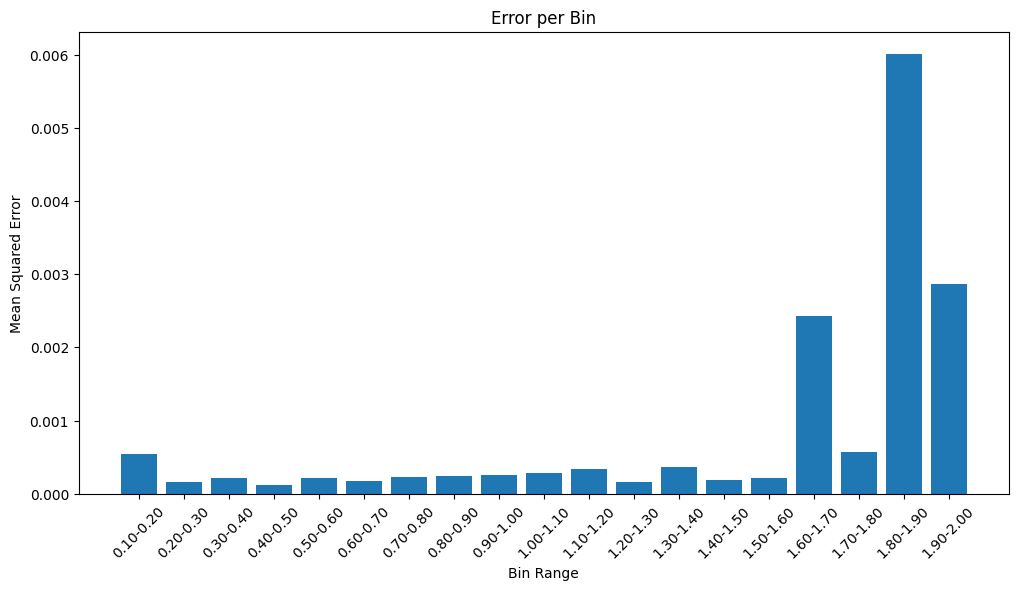

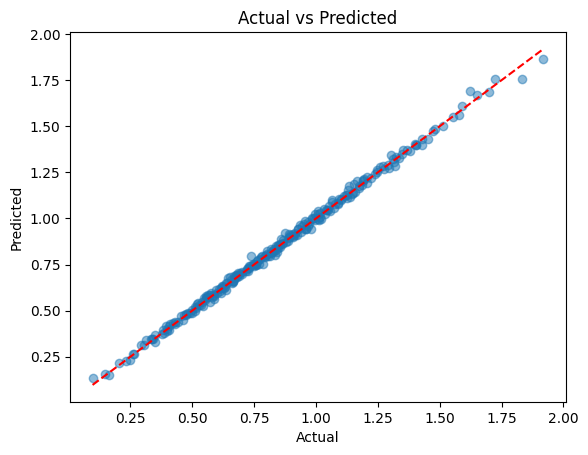

Sample with y = 0.8757523184194747 belongs to bin 8 and has an error of 0.04377258964632125
Sample with y = 1.9191077846453808 belongs to bin 19 and has an error of 0.05348013819915276
Sample with y = 0.7381544972574601 belongs to bin 7 and has an error of 0.055258188136827036
Sample with y = 1.623471983481842 belongs to bin 16 and has an error of 0.0671604790196838
Sample with y = 1.832645714871922 belongs to bin 18 and has an error of 0.07754319965127987
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 2s 26ms/step - loss: 2.0948 - regression_head_loss: 2.0948 - val_loss: 2.0849 - val_regression_head_loss: 2.0849
Epoch 2/400
47/47 [==============================] - 1s 23ms/step - loss: 2.0667 - regression_head_loss: 2.0667 - val_loss: 2.0567 - val_regression_head_loss: 2.0567
Epoch 3/400
47/47 [==============================] - 2s 33ms/step - loss: 2.0387 - regression_head_loss: 2.0387 - val_loss: 2.0289 - val_regression_head_l

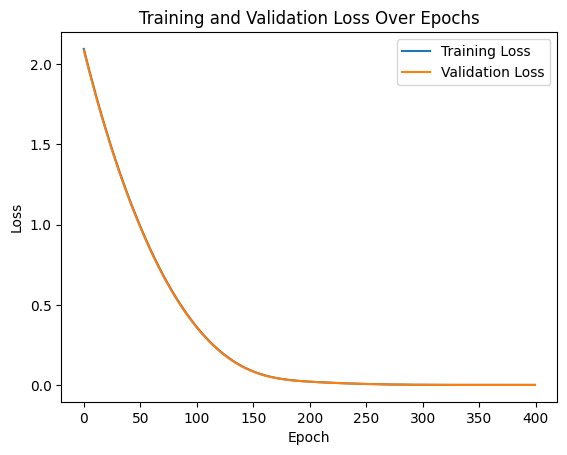

Epoch 1/400
63/63 [==============================] - 2s 35ms/step - loss: 7.3455e-04 - regression_head_loss: 7.3455e-04
Epoch 2/400
63/63 [==============================] - 2s 25ms/step - loss: 7.3287e-04 - regression_head_loss: 7.3287e-04
Epoch 3/400
63/63 [==============================] - 3s 50ms/step - loss: 7.3106e-04 - regression_head_loss: 7.3106e-04
Epoch 4/400
63/63 [==============================] - 2s 28ms/step - loss: 7.2937e-04 - regression_head_loss: 7.2937e-04
Epoch 5/400
63/63 [==============================] - 2s 39ms/step - loss: 7.2892e-04 - regression_head_loss: 7.2892e-04
Epoch 6/400
63/63 [==============================] - 4s 64ms/step - loss: 7.2978e-04 - regression_head_loss: 7.2978e-04
Epoch 7/400
63/63 [==============================] - 2s 24ms/step - loss: 7.2636e-04 - regression_head_loss: 7.2636e-04
Epoch 8/400
63/63 [==============================] - 1s 11ms/step - loss: 7.2608e-04 - regression_head_loss: 7.2608e-04
Epoch 9/400
63/63 [=====================

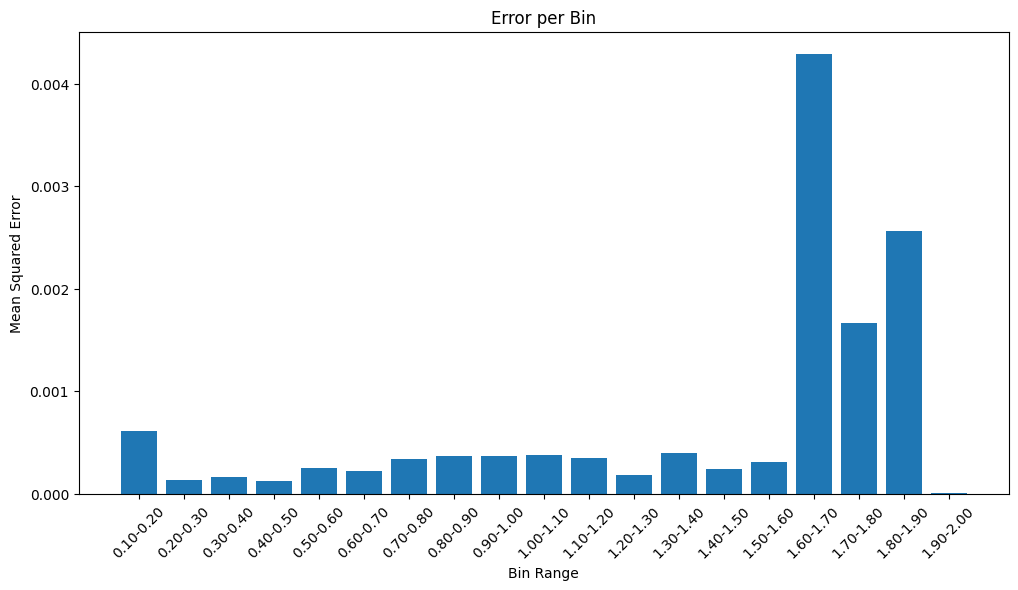

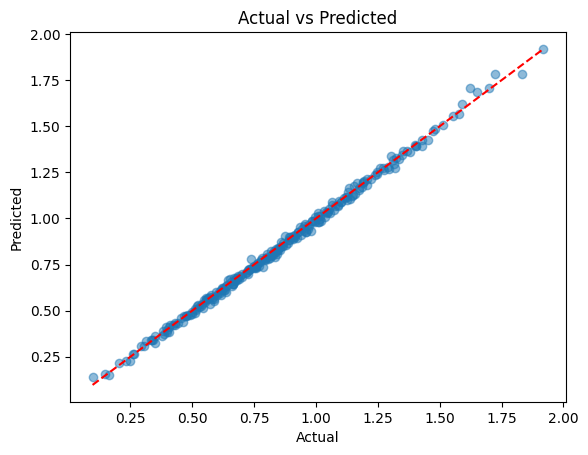

Sample with y = 0.7846028160256336 belongs to bin 7 and has an error of 0.047097797314543555
Sample with y = 0.9787174306219907 belongs to bin 9 and has an error of 0.04793845036686373
Sample with y = 1.832645714871922 belongs to bin 18 and has an error of 0.050577223889866296
Sample with y = 1.7241431057138898 belongs to bin 17 and has an error of 0.05760495069785332
Sample with y = 1.623471983481842 belongs to bin 16 and has an error of 0.08573531288961789
alpha value 1.4000000000000001
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 3s 44ms/step - loss: 1.0396 - regression_head_loss: 1.0396 - val_loss: 0.6896 - val_regression_head_loss: 0.6896
Epoch 2/400
47/47 [==============================] - 2s 41ms/step - loss: 0.6267 - regression_head_loss: 0.6267 - val_loss: 0.4920 - val_regression_head_loss: 0.4920
Epoch 3/400
47/47 [==============================] - 3s 71ms/step - loss: 0.4611 - regression_head_loss: 0.4611 - val_los

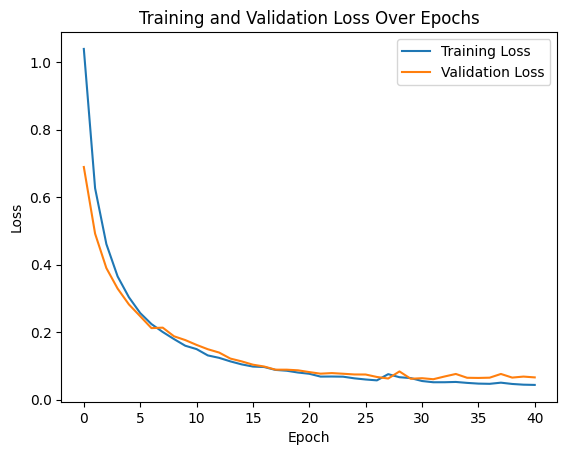

Epoch 1/32
63/63 [==============================] - 1s 18ms/step - loss: 0.0607 - regression_head_loss: 0.0607
Epoch 2/32
63/63 [==============================] - 2s 28ms/step - loss: 0.0692 - regression_head_loss: 0.0692
Epoch 3/32
63/63 [==============================] - 2s 24ms/step - loss: 0.0570 - regression_head_loss: 0.0570
Epoch 4/32
63/63 [==============================] - 2s 24ms/step - loss: 0.0527 - regression_head_loss: 0.0527
Epoch 5/32
63/63 [==============================] - 2s 24ms/step - loss: 0.0505 - regression_head_loss: 0.0505
Epoch 6/32
63/63 [==============================] - 2s 34ms/step - loss: 0.0593 - regression_head_loss: 0.0593
Epoch 7/32
63/63 [==============================] - 4s 66ms/step - loss: 0.0512 - regression_head_loss: 0.0512
Epoch 8/32
63/63 [==============================] - 4s 56ms/step - loss: 0.0546 - regression_head_loss: 0.0546
Epoch 9/32
63/63 [==============================] - 2s 32ms/step - loss: 0.0486 - regression_head_loss: 0.0486
E

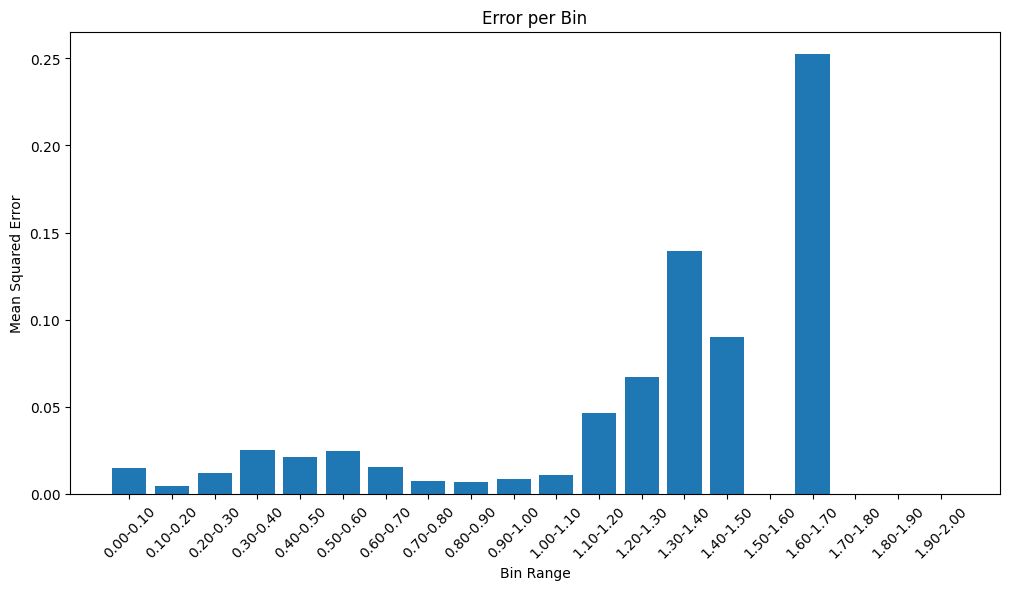

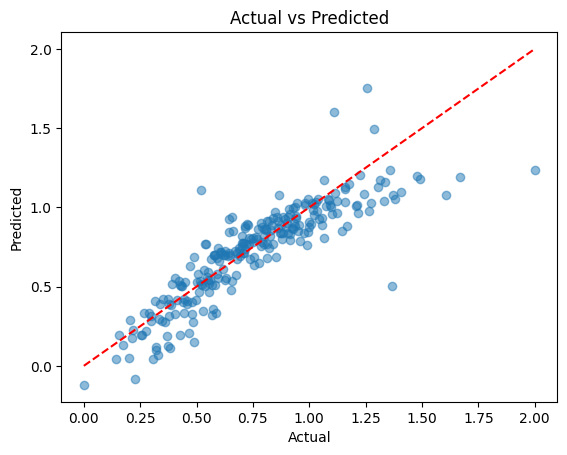

Sample with y = 1.2549263803807205 belongs to bin 13 and has an error of 0.5011755855235154
Sample with y = 1.6066195575703979 belongs to bin 17 and has an error of 0.528416237067163
Sample with y = 0.5204463929188226 belongs to bin 6 and has an error of 0.5891297131526496
Sample with y = 2.0 belongs to bin 21 and has an error of 0.7647385597229004
Sample with y = 1.3654234698817471 belongs to bin 14 and has an error of 0.8644082239672879
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 3s 36ms/step - loss: 0.8904 - regression_head_loss: 0.8904 - val_loss: 0.9050 - val_regression_head_loss: 0.9050
Epoch 2/400
47/47 [==============================] - 1s 18ms/step - loss: 0.8816 - regression_head_loss: 0.8816 - val_loss: 0.8964 - val_regression_head_loss: 0.8964
Epoch 3/400
47/47 [==============================] - 1s 20ms/step - loss: 0.8726 - regression_head_loss: 0.8726 - val_loss: 0.8879 - val_regression_head_loss: 0.8879
Epoch 

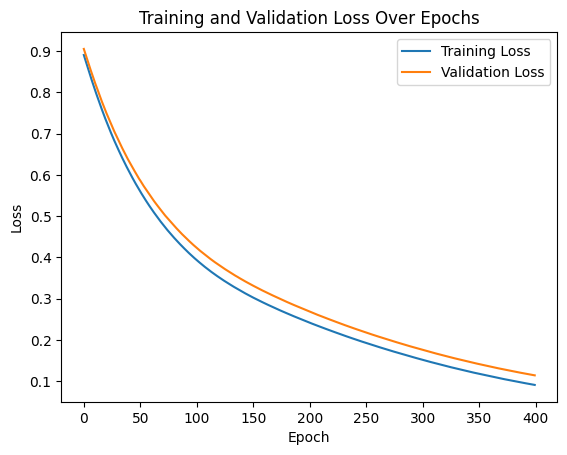

Epoch 1/400
63/63 [==============================] - 3s 42ms/step - loss: 0.0964 - regression_head_loss: 0.0964
Epoch 2/400
63/63 [==============================] - 3s 47ms/step - loss: 0.0958 - regression_head_loss: 0.0958
Epoch 3/400
63/63 [==============================] - 2s 30ms/step - loss: 0.0951 - regression_head_loss: 0.0951
Epoch 4/400
63/63 [==============================] - 2s 32ms/step - loss: 0.0945 - regression_head_loss: 0.0945
Epoch 5/400
63/63 [==============================] - 3s 55ms/step - loss: 0.0938 - regression_head_loss: 0.0938
Epoch 6/400
63/63 [==============================] - 2s 36ms/step - loss: 0.0932 - regression_head_loss: 0.0932
Epoch 7/400
63/63 [==============================] - 2s 32ms/step - loss: 0.0926 - regression_head_loss: 0.0926
Epoch 8/400
63/63 [==============================] - 2s 34ms/step - loss: 0.0920 - regression_head_loss: 0.0920
Epoch 9/400
63/63 [==============================] - 1s 23ms/step - loss: 0.0913 - regression_head_loss:

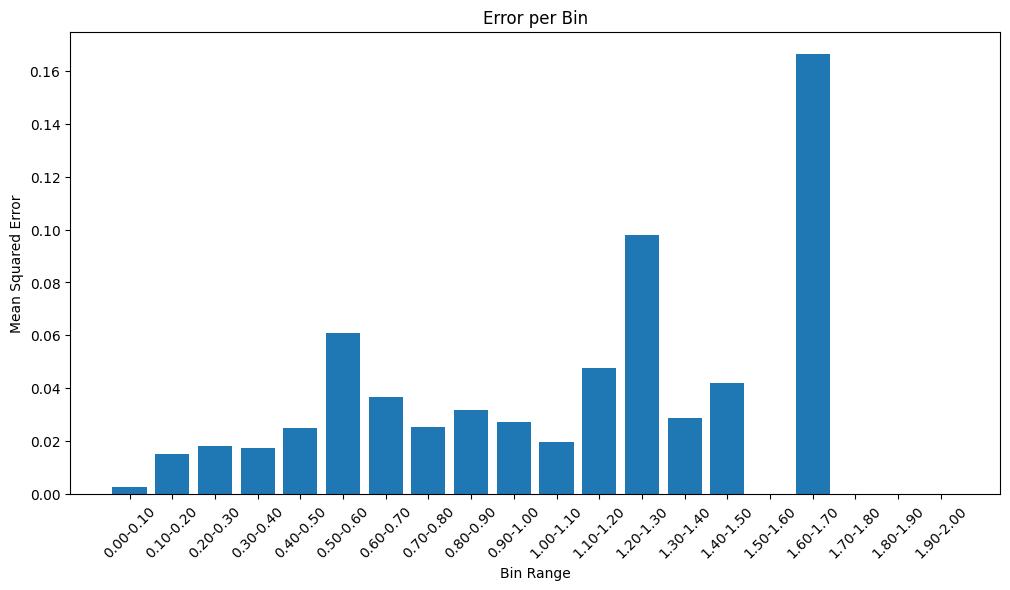

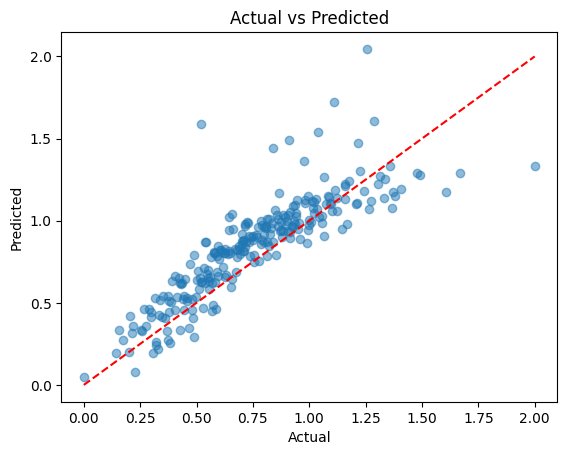

Sample with y = 0.8401986702724417 belongs to bin 9 and has an error of 0.6043563739017527
Sample with y = 1.1081319380860195 belongs to bin 12 and has an error of 0.6166532706160679
Sample with y = 2.0 belongs to bin 21 and has an error of 0.669177770614624
Sample with y = 1.2549263803807205 belongs to bin 13 and has an error of 0.7908223302516038
Sample with y = 0.5204463929188226 belongs to bin 6 and has an error of 1.0652928620326545
alpha value 1.5
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 2s 27ms/step - loss: 1.2289 - regression_head_loss: 1.2289 - val_loss: 0.8462 - val_regression_head_loss: 0.8462
Epoch 2/400
47/47 [==============================] - 0s 9ms/step - loss: 0.8236 - regression_head_loss: 0.8236 - val_loss: 0.5147 - val_regression_head_loss: 0.5147
Epoch 3/400
47/47 [==============================] - 0s 9ms/step - loss: 0.4965 - regression_head_loss: 0.4965 - val_loss: 0.2793 - val_regression_head_loss: 

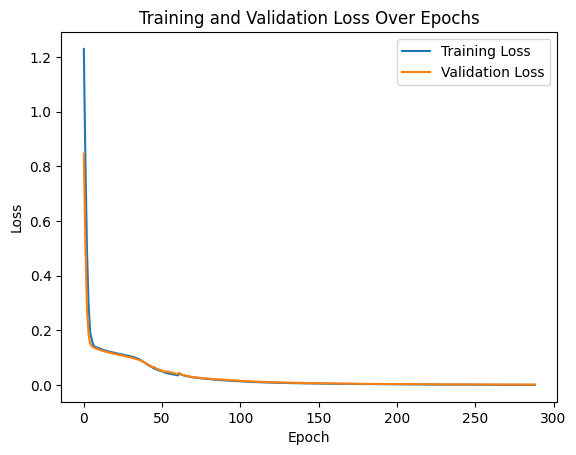

Epoch 1/280
63/63 [==============================] - 0s 7ms/step - loss: 0.0015 - regression_head_loss: 0.0015
Epoch 2/280
63/63 [==============================] - 0s 8ms/step - loss: 0.0014 - regression_head_loss: 0.0014
Epoch 3/280
63/63 [==============================] - 0s 7ms/step - loss: 0.0014 - regression_head_loss: 0.0014
Epoch 4/280
63/63 [==============================] - 0s 7ms/step - loss: 0.0014 - regression_head_loss: 0.0014
Epoch 5/280
63/63 [==============================] - 0s 7ms/step - loss: 0.0013 - regression_head_loss: 0.0013
Epoch 6/280
63/63 [==============================] - 0s 8ms/step - loss: 0.0013 - regression_head_loss: 0.0013
Epoch 7/280
63/63 [==============================] - 0s 7ms/step - loss: 0.0013 - regression_head_loss: 0.0013
Epoch 8/280
63/63 [==============================] - 0s 7ms/step - loss: 0.0013 - regression_head_loss: 0.0013
Epoch 9/280
63/63 [==============================] - 0s 7ms/step - loss: 0.0012 - regression_head_loss: 0.0012
E

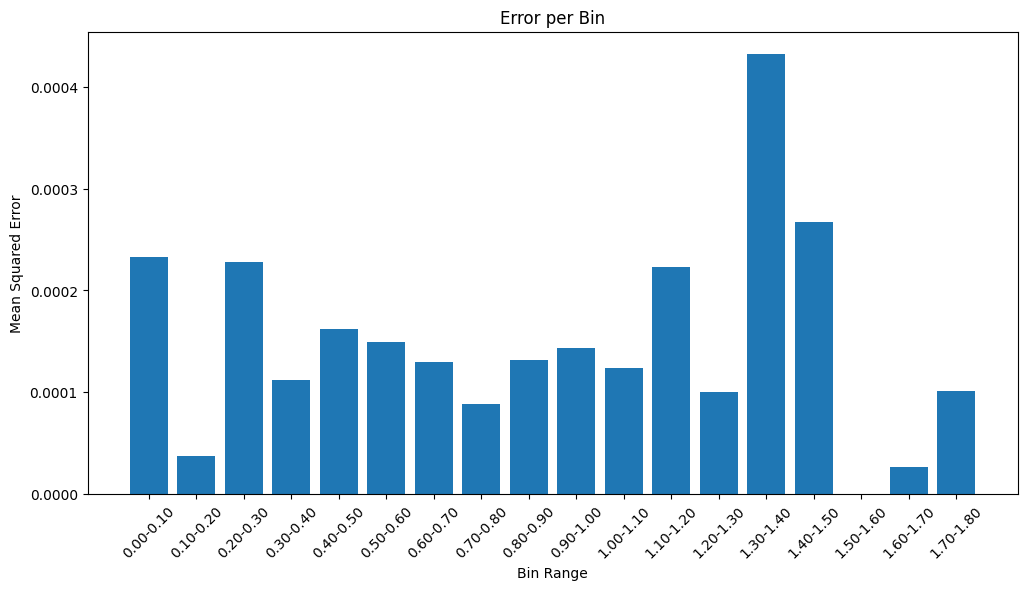

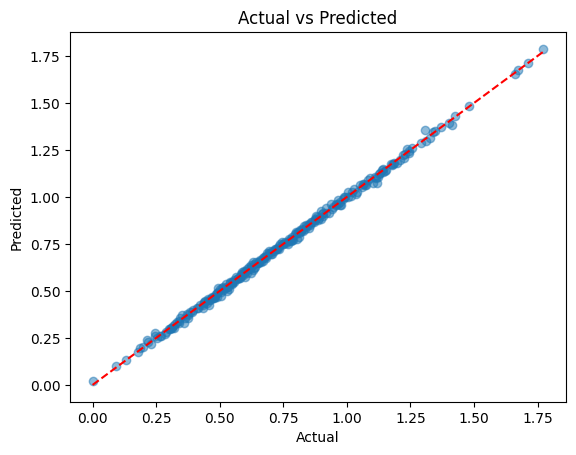

Sample with y = 0.45747812586512765 belongs to bin 5 and has an error of 0.03085090714183053
Sample with y = 1.411808928971346 belongs to bin 15 and has an error of 0.031017503266389967
Sample with y = 0.5066497994689332 belongs to bin 6 and has an error of 0.032207079055725174
Sample with y = 1.1191563594993734 belongs to bin 12 and has an error of 0.04307150728074549
Sample with y = 1.3083645944441722 belongs to bin 14 and has an error of 0.045008337036235524
Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 1s 14ms/step - loss: 0.3251 - regression_head_loss: 0.3251 - val_loss: 0.3088 - val_regression_head_loss: 0.3088
Epoch 2/400
47/47 [==============================] - 0s 8ms/step - loss: 0.3207 - regression_head_loss: 0.3207 - val_loss: 0.3044 - val_regression_head_loss: 0.3044
Epoch 3/400
47/47 [==============================] - 0s 8ms/step - loss: 0.3162 - regression_head_loss: 0.3162 - val_loss: 0.3002 - val_regression_hea

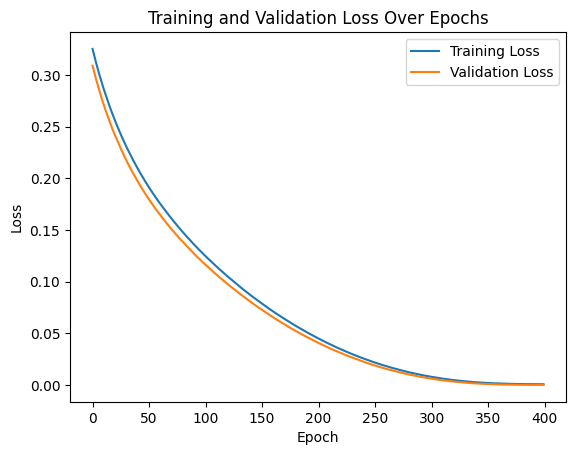

Epoch 1/400
63/63 [==============================] - 0s 7ms/step - loss: 6.9382e-04 - regression_head_loss: 6.9382e-04
Epoch 2/400
63/63 [==============================] - 0s 7ms/step - loss: 6.8932e-04 - regression_head_loss: 6.8932e-04
Epoch 3/400
63/63 [==============================] - 0s 6ms/step - loss: 6.8535e-04 - regression_head_loss: 6.8535e-04
Epoch 4/400
63/63 [==============================] - 0s 6ms/step - loss: 6.8173e-04 - regression_head_loss: 6.8173e-04
Epoch 5/400
63/63 [==============================] - 0s 6ms/step - loss: 6.7874e-04 - regression_head_loss: 6.7874e-04
Epoch 6/400
63/63 [==============================] - 0s 6ms/step - loss: 6.7566e-04 - regression_head_loss: 6.7566e-04
Epoch 7/400
63/63 [==============================] - 0s 6ms/step - loss: 6.7267e-04 - regression_head_loss: 6.7267e-04
Epoch 8/400
63/63 [==============================] - 0s 7ms/step - loss: 6.6814e-04 - regression_head_loss: 6.6814e-04
Epoch 9/400
63/63 [=============================

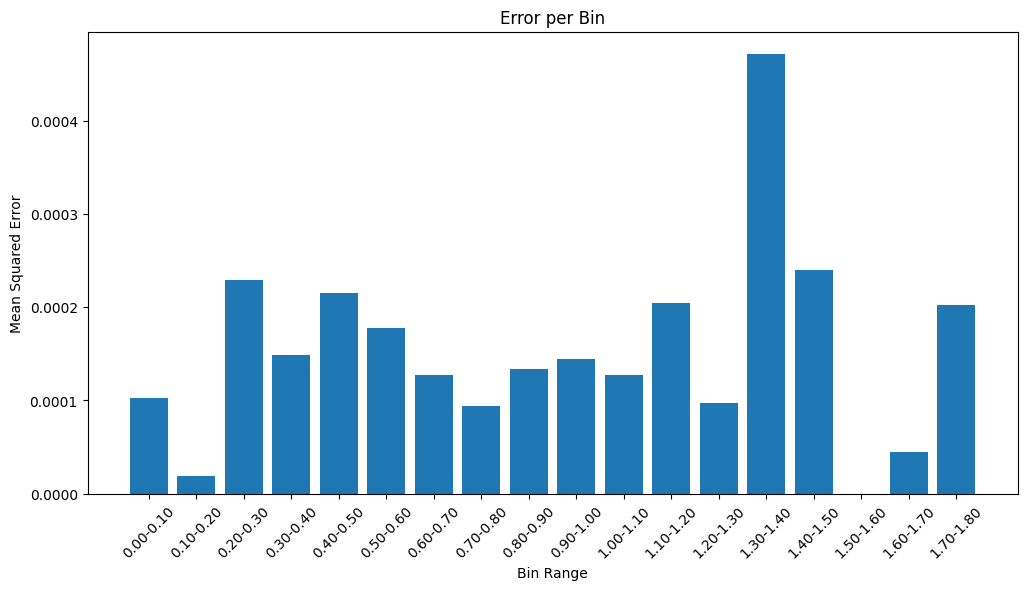

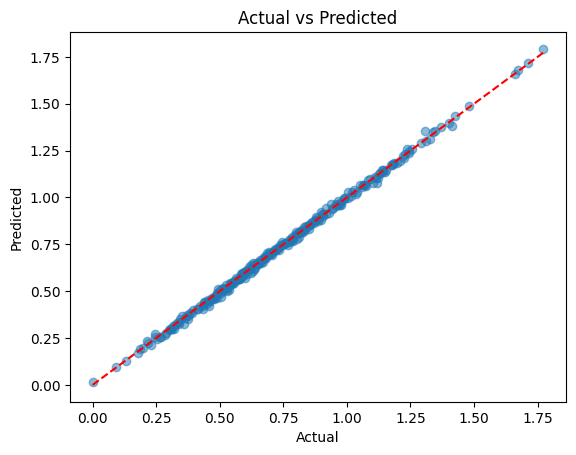

Sample with y = 0.35800230455383913 belongs to bin 4 and has an error of 0.030987917899938988
Sample with y = 0.45747812586512765 belongs to bin 5 and has an error of 0.03416927653041085
Sample with y = 0.5066497994689332 belongs to bin 6 and has an error of 0.03520608675759895
Sample with y = 1.1191563594993734 belongs to bin 12 and has an error of 0.04215121156541346
Sample with y = 1.3083645944441722 belongs to bin 14 and has an error of 0.047657286659343434
best alpha 0.2, best error 0.0001175150100607425


In [6]:
# search alpha from 0 to 1.5 at .1 increments 
best_error, best_alpha = np.inf, 0
for alpha in np.arange(0, 1.6, 0.1):
    print(f'alpha value {alpha}')
    res = trial_run(alpha)
    if res < best_error:
        best_error = res
        best_alpha = alpha
        
print(f'best alpha {best_alpha}, best error {best_error}')
    

(1000,)
min_val y in before norm:  0.30336393039835013
max_val y in before norm:  4.602297725798119
(1000,)
min_val y in before norm:  0.2292676773559074
max_val y in before norm:  4.752819850356652


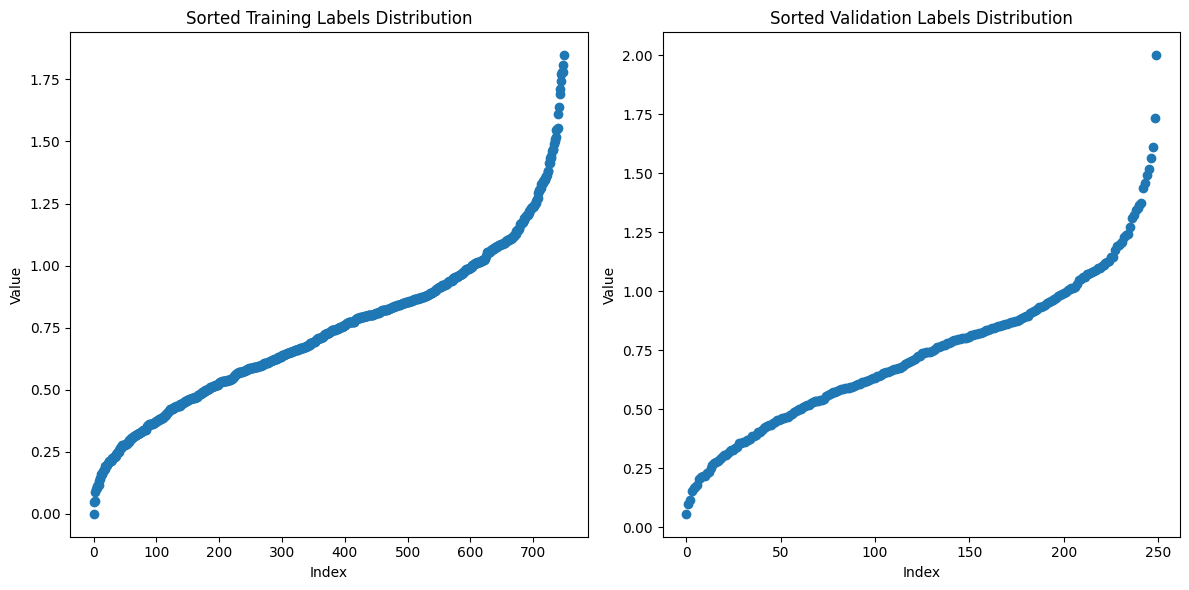

X_train:  [[-0.62246223  0.37896541  0.21532772 -2.16766725]
 [ 0.50407224 -1.44429391 -1.31738916  0.12623662]
 [-0.22978148  1.18858544  2.19576143  0.97595628]
 [-1.14883365  0.98882227 -0.71678588 -0.12967708]
 [-1.69861637 -0.93105842  0.02002657  1.48129898]
 [ 0.40211501  0.59275706 -0.50991036 -0.22049538]
 [ 0.44028985 -0.11207012 -0.1546883   0.28030167]
 [-0.37405381 -0.83444779  1.29430155 -1.35414339]
 [ 1.67955003  2.03392997  0.36869044  0.23041094]
 [-0.53239869  0.13008385  1.52273453 -1.05225906]
 [-2.58664602 -0.01454441 -0.37231966 -1.26076598]
 [ 1.38762586  1.3406884  -0.05532299 -0.61273053]]
Validation X: [[-0.89592699  3.11393197 -0.65646787  3.20170842]
 [ 0.66104885  2.40149081  1.95706127 -2.48936725]
 [-2.10163958 -2.47100594  1.90285098  0.12385374]
 [ 2.02124241 -0.60490302  2.90250703 -0.75928997]
 [-2.82907244  1.91014557  0.23055476 -1.01569873]
 [ 1.67124521  2.53629347 -0.51551679 -1.69204259]
 [-0.52082416  1.60424746  2.99078118 -0.18376957]
 [-1.3

In [3]:
# Generate synthetic data
n_train = 1000
n_test = 1000
loader = dg(n_train, n_test)
print(loader.min_y, loader.max_y)

Model Building

In [5]:
# NN for representation learning:
# 4 input nodes
# 1 or more hidden layers
# the last hidden layer has 2 nodes (representation layer Z)
# plot the instances in the 2D feature/representation space of Z 
# use different colors for different target values (can be in groups, each group with a different color) similar to the RankSim pictures
# training and test sets in different plots.
# expecting the instances to be in a semi-circle
# for prediction, add output layer of 1 node.

mb = mb()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 64)                320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 32)                0     

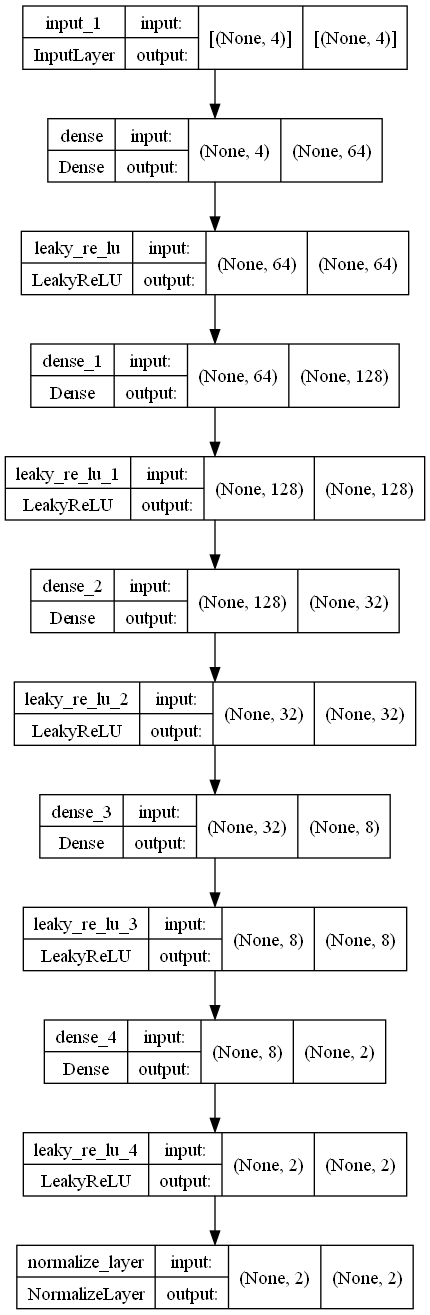

In [6]:
# Create and train the model
hiddens = [64, 32, 8]
model = mb.create_model_feat(4, 2, hiddens)
# summarize and plot the model
model.summary()

Test of First Idea improving on ranksim

In [7]:
eva = ev()

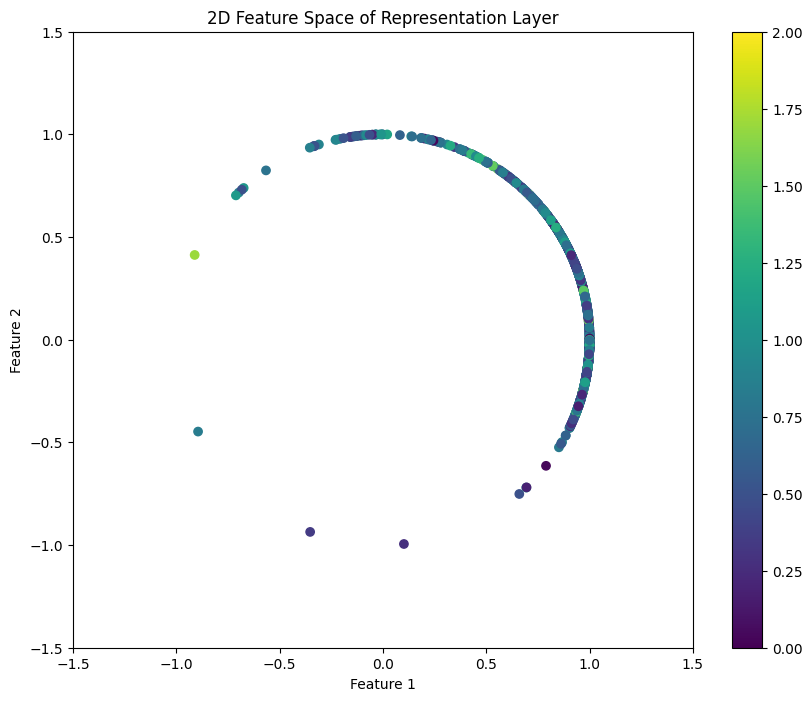

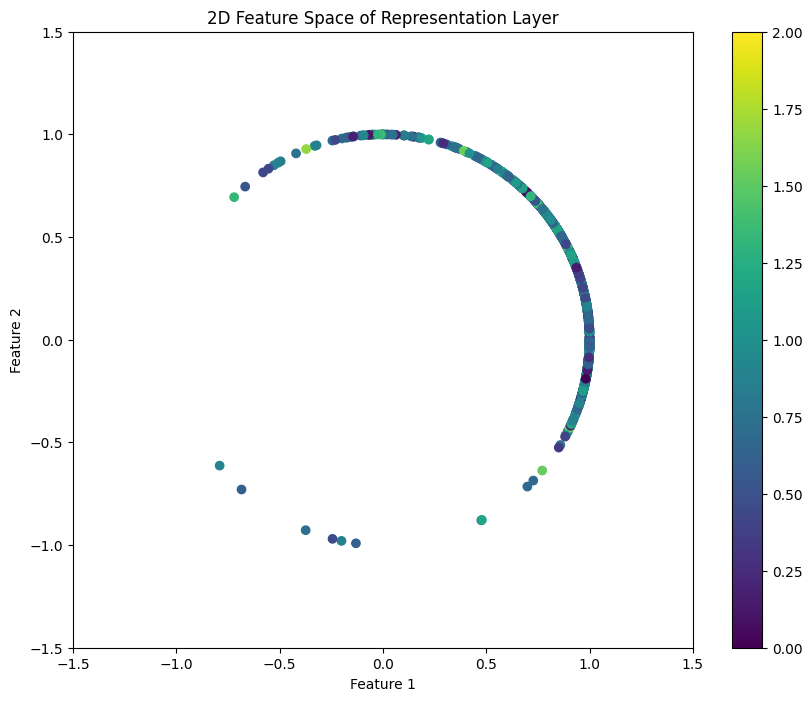

In [8]:
# Plot the 2D feature space
eva.plot_feature_space(model, loader.X_train, loader.y_train)
eva.plot_feature_space(model, loader.X_test, loader.y_test)

Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
44/44 [==============================] - 9s 183ms/step - loss: 0.1893 - val_loss: 0.1390
Epoch 2/400
44/44 [==============================] - 8s 177ms/step - loss: 0.1217 - val_loss: 0.1353
Epoch 3/400
44/44 [==============================] - 8s 173ms/step - loss: 0.1141 - val_loss: 0.1359
Epoch 4/400
44/44 [==============================] - 8s 174ms/step - loss: 0.1203 - val_loss: 0.1350
Epoch 5/400
44/44 [==============================] - 8s 171ms/step - loss: 0.1226 - val_loss: 0.1286
Epoch 6/400
44/44 [==============================] - 7s 163ms/step - loss: 0.1072 - val_loss: 0.1052
Epoch 7/400
44/44 [==============================] - 7s 170ms/step - loss: 0.0743 - val_loss: 0.0516
Epoch 8/400
44/44 [==============================] - 8s 174ms/step - loss: 0.0455 - val_loss: 0.0291
Epoch 9/400
44/44 [==============================] - 7s 163ms/step - loss: 0.0223 - val_loss: 0.0292
Epoch 10/400
44/44 [==================

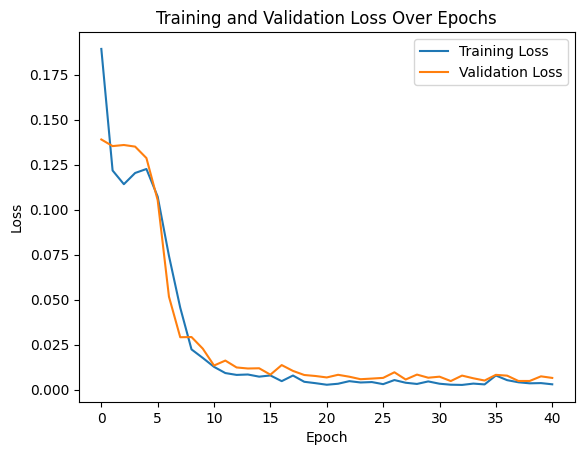

Epoch 1/32
63/63 [==============================] - 11s 149ms/step - loss: 0.0093
Epoch 2/32
63/63 [==============================] - 9s 147ms/step - loss: 0.0078
Epoch 3/32
63/63 [==============================] - 9s 149ms/step - loss: 0.0063
Epoch 4/32
63/63 [==============================] - 9s 147ms/step - loss: 0.0049
Epoch 5/32
63/63 [==============================] - 9s 149ms/step - loss: 0.0061
Epoch 6/32
63/63 [==============================] - 10s 151ms/step - loss: 0.0034
Epoch 7/32
63/63 [==============================] - 9s 151ms/step - loss: 0.0066
Epoch 8/32
63/63 [==============================] - 9s 147ms/step - loss: 0.0051
Epoch 9/32
63/63 [==============================] - 9s 148ms/step - loss: 0.0041
Epoch 10/32
63/63 [==============================] - 9s 151ms/step - loss: 0.0031
Epoch 11/32
63/63 [==============================] - 9s 150ms/step - loss: 0.0021
Epoch 12/32
63/63 [==============================] - 10s 153ms/step - loss: 0.0022
Epoch 13/32
63/63 [===

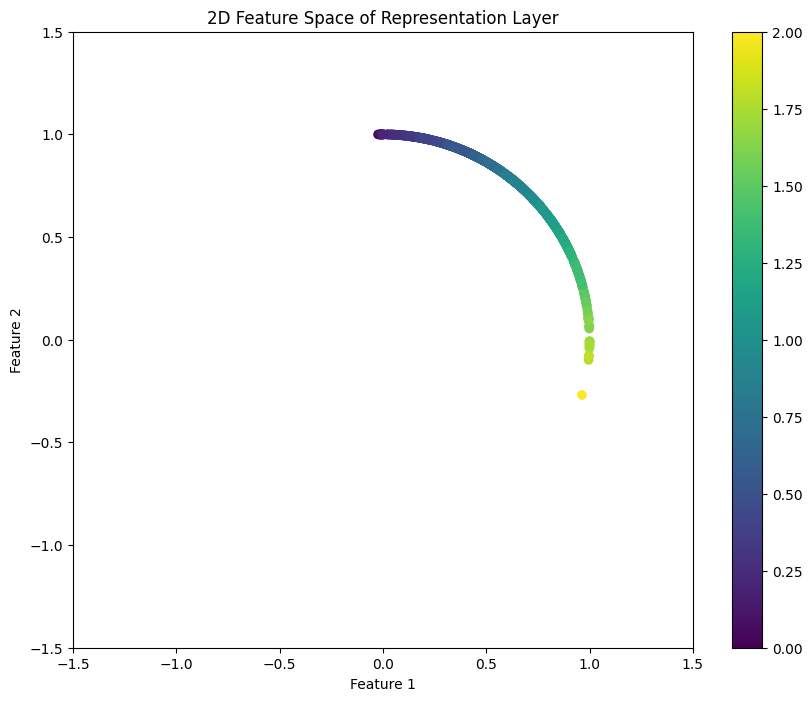

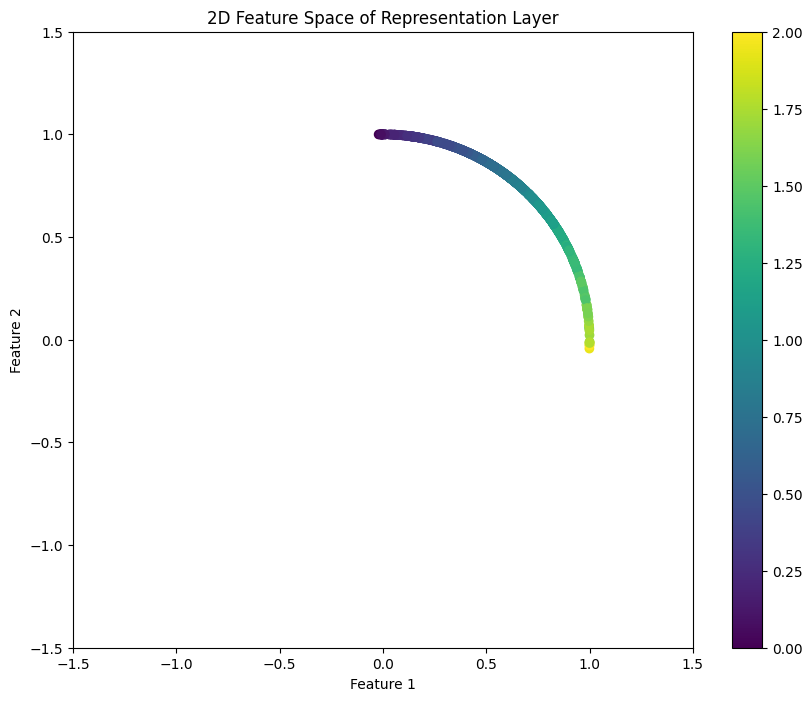

In [8]:
history = mb.train_features(model, loader.X_train, loader.y_train, learning_rate=1e-3, epochs=400, batch_size=16)

# plot_feature_space(model, X_train, y_train)
# Plot the 2D feature space
eva.plot_feature_space(model, loader.X_train, loader.y_train)
eva.plot_feature_space(model, loader.X_test, loader.y_test)


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 64)                320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 32)                0   

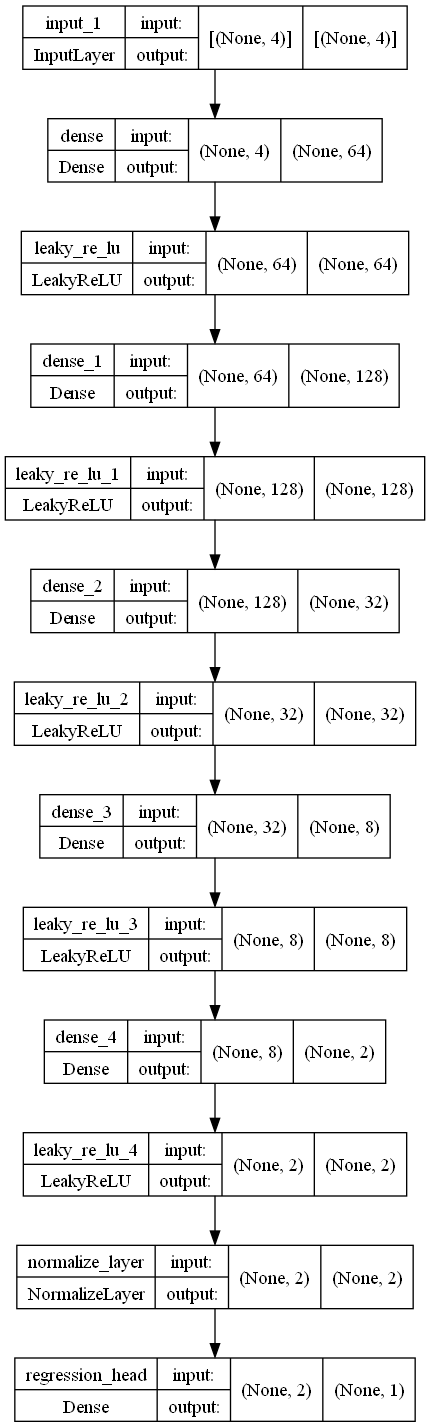

In [8]:
# add regression head
extended_model = mb.add_regression_head(model)
# summarize and plot the model
extended_model.summary()
# tf.keras.utils.plot_model(extended_model, show_shapes=True)

Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
44/44 [==============================] - 2s 20ms/step - loss: 0.4602 - regression_head_loss: 0.4602 - regression_head_mse: 0.4884 - val_loss: 0.3065 - val_regression_head_loss: 0.3065 - val_regression_head_mse: 0.3115
Epoch 2/400
44/44 [==============================] - 1s 12ms/step - loss: 0.2095 - regression_head_loss: 0.2095 - regression_head_mse: 0.2062 - val_loss: 0.1420 - val_regression_head_loss: 0.1420 - val_regression_head_mse: 0.1251
Epoch 3/400
44/44 [==============================] - 1s 20ms/step - loss: 0.1007 - regression_head_loss: 0.1007 - regression_head_mse: 0.0839 - val_loss: 0.0773 - val_regression_head_loss: 0.0773 - val_regression_head_mse: 0.0550
Epoch 4/400
44/44 [==============================] - 1s 12ms/step - loss: 0.0561 - regression_head_loss: 0.0561 - regression_head_mse: 0.0377 - val_loss: 0.0469 - val_regression_head_loss: 0.0469 - val_regression_head_mse: 0.0268
Epoch 5/400
44/44 [========

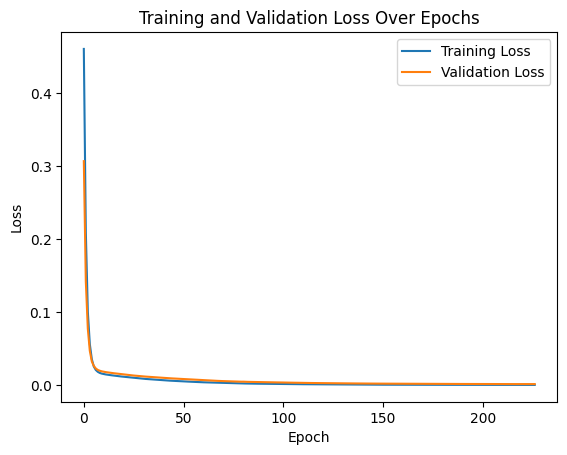

Epoch 1/218
63/63 [==============================] - 1s 7ms/step - loss: 5.6956e-04 - regression_head_loss: 5.6956e-04 - regression_head_mse: 2.4546e-04
Epoch 2/218
63/63 [==============================] - 0s 6ms/step - loss: 5.0512e-04 - regression_head_loss: 5.0512e-04 - regression_head_mse: 2.1539e-04
Epoch 3/218
63/63 [==============================] - 0s 5ms/step - loss: 4.5672e-04 - regression_head_loss: 4.5672e-04 - regression_head_mse: 1.9911e-04
Epoch 4/218
63/63 [==============================] - 0s 6ms/step - loss: 4.4014e-04 - regression_head_loss: 4.4014e-04 - regression_head_mse: 1.9679e-04
Epoch 5/218
63/63 [==============================] - 0s 5ms/step - loss: 4.2861e-04 - regression_head_loss: 4.2861e-04 - regression_head_mse: 2.0386e-04
Epoch 6/218
63/63 [==============================] - 0s 5ms/step - loss: 3.9701e-04 - regression_head_loss: 3.9701e-04 - regression_head_mse: 1.8616e-04
Epoch 7/218
63/63 [==============================] - 0s 5ms/step - loss: 3.7646e-0

In [9]:
# train now with the regression stage with balanced loss
history = mb.train_regression(extended_model, loader.X_train, loader.y_train, loader.reweights, learning_rate=1e-4,
                              epochs=400, batch_size=16)

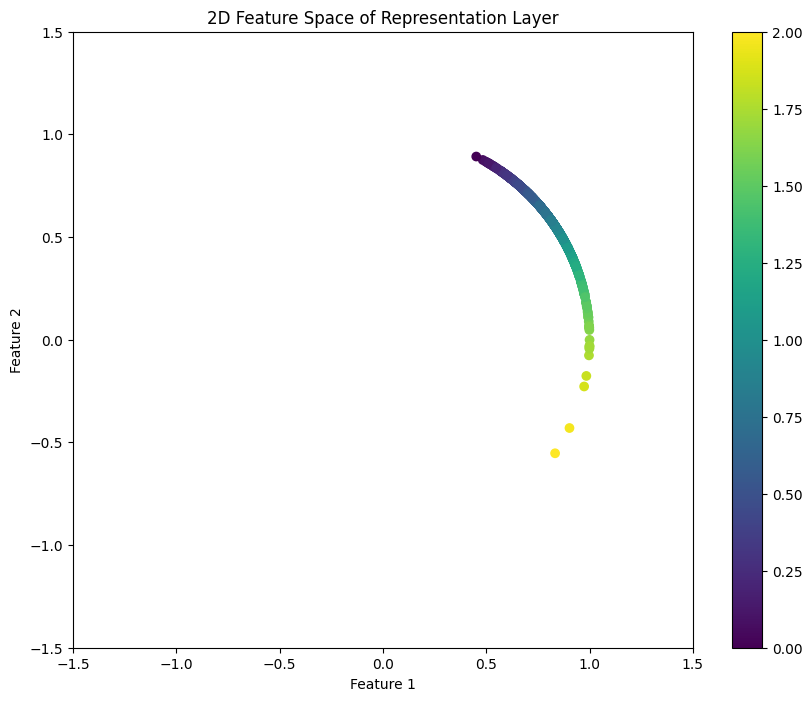

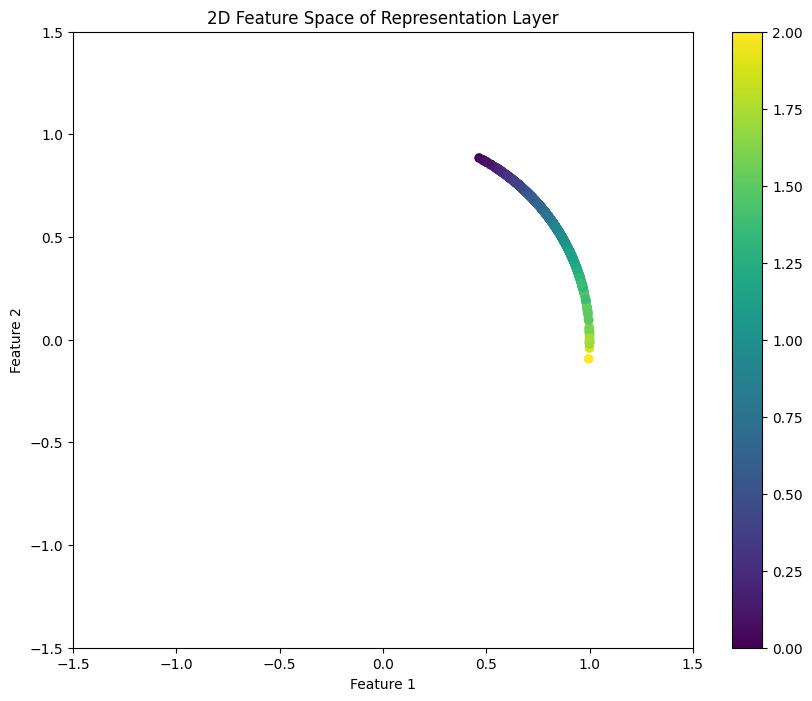

In [10]:
# plot_feature_space(model, X_train, y_train)
# Plot the 2D feature space
eva.plot_feature_space(extended_model, loader.X_train, loader.y_train, withhead=True)
eva.plot_feature_space(extended_model, loader.X_test, loader.y_test, withhead=True)

In [ ]:
eva.evaluate(extended_model, loader.X_train, loader.y_train)

Mean Squared Error: 0.0004578082007355988
Root Mean Squared Error: 0.02139645256102085


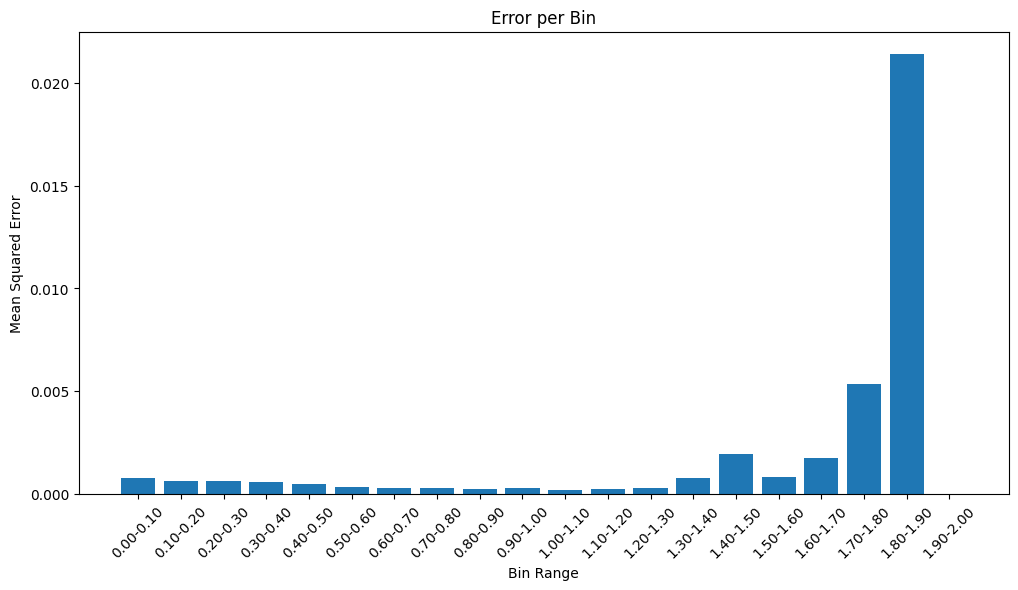

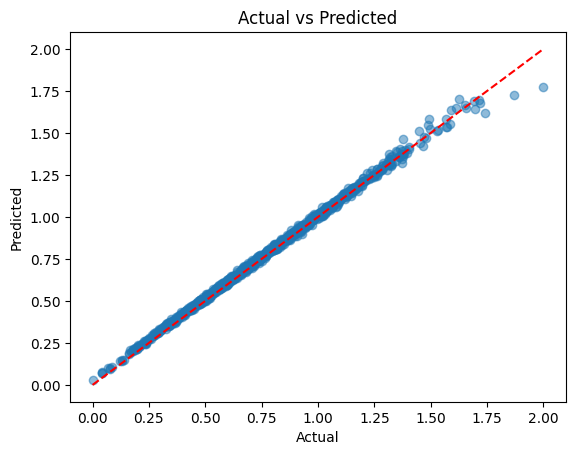

Sample with y = 1.3781939245040011 belongs to bin 14 and has an error of 0.08386259309701205
Sample with y = 1.4914006289943011 belongs to bin 15 and has an error of 0.09252247243086975
Sample with y = 1.739975615093097 belongs to bin 18 and has an error of 0.1185918288916199
Sample with y = 1.870703853135541 belongs to bin 19 and has an error of 0.14640132284684482
Sample with y = 2.0 belongs to bin 21 and has an error of 0.22859013080596924


0.0004578082

In [11]:
eva.evaluate(extended_model, loader.X_test, loader.y_test)

rRT

Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 3s 43ms/step - loss: 0.3454 - regression_head_loss: 0.3454 - val_loss: 0.2128 - val_regression_head_loss: 0.2128
Epoch 2/400
47/47 [==============================] - 2s 44ms/step - loss: 0.1803 - regression_head_loss: 0.1803 - val_loss: 0.1548 - val_regression_head_loss: 0.1548
Epoch 3/400
47/47 [==============================] - 1s 23ms/step - loss: 0.1385 - regression_head_loss: 0.1385 - val_loss: 0.1363 - val_regression_head_loss: 0.1363
Epoch 4/400
47/47 [==============================] - 2s 42ms/step - loss: 0.1221 - regression_head_loss: 0.1221 - val_loss: 0.1275 - val_regression_head_loss: 0.1275
Epoch 5/400
47/47 [==============================] - 3s 59ms/step - loss: 0.1141 - regression_head_loss: 0.1141 - val_loss: 0.1227 - val_regression_head_loss: 0.1227
Epoch 6/400
47/47 [==============================] - 1s 18ms/step - loss: 0.1096 - regression_head_loss: 0.1096 - val

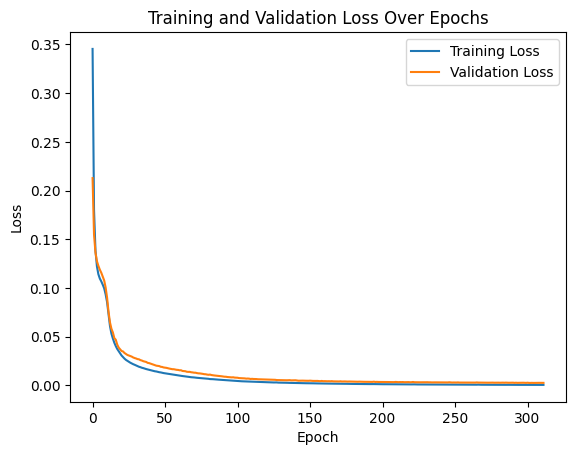

Epoch 1/303
63/63 [==============================] - 0s 6ms/step - loss: 0.0013 - regression_head_loss: 0.0013
Epoch 2/303
63/63 [==============================] - 0s 5ms/step - loss: 9.6194e-04 - regression_head_loss: 9.6194e-04
Epoch 3/303
63/63 [==============================] - 0s 6ms/step - loss: 0.0010 - regression_head_loss: 0.0010
Epoch 4/303
63/63 [==============================] - 0s 5ms/step - loss: 9.9483e-04 - regression_head_loss: 9.9483e-04
Epoch 5/303
63/63 [==============================] - 0s 5ms/step - loss: 9.1723e-04 - regression_head_loss: 9.1723e-04
Epoch 6/303
63/63 [==============================] - 0s 5ms/step - loss: 8.3916e-04 - regression_head_loss: 8.3916e-04
Epoch 7/303
63/63 [==============================] - 0s 6ms/step - loss: 8.1538e-04 - regression_head_loss: 8.1538e-04
Epoch 8/303
63/63 [==============================] - 0s 5ms/step - loss: 7.9417e-04 - regression_head_loss: 7.9417e-04
Epoch 9/303
63/63 [==============================] - 0s 5ms/step

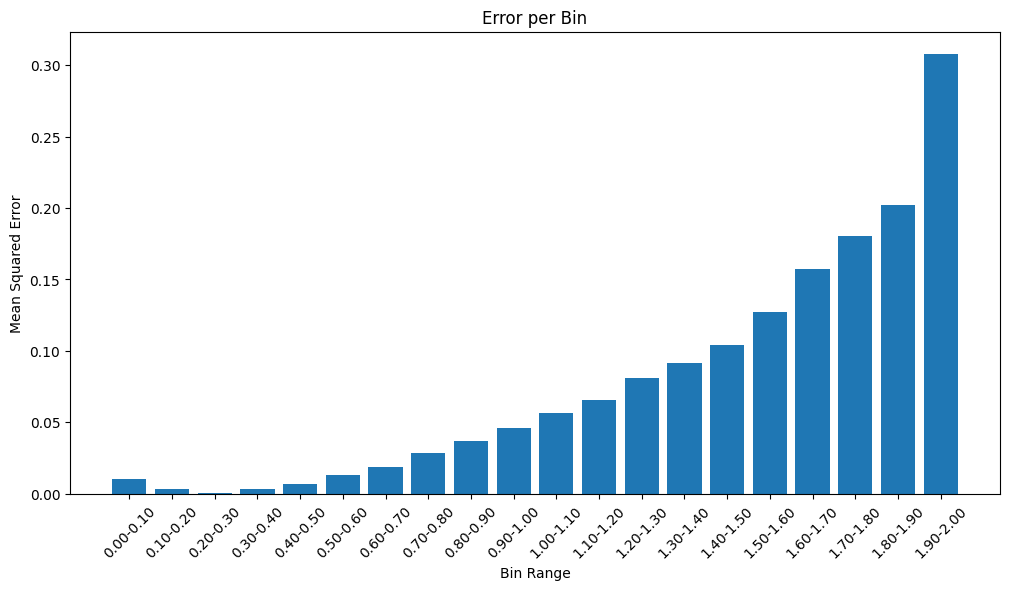

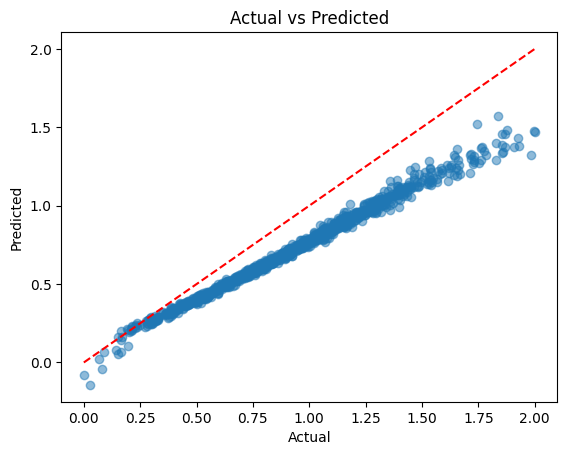

Sample with y = 2.0 belongs to bin 21 and has an error of 0.5327298641204834
Sample with y = 1.908139333330971 belongs to bin 20 and has an error of 0.5351519437664569
Sample with y = 1.8301423372701244 belongs to bin 19 and has an error of 0.5364914717153149
Sample with y = 1.9302030447765026 belongs to bin 20 and has an error of 0.5491575840755138
Sample with y = 1.9827730391268257 belongs to bin 20 and has an error of 0.6569599840883735


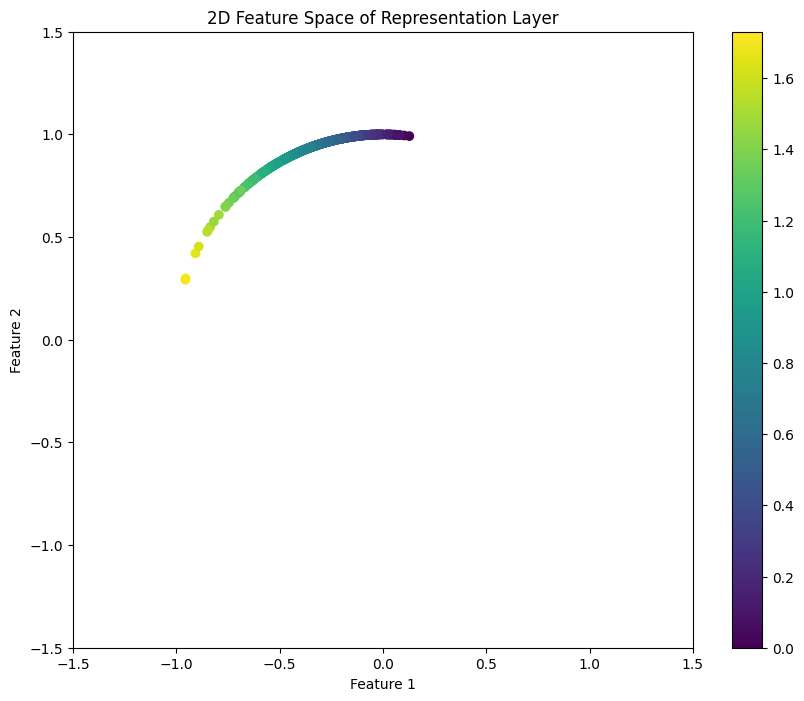

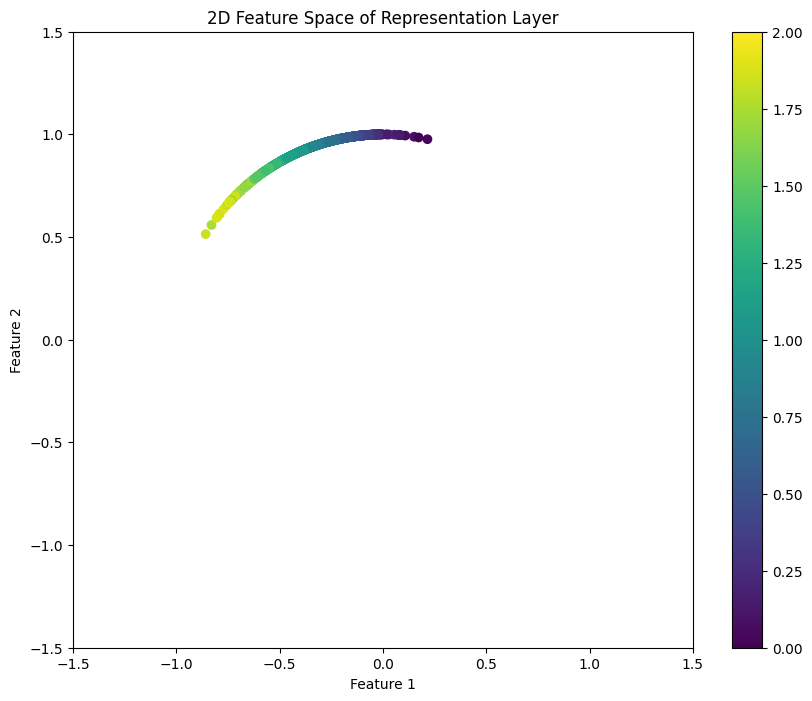

Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
47/47 [==============================] - 1s 11ms/step - loss: 3.5711 - regression_head_loss: 3.5711 - val_loss: 3.5475 - val_regression_head_loss: 3.5475
Epoch 2/400
47/47 [==============================] - 0s 6ms/step - loss: 3.5329 - regression_head_loss: 3.5329 - val_loss: 3.5090 - val_regression_head_loss: 3.5090
Epoch 3/400
47/47 [==============================] - 0s 6ms/step - loss: 3.4946 - regression_head_loss: 3.4946 - val_loss: 3.4714 - val_regression_head_loss: 3.4714
Epoch 4/400
47/47 [==============================] - 0s 7ms/step - loss: 3.4568 - regression_head_loss: 3.4568 - val_loss: 3.4338 - val_regression_head_loss: 3.4338
Epoch 5/400
47/47 [==============================] - 0s 7ms/step - loss: 3.4192 - regression_head_loss: 3.4192 - val_loss: 3.3965 - val_regression_head_loss: 3.3965
Epoch 6/400
47/47 [==============================] - 0s 7ms/step - loss: 3.3819 - regression_head_loss: 3.3819 - val_loss

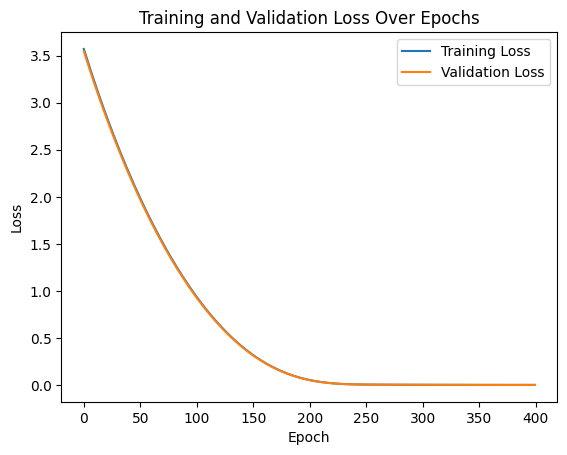

Epoch 1/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0011 - regression_head_loss: 0.0011
Epoch 2/400
63/63 [==============================] - 0s 6ms/step - loss: 0.0011 - regression_head_loss: 0.0011
Epoch 3/400
63/63 [==============================] - 0s 6ms/step - loss: 0.0011 - regression_head_loss: 0.0011
Epoch 4/400
63/63 [==============================] - 0s 6ms/step - loss: 0.0011 - regression_head_loss: 0.0011
Epoch 5/400
63/63 [==============================] - 0s 6ms/step - loss: 0.0011 - regression_head_loss: 0.0011
Epoch 6/400
63/63 [==============================] - 0s 6ms/step - loss: 0.0011 - regression_head_loss: 0.0011
Epoch 7/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0011 - regression_head_loss: 0.0011
Epoch 8/400
63/63 [==============================] - 0s 5ms/step - loss: 0.0011 - regression_head_loss: 0.0011
Epoch 9/400
63/63 [==============================] - 0s 6ms/step - loss: 0.0011 - regression_head_loss: 0.0011
E

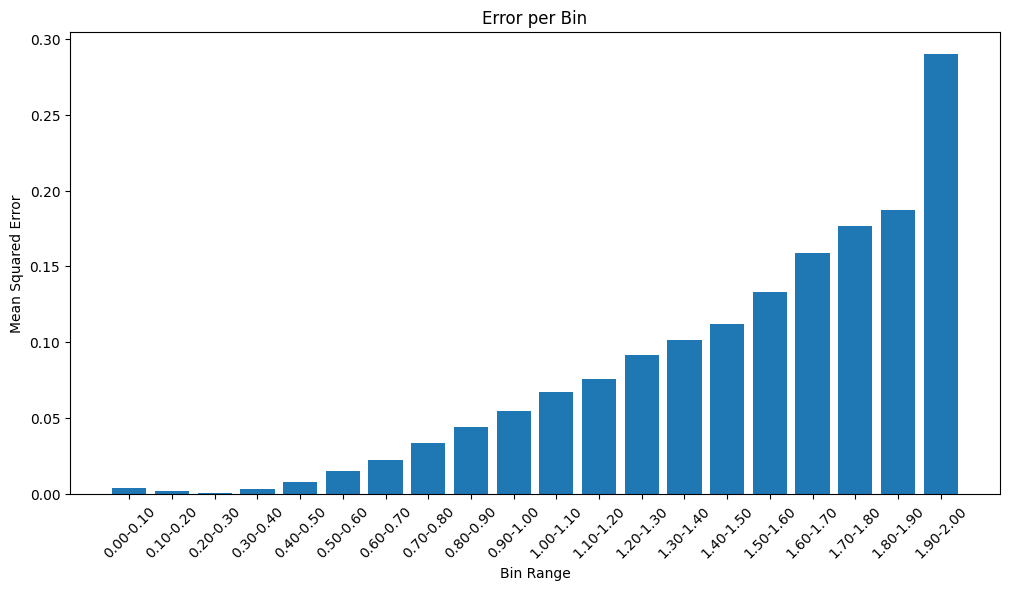

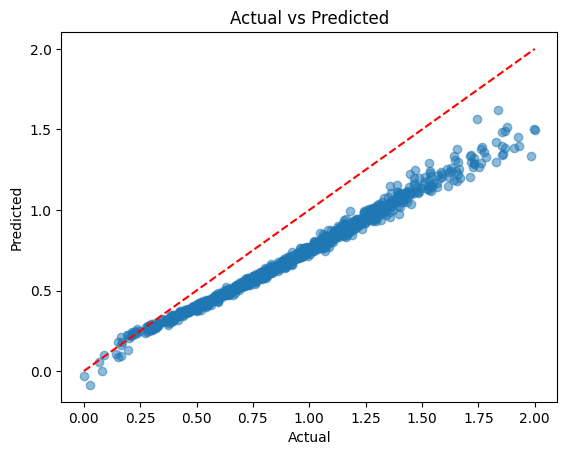

Sample with y = 1.8548077159266925 belongs to bin 19 and has an error of 0.513717632804439
Sample with y = 1.908139333330971 belongs to bin 20 and has an error of 0.5222030731075824
Sample with y = 1.8301423372701244 belongs to bin 19 and has an error of 0.5336833776906567
Sample with y = 1.9302030447765026 belongs to bin 20 and has an error of 0.5350385550304089
Sample with y = 1.9827730391268257 belongs to bin 20 and has an error of 0.65032932498498


In [4]:
# Generate synthetic data
n_train = 1000
n_test = 1000
loader = dg(n_train, n_test)

mb = mbuilder()

eva = ev()
# Create and train the model
hiddens = [64, 32, 8]
model = mb.create_model_feat(4, 2, hiddens)
# summarize and plot the model
# model.summary()
# plot_feature_space(model, X_train, y_train)
# Plot the 2D feature space
# eva.plot_feature_space(model, loader.X_train, loader.y_train)
# eva.plot_feature_space(model, loader.X_test, loader.y_test)
# add regression head
extended_model = mb.add_regression_head(model)
# train now with the regression stage with balanced loss
history = mb.train_regression(
    extended_model, 
    loader.X_train, 
    loader.y_train, 
    loader.X_val,
    loader.y_val,
    learning_rate=1e-4,
    epochs=400, batch_size=16)
# get the val mse
val_mse = eva.evaluate(extended_model, loader.X_test, loader.y_test)
# plots the feature space 
# Plot the 2D feature space
eva.plot_feature_space(extended_model, loader.X_train, loader.y_train, withhead=True)
eva.plot_feature_space(extended_model, loader.X_test, loader.y_test, withhead=True)
# reset regression head
base_model = mb.reset_regression_head(extended_model)
# add new regression head
extended_model2 = mb.add_regression_head(base_model)
# freeze the features
mb.freeze_features(extended_model2)
# train the new head with balanced loss
history = mb.train_regression(
    extended_model2, 
    loader.X_train, 
    loader.y_train, 
    loader.X_val,
    loader.y_val,
    loader.reweights, 
    loader.val_reweights,
    learning_rate=1e-4,
    epochs=400, batch_size=16)
# get the val mse
val_mse = eva.evaluate(extended_model2, loader.X_test, loader.y_test)

rRT + AE

In [ ]:
# Generate synthetic data
n_train = 1000
n_test = 1000
loader = dg(n_train, n_test)

mb = mbuilder()

eva = ev()
# Create and train the model
hiddens = [64, 32, 8]
model = mb.create_model_feat(4, 2, hiddens)
# summarize and plot the model
# model.summary()
# plot_feature_space(model, X_train, y_train)
# Plot the 2D feature space
# eva.plot_feature_space(model, loader.X_train, loader.y_train)
# eva.plot_feature_space(model, loader.X_test, loader.y_test)
# add regression head
extended_model = mb.add_regression_head(model)
# train now with the regression stage with balanced loss
history = mb.train_regression(
    extended_model, 
    loader.X_train, 
    loader.y_train, 
    loader.X_val,
    loader.y_val,
    learning_rate=1e-4,
    epochs=150, batch_size=16)
# get the val mse
val_mse = eva.evaluate(extended_model, loader.X_test, loader.y_test)
# plots the feature space 
# Plot the 2D feature space
eva.plot_feature_space(extended_model, loader.X_train, loader.y_train, withhead=True)
eva.plot_feature_space(extended_model, loader.X_test, loader.y_test, withhead=True)
# reset regression head
base_model = mb.reset_regression_head(extended_model)
# add new regression head
extended_model2 = mb.add_regression_head(base_model)
# freeze the features
mb.freeze_features(extended_model2)
# train the new head with balanced loss
history = mb.train_regression(
    extended_model2, 
    loader.X_train, 
    loader.y_train, 
    loader.X_val,
    loader.y_val,
    loader.reweights, 
    loader.val_reweights,
    learning_rate=1e-4,
    epochs=150, batch_size=16)
# get the val mse
val_mse = eva.evaluate(extended_model2, loader.X_test, loader.y_test)

In [ ]:
# option 3 single stage training  training

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_5 (Dense)             (None, 64)                320       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 32)                4128      
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 32)                0   

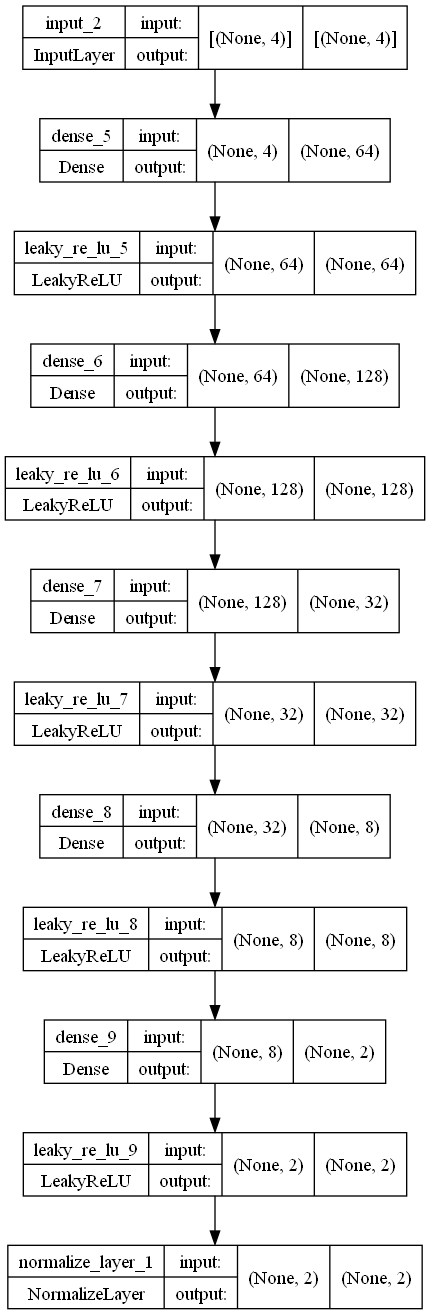

In [9]:
# Create and train the model
hiddens = [64, 128, 32, 8]
model2 = mb.create_model_feat(4, 2, hiddens)
# summarize and plot the model
model2.summary()
tf.keras.utils.plot_model(model2, show_shapes=True)

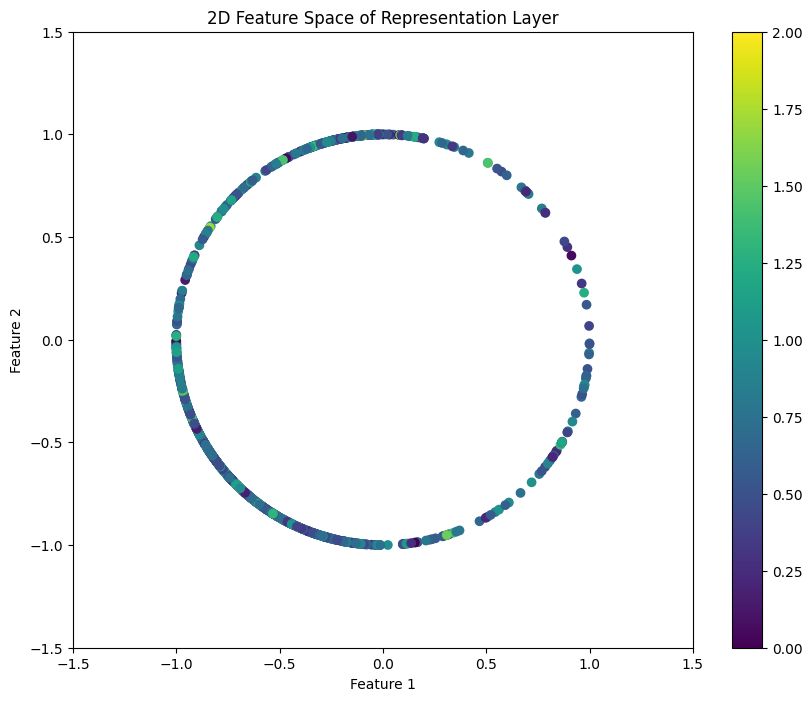

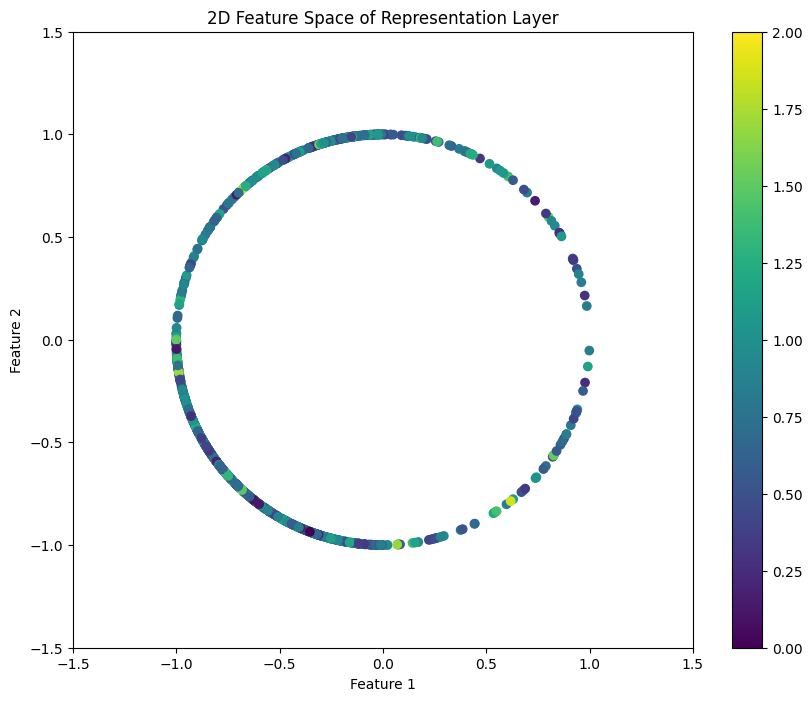

In [10]:
# Plot the 2D feature space
eva.plot_feature_space(model2, loader.X_train, loader.y_train)
eva.plot_feature_space(model2, loader.X_test, loader.y_test)

Run the command line:
 tensorboard --logdir logs/fit
Epoch 1/400
44/44 [==============================] - 33s 707ms/step - loss: 0.2947 - val_loss: 0.1447
Epoch 2/400
44/44 [==============================] - 30s 692ms/step - loss: 0.1182 - val_loss: 0.1370
Epoch 3/400
44/44 [==============================] - 29s 669ms/step - loss: 0.1120 - val_loss: 0.1358
Epoch 4/400
44/44 [==============================] - 29s 660ms/step - loss: 0.1074 - val_loss: 0.1323
Epoch 5/400
44/44 [==============================] - 29s 665ms/step - loss: 0.1078 - val_loss: 0.1326
Epoch 6/400
44/44 [==============================] - 30s 672ms/step - loss: 0.0968 - val_loss: 0.1318
Epoch 7/400
44/44 [==============================] - 30s 681ms/step - loss: 0.1094 - val_loss: 0.1321
Epoch 8/400
44/44 [==============================] - 31s 714ms/step - loss: 0.1083 - val_loss: 0.1306
Epoch 9/400
44/44 [==============================] - 31s 709ms/step - loss: 0.1014 - val_loss: 0.1332
Epoch 10/400
44/44 [=========

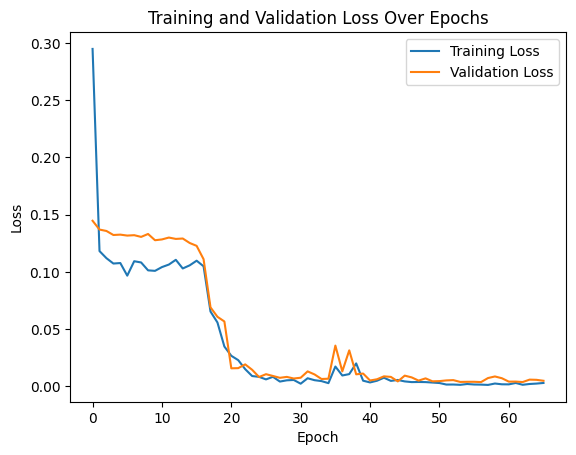

Epoch 1/57
63/63 [==============================] - 46s 714ms/step - loss: 0.0103
Epoch 2/57
63/63 [==============================] - 43s 680ms/step - loss: 0.0042
Epoch 3/57
63/63 [==============================] - 46s 723ms/step - loss: 0.0043
Epoch 4/57
63/63 [==============================] - 43s 683ms/step - loss: 0.0055
Epoch 5/57
63/63 [==============================] - 43s 689ms/step - loss: 0.0052
Epoch 6/57
63/63 [==============================] - 43s 685ms/step - loss: 0.0069
Epoch 7/57
63/63 [==============================] - 43s 684ms/step - loss: 0.0050
Epoch 8/57
63/63 [==============================] - 43s 682ms/step - loss: 0.0022
Epoch 9/57
63/63 [==============================] - 43s 685ms/step - loss: 0.0149
Epoch 10/57
63/63 [==============================] - 43s 683ms/step - loss: 0.0124
Epoch 11/57
63/63 [==============================] - 48s 762ms/step - loss: 0.0040
Epoch 12/57
63/63 [==============================] - 44s 704ms/step - loss: 0.0024
Epoch 13/57
6

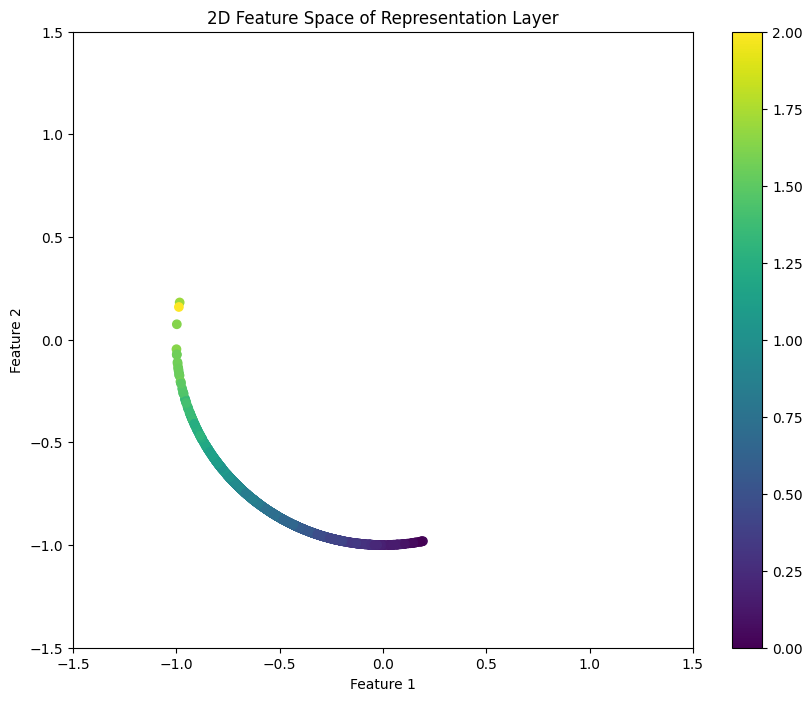

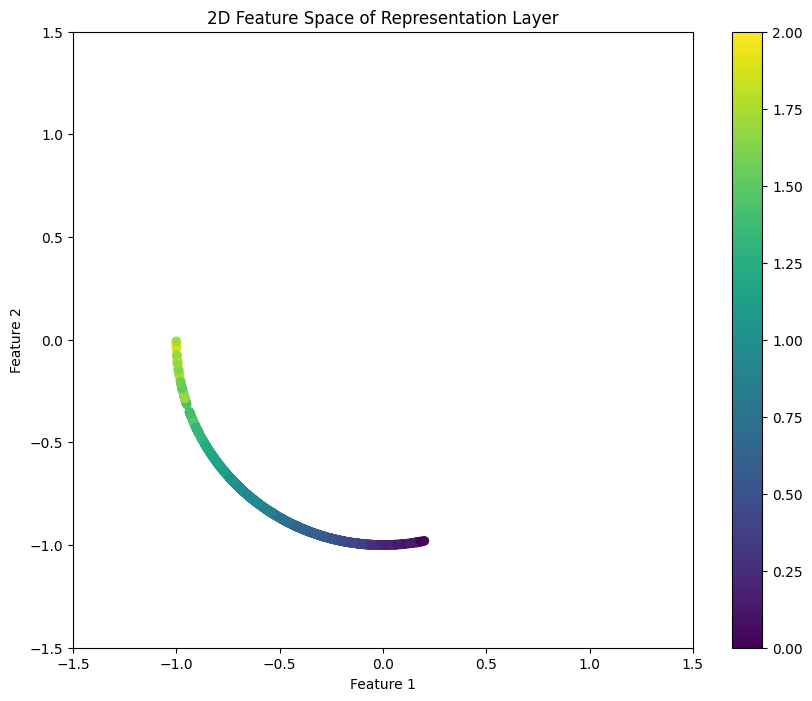

In [11]:
history = mb.train_features(model2, loader.X_train, loader.y_train, sample_joint_weights=loader.jreweights,
                            learning_rate=1e-3, epochs=400, batch_size=16)

# plot_feature_space(model, X_train, y_train)
# Plot the 2D feature space
eva.plot_feature_space(model2, loader.X_train, loader.y_train)
eva.plot_feature_space(model2, loader.X_test, loader.y_test)

In [ ]:
history = mb.train_features(model2, loader.X_train, loader.y_train, sample_joint_weights=loader.jreweights,
                            learning_rate=1e-3, epochs=400, batch_size=16)